In [197]:
library(data.table)

# Data Preparation

In [2]:
set.seed(35)

In [3]:
train=fread("CBF/CBF_TRAIN.txt")
test=fread("CBF/CBF_TEST.txt")

In [4]:
str(train)

Classes 'data.table' and 'data.frame':	30 obs. of  129 variables:
 $ V1  : num  1 1 1 3 2 2 1 3 2 1 ...
 $ V2  : num  -0.464 -0.897 -0.465 -0.187 -1.136 ...
 $ V3  : num  -0.555 -0.686 -0.568 -0.621 -1.319 ...
 $ V4  : num  -0.843 -1.351 -0.032 -0.816 -1.845 ...
 $ V5  : num  -0.866 -1.459 -0.635 -0.521 -0.789 ...
 $ V6  : num  -0.936 -1.165 -0.603 -0.79 -0.252 ...
 $ V7  : num  -0.817 -1.404 -0.267 -0.968 -1.488 ...
 $ V8  : num  -0.264 -1.822 -0.267 -1.487 -0.669 ...
 $ V9  : num  -1.258 -0.832 -0.931 -0.278 -0.34 ...
 $ V10 : num  -1.25 -1.016 -0.449 -0.835 -1.046 ...
 $ V11 : num  -0.9183 -0.8035 -0.7213 0.0506 -0.3122 ...
 $ V12 : num  -0.922 -1.26 -0.397 -0.811 -1.031 ...
 $ V13 : num  -0.984 -1.139 -0.962 -1.226 -1.201 ...
 $ V14 : num  -1.288 -0.879 -1.421 -0.668 -0.65 ...
 $ V15 : num  -1.143 -1.549 -0.783 -0.777 -1.62 ...
 $ V16 : num  -1.0489 -0.9242 -0.4624 0.0641 -0.4128 ...
 $ V17 : num  -0.365 -1.395 -1.176 -1.254 -1.051 ...
 $ V18 : num  -0.691 0.777 -0.502 -0.789 -1.17

# Genlasso

In [198]:
library("genlasso", quietly = TRUE)

In [6]:
value_obtainer=function(dataset, index){
    return (as.numeric(dataset[index,2:129]))
}

# Task 1

## Fused Lasso Function

In [7]:
fused_results=vector("list", 30)

In [8]:
fused_lasso=function(dataset, index, control=0){
    result = trendfilter(value_obtainer(train, index), ord=0) 
    cv = cv.trendfilter(result)   
    plot(cv)
    print(paste0(index,". Timeseries") )
    print(paste0("Lambda Value of ",index,". dataset for min value: ", cv$lambda.min))
    print(paste0("Lambda Value of ",index,". dataset for 1se value: ", cv$lambda.1se))
    sqrt(seq(1:500000)**2)
    
    plot(result, lambda=cv$lambda.min, main=paste0("Plot of ", index,". Timeseries with lambda min parameter"))  

    if(control==1){
        sqrt(seq(1:500000)**2)
        return(result)
    } 
    return(list(result, cv))
}

## Example Result

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
[1] "1. Timeseries"
[1] "Lambda Value of 1. dataset for min value: 0.5087665975"
[1] "Lambda Value of 1. dataset for 1se value: 2.74044973866672"


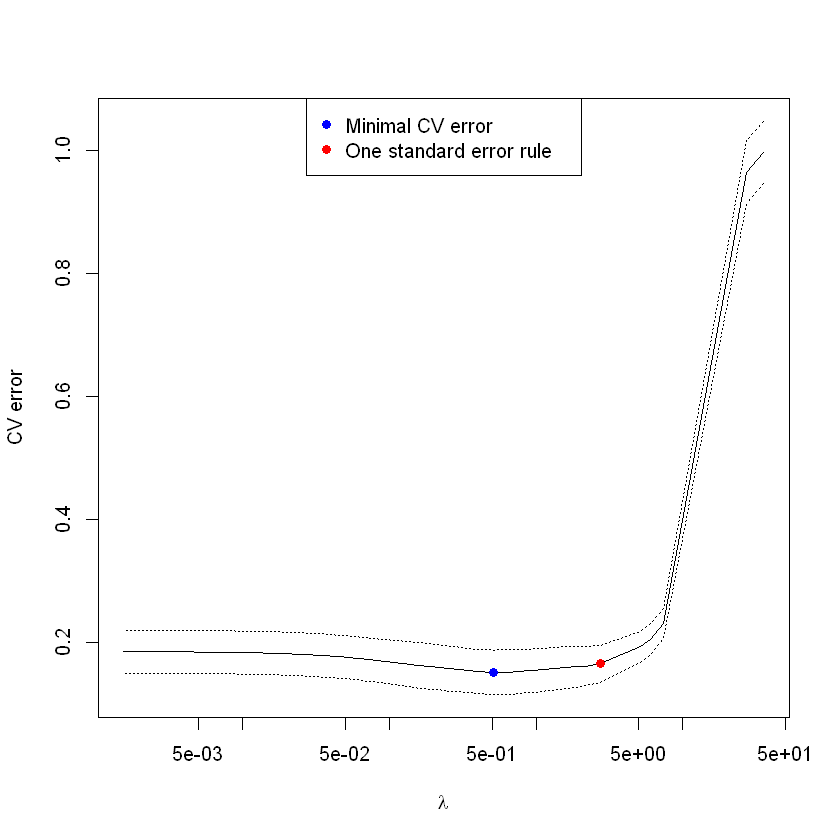

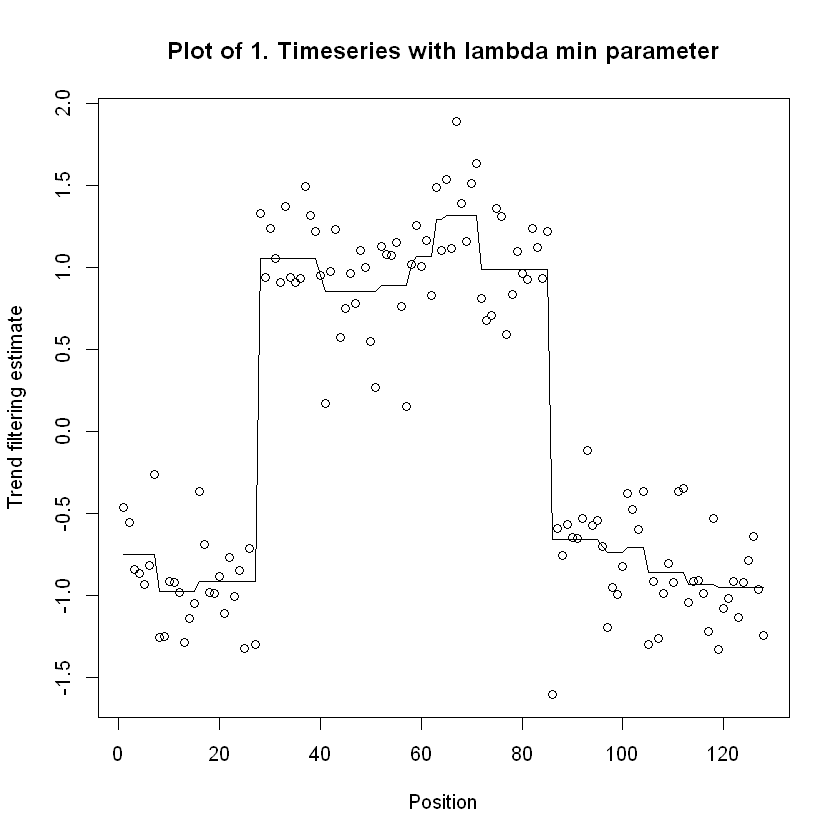

In [9]:
fused_results[[1]]=fused_lasso(train, 1, 0)

### Açıklamalar

## Results of Task 1 for All Time Series

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
[1] "1. Timeseries"
[1] "Lambda Value of 1. dataset for min value: 0.5087665975"
[1] "Lambda Value of 1. dataset for 1se value: 2.74044973866672"


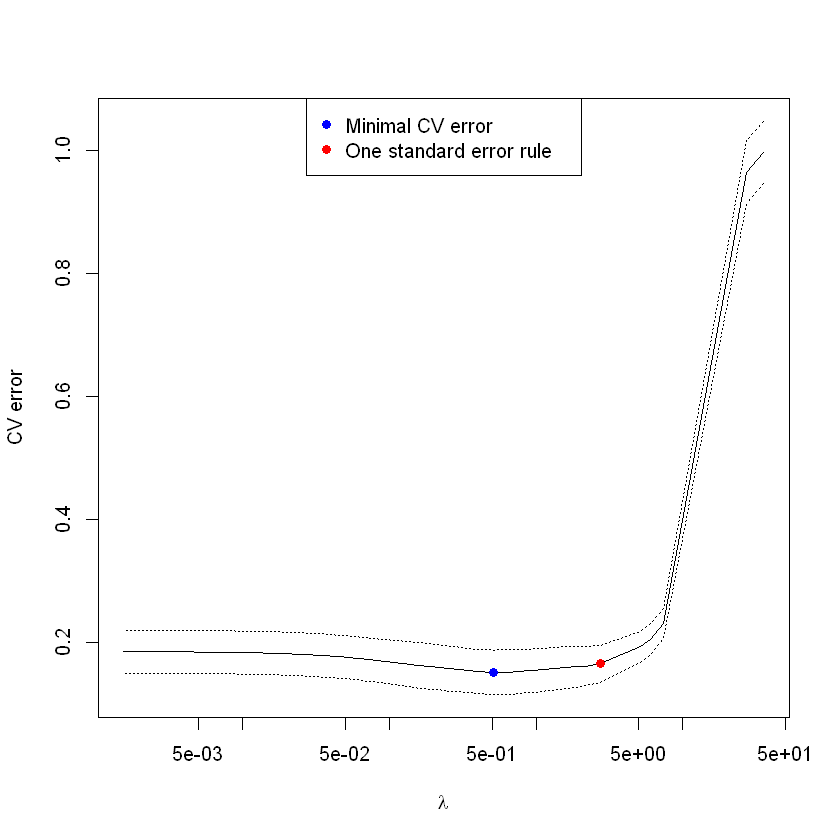

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


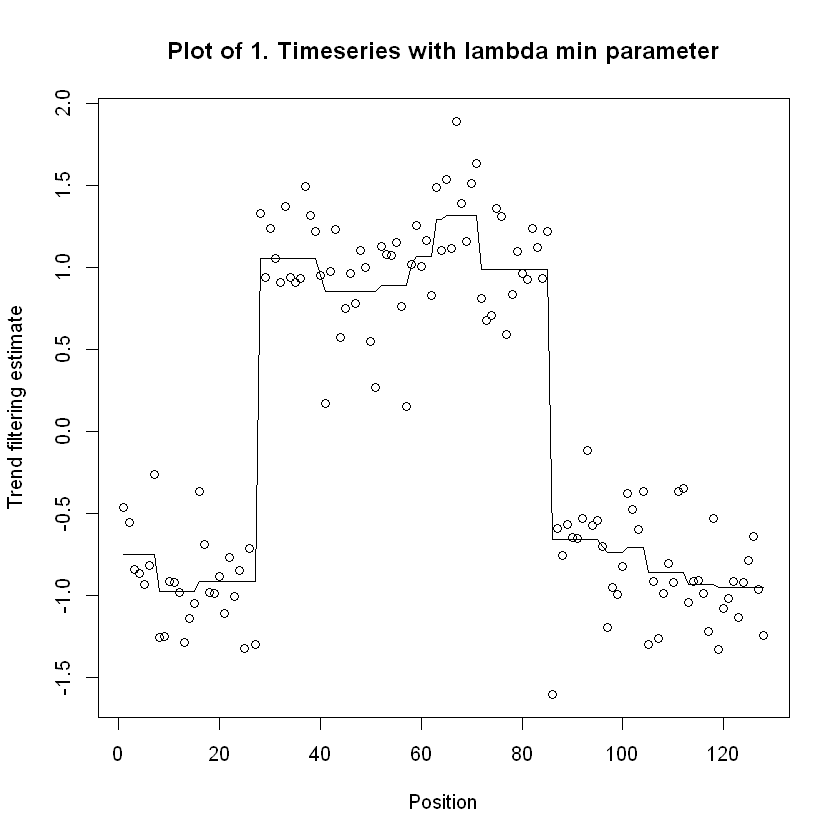

[1] "2. Timeseries"
[1] "Lambda Value of 2. dataset for min value: 1.54482427000001"
[1] "Lambda Value of 2. dataset for 1se value: 3.68318913770684"


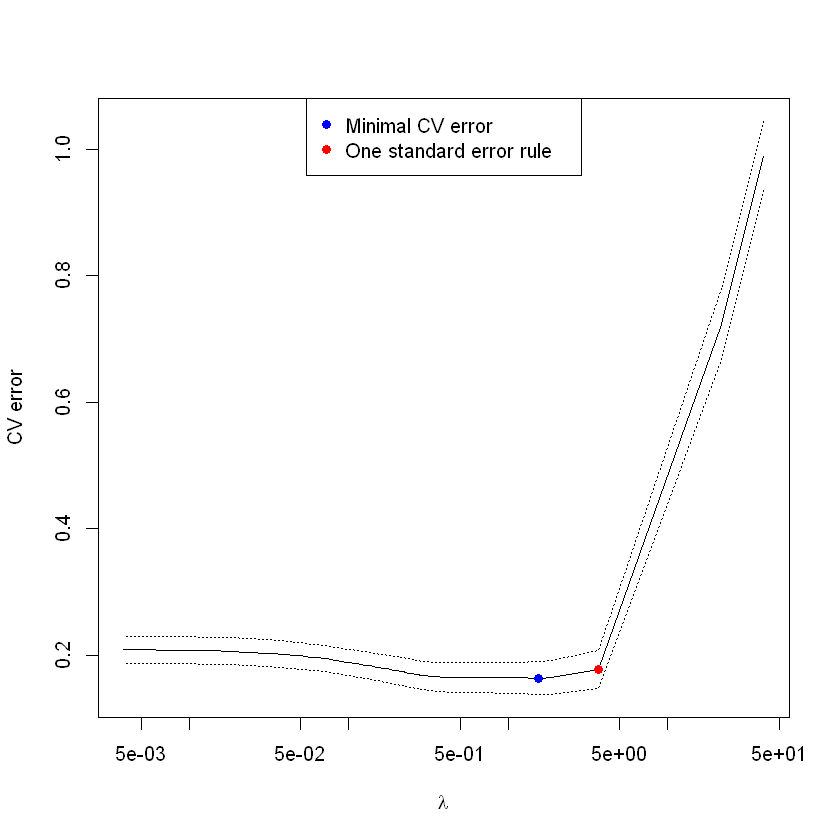

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


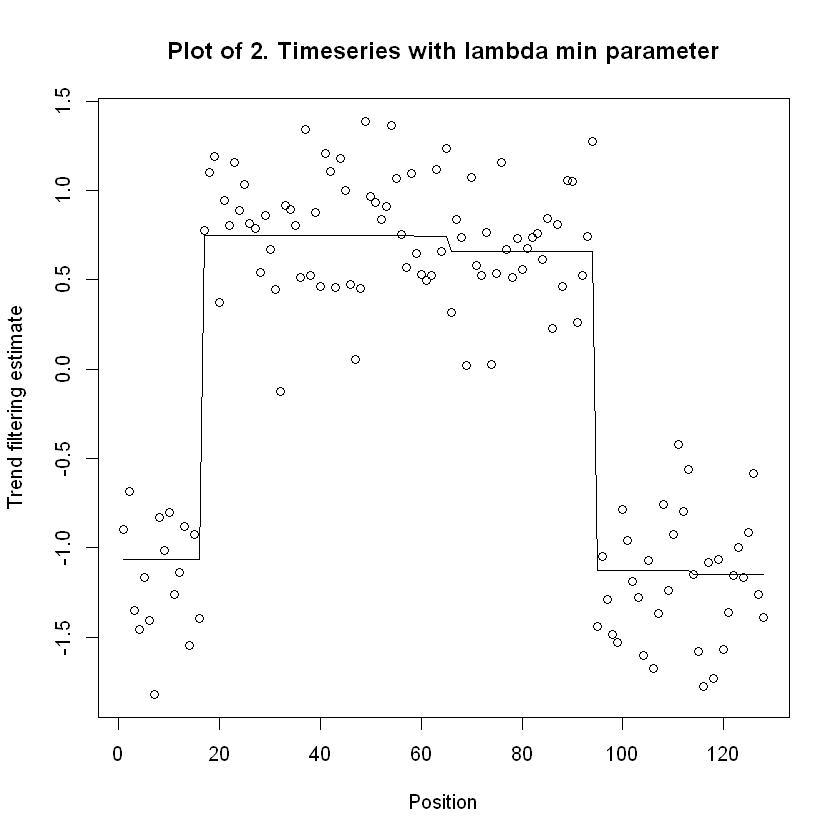

[1] "3. Timeseries"
[1] "Lambda Value of 3. dataset for min value: 0.673140352142856"
[1] "Lambda Value of 3. dataset for 1se value: 1.76711718240919"


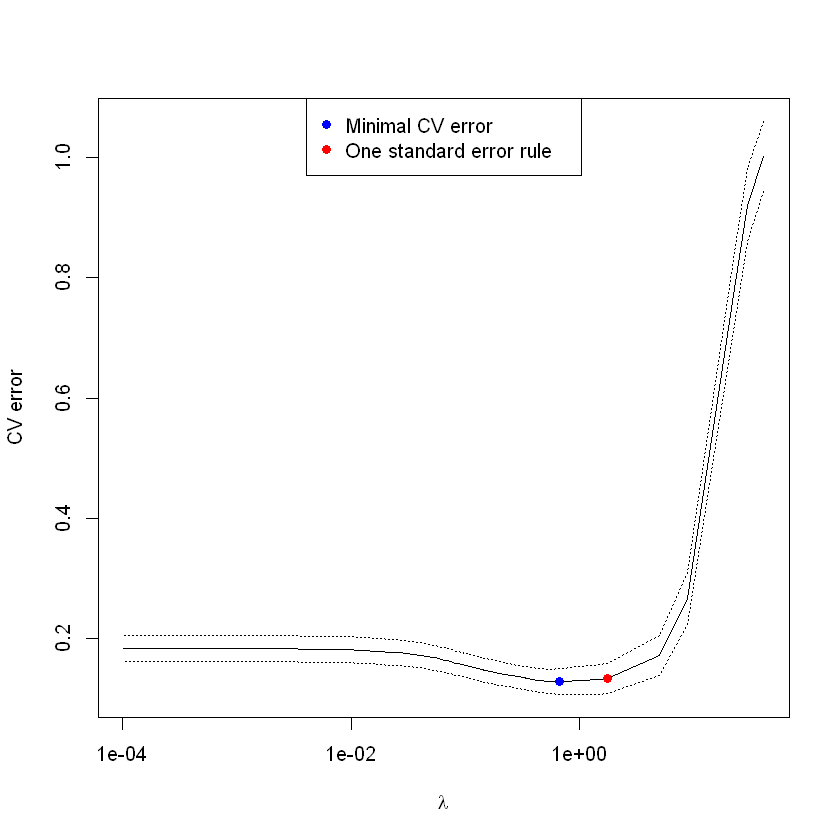

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


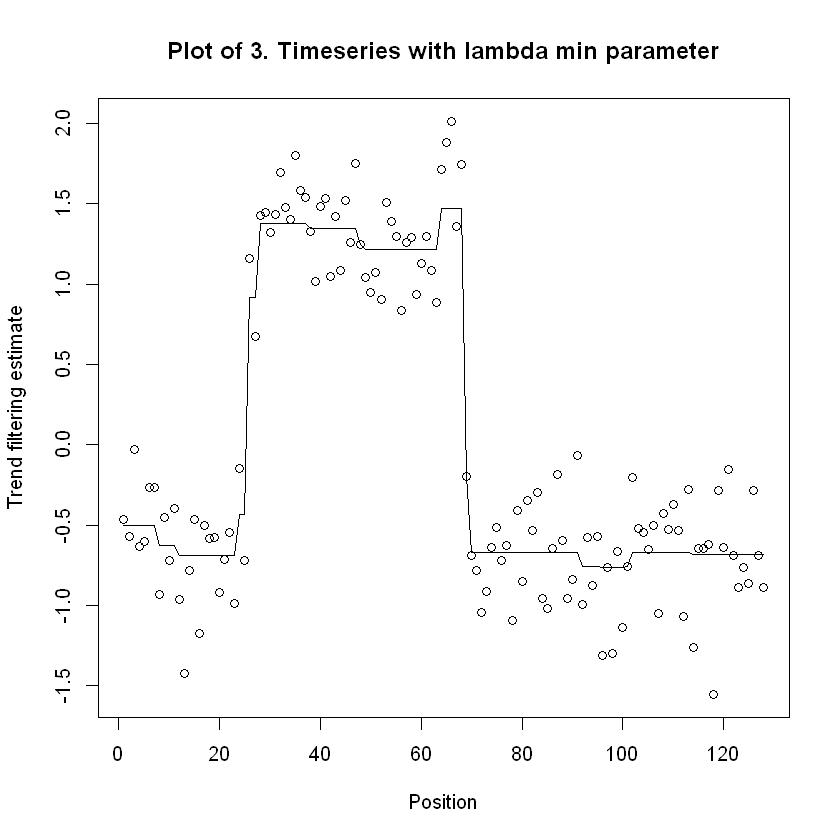

[1] "4. Timeseries"
[1] "Lambda Value of 4. dataset for min value: 1.21465872541667"
[1] "Lambda Value of 4. dataset for 1se value: 2.79903382499999"


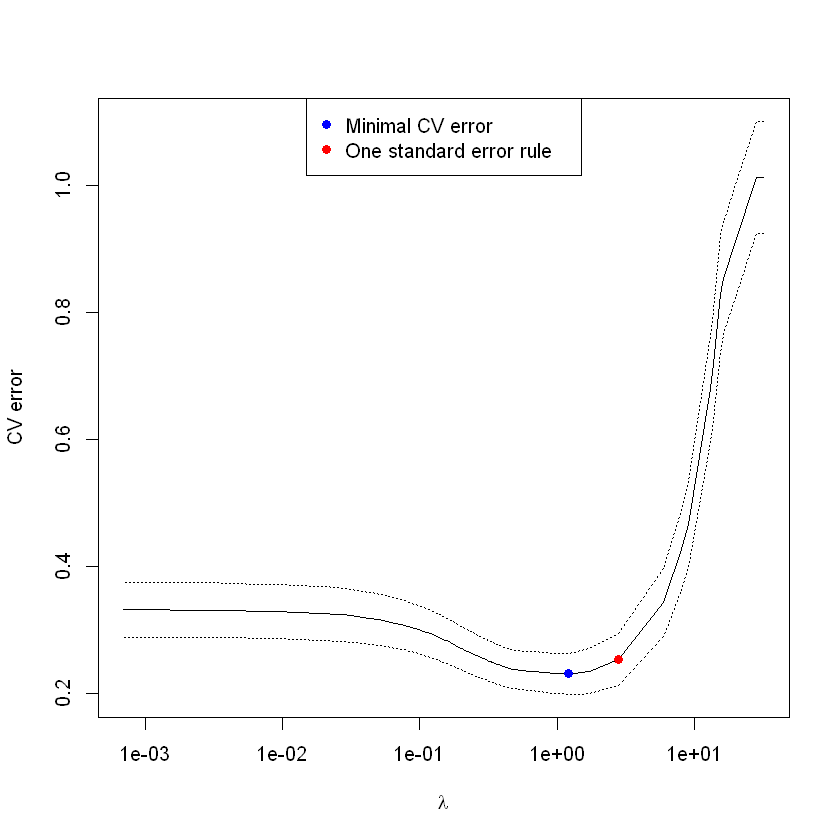

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


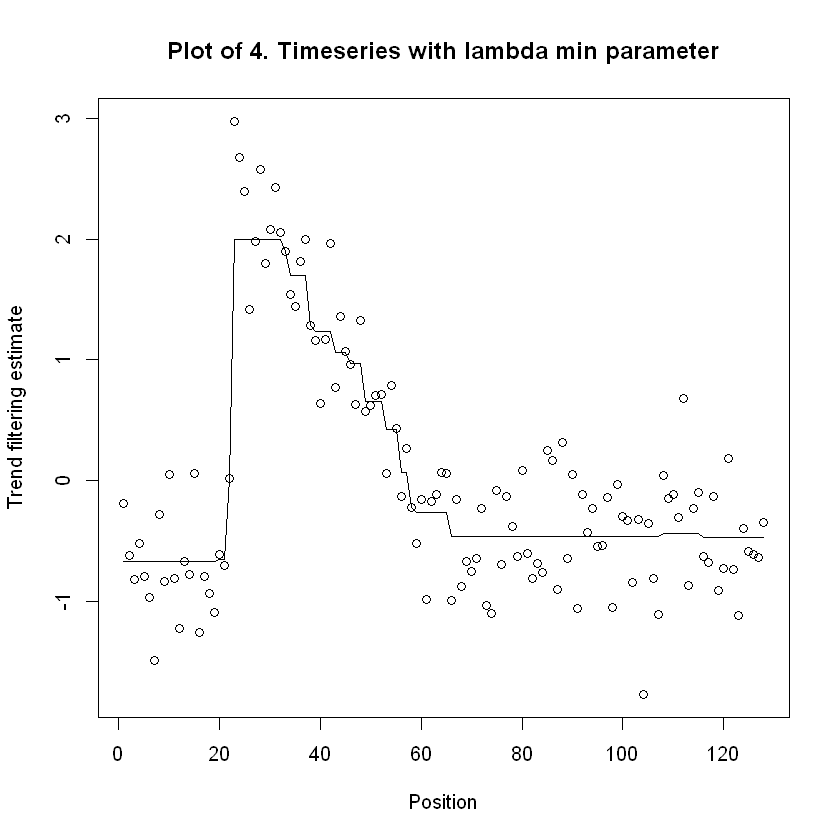

[1] "5. Timeseries"
[1] "Lambda Value of 5. dataset for min value: 1.02161963043478"
[1] "Lambda Value of 5. dataset for 1se value: 3.32583449999999"


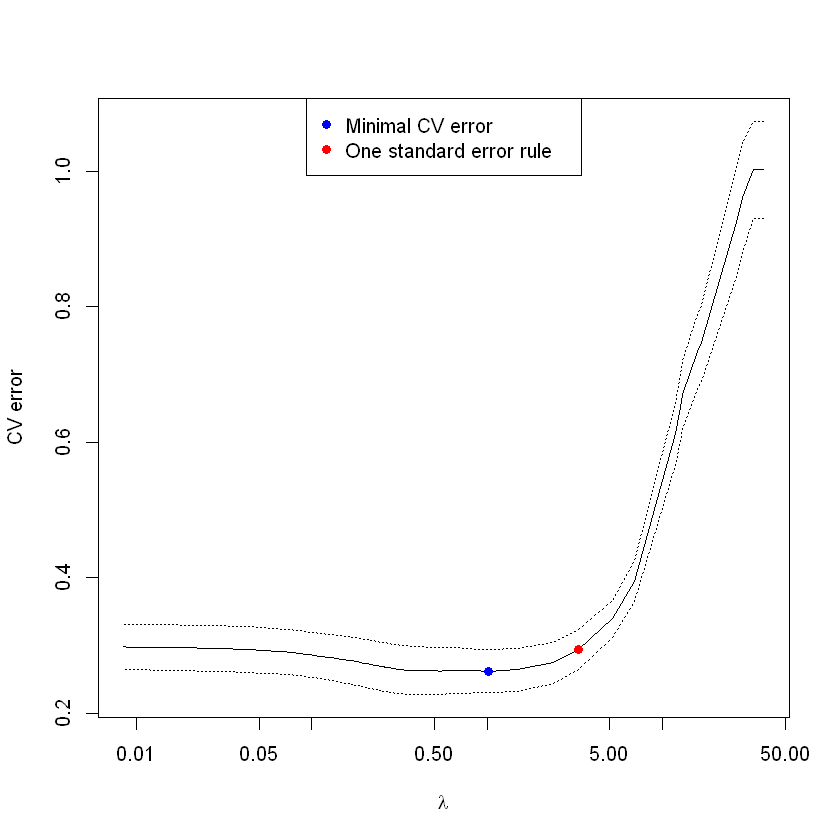

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


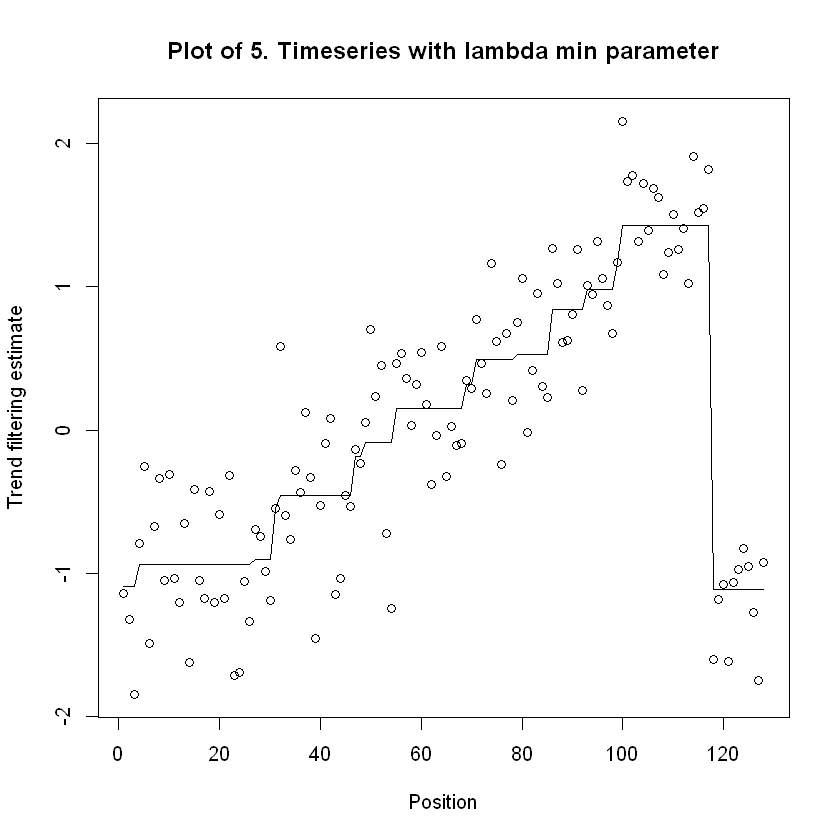

[1] "6. Timeseries"
[1] "Lambda Value of 6. dataset for min value: 1.35417875325"
[1] "Lambda Value of 6. dataset for 1se value: 2.87431018214808"


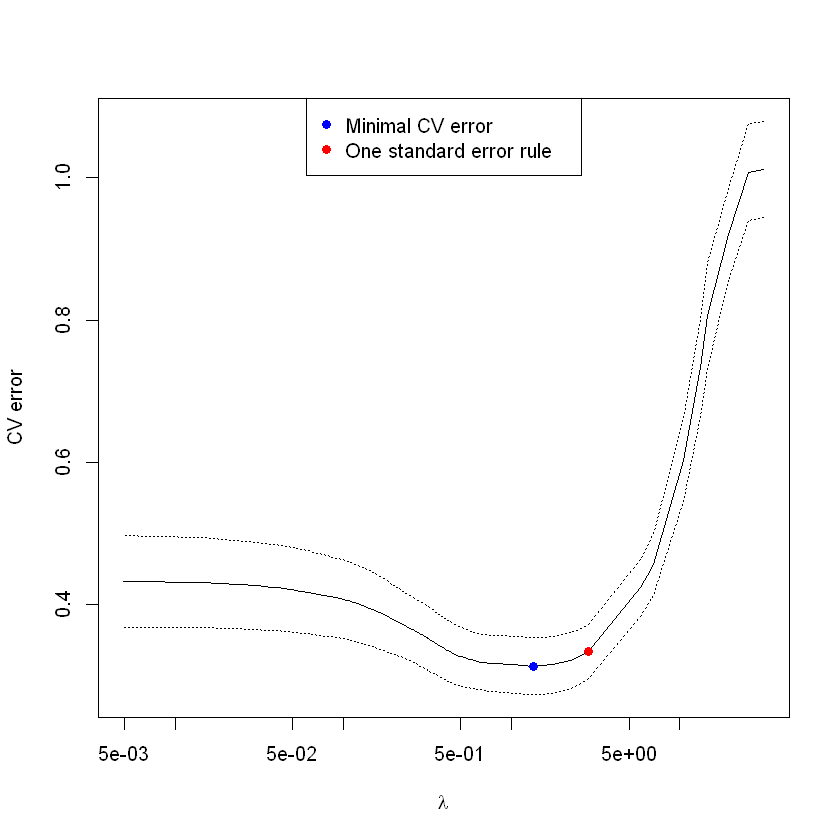

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


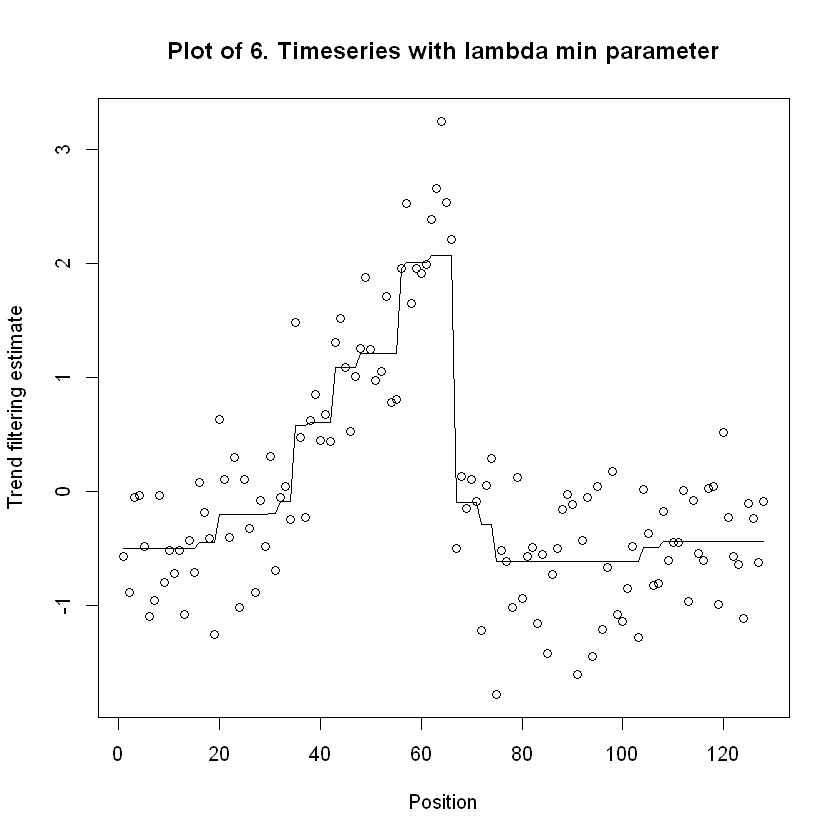

[1] "7. Timeseries"
[1] "Lambda Value of 7. dataset for min value: 1.22983253178571"
[1] "Lambda Value of 7. dataset for 1se value: 2.70999707599999"


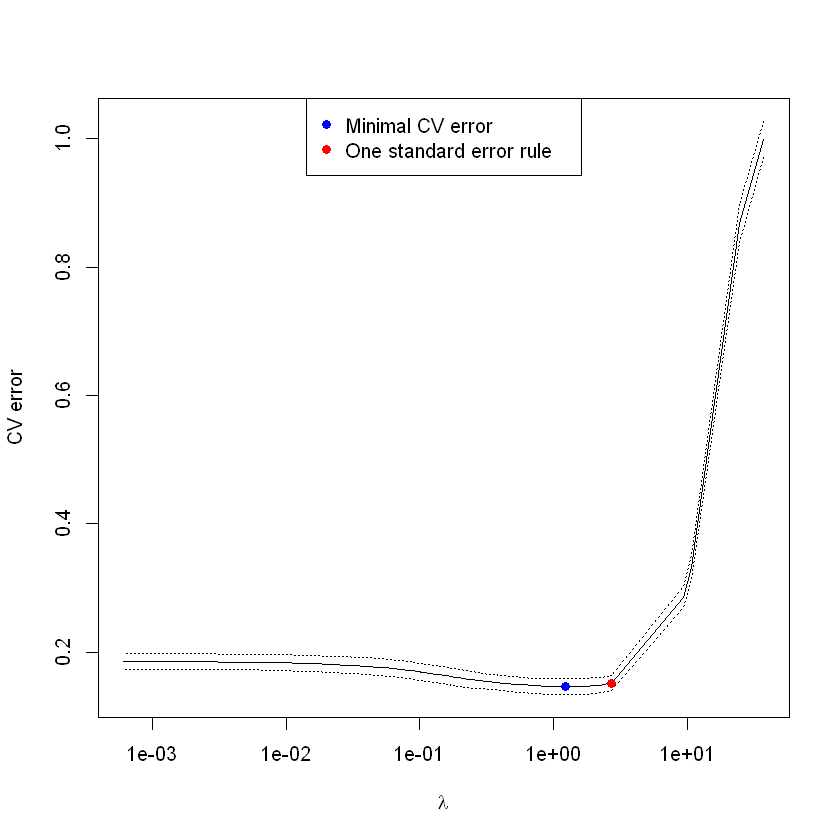

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


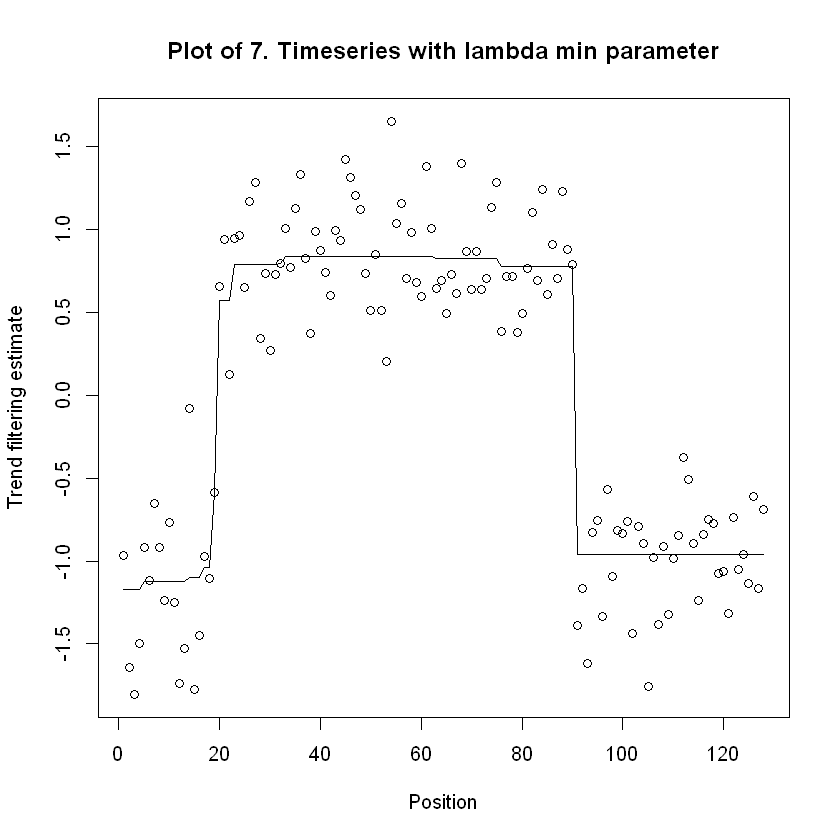

[1] "8. Timeseries"
[1] "Lambda Value of 8. dataset for min value: 1.12426292142857"
[1] "Lambda Value of 8. dataset for 1se value: 2.58996471857142"


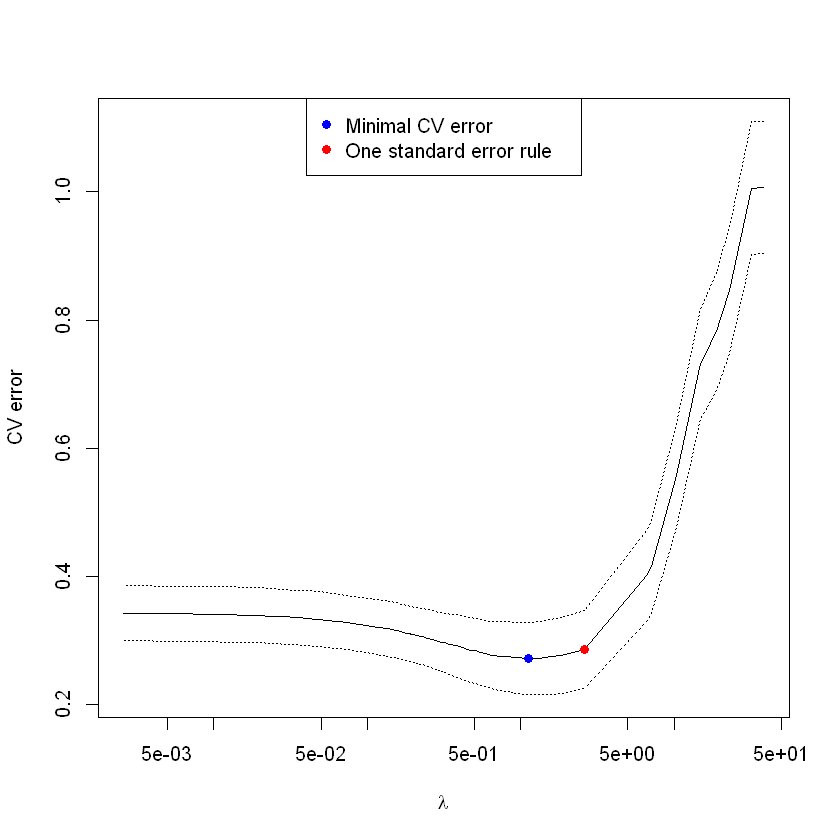

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


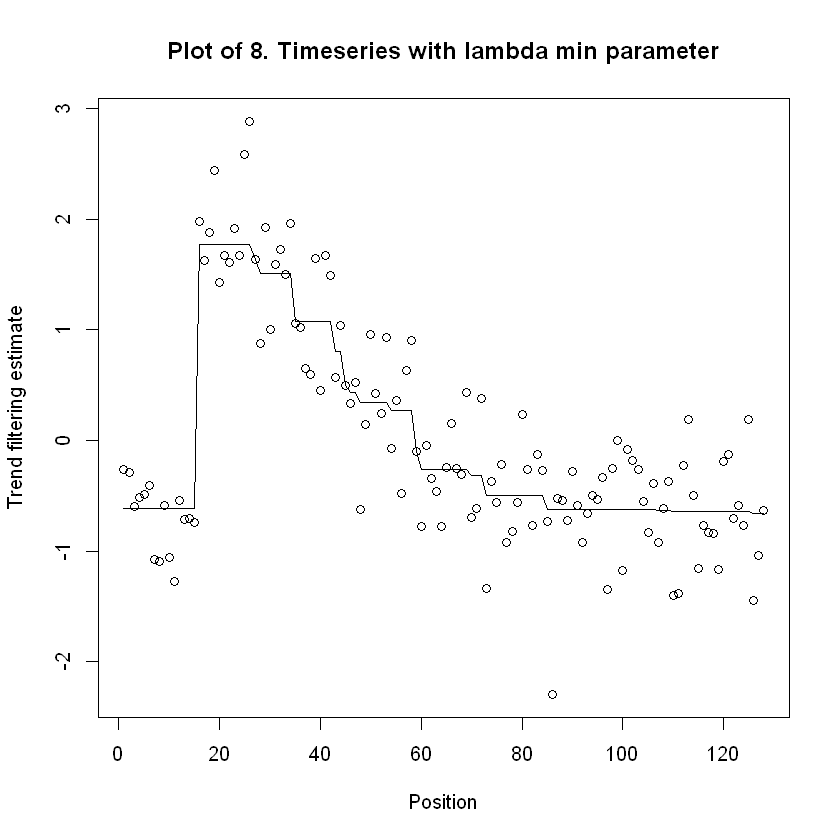

[1] "9. Timeseries"
[1] "Lambda Value of 9. dataset for min value: 1.01200804"
[1] "Lambda Value of 9. dataset for 1se value: 2.11069420000001"


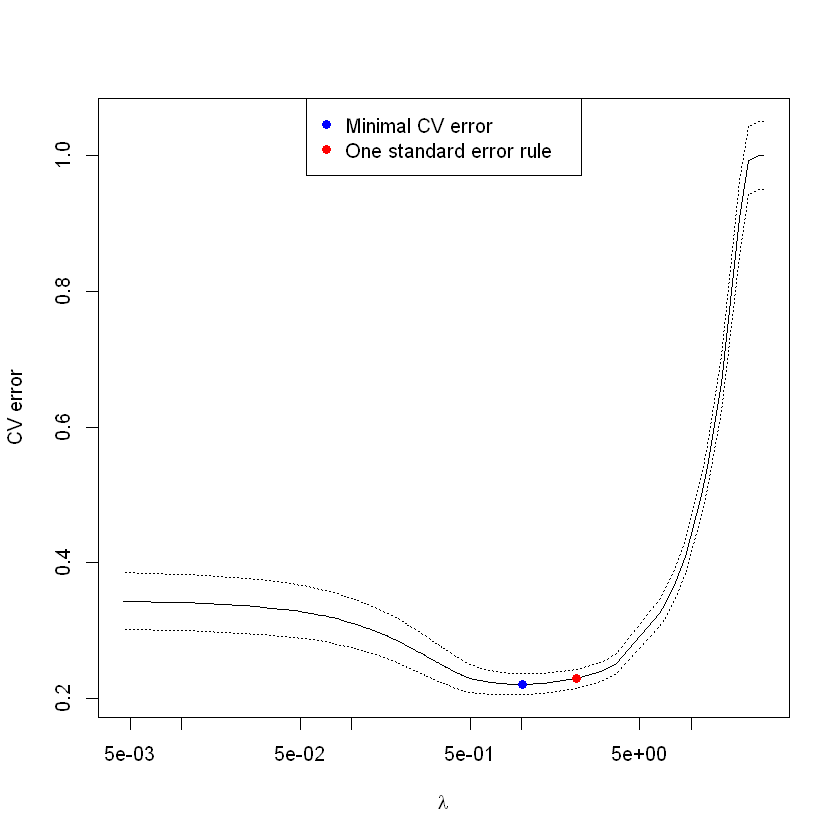

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


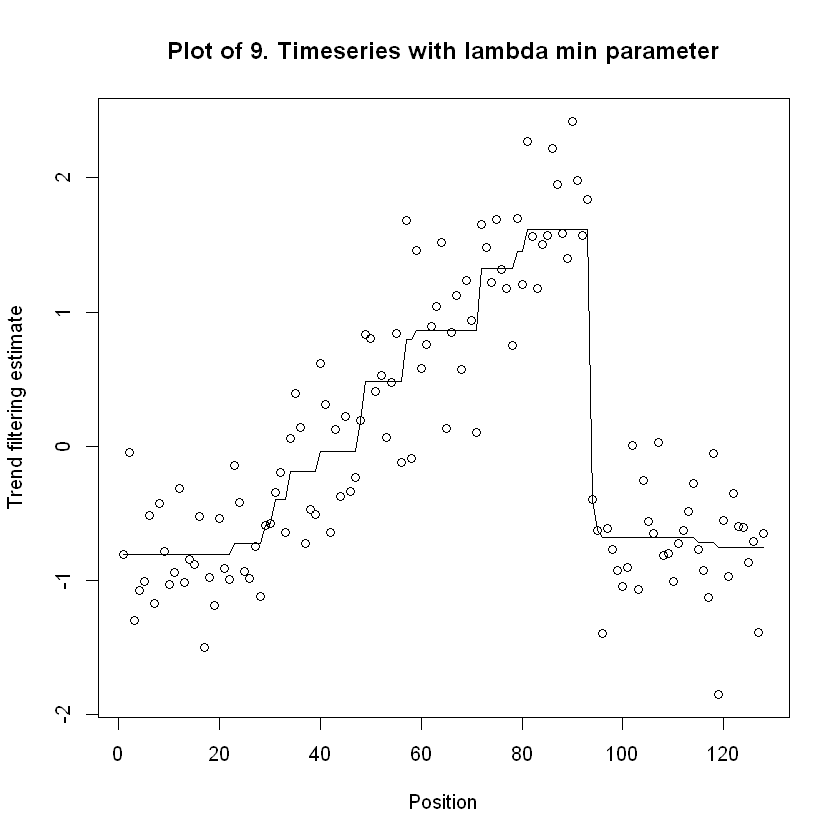

[1] "10. Timeseries"
[1] "Lambda Value of 10. dataset for min value: 0.155083875"
[1] "Lambda Value of 10. dataset for 1se value: 2.26862352833336"


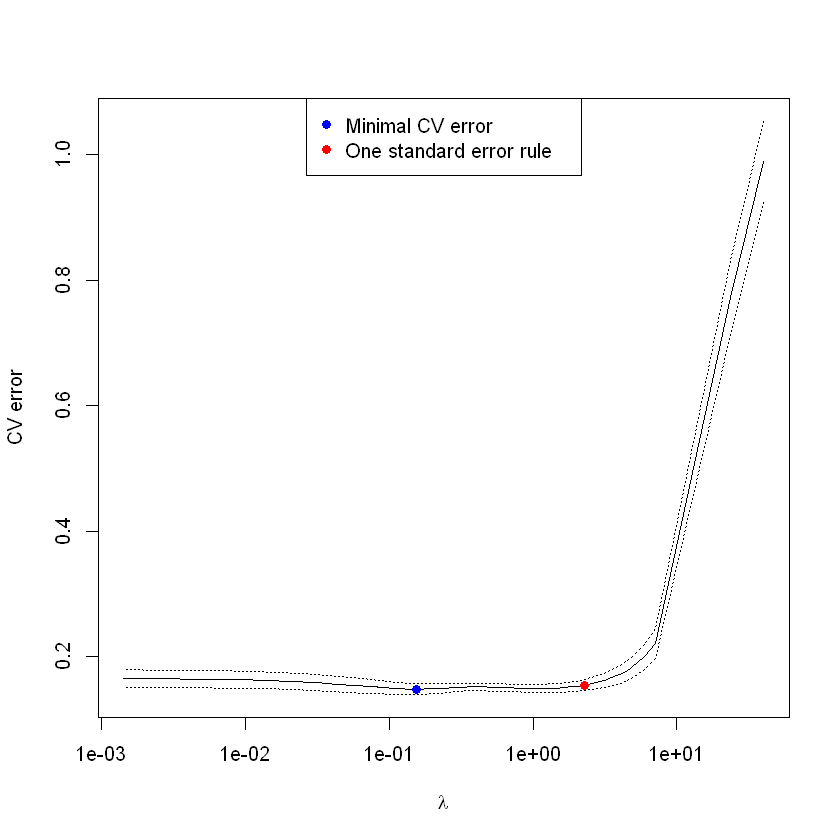

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


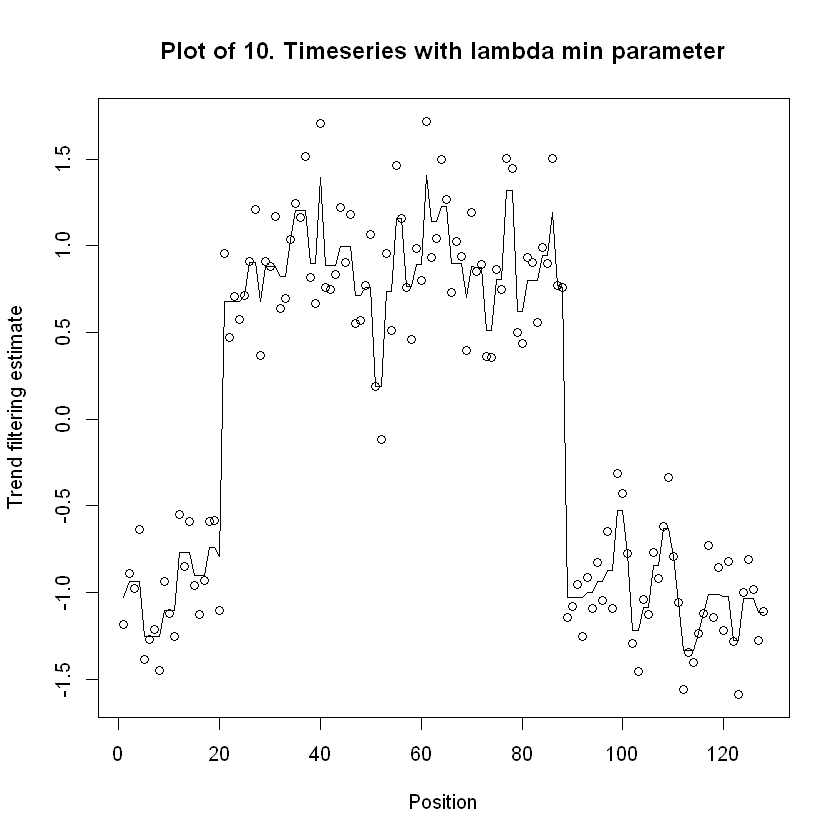

[1] "11. Timeseries"
[1] "Lambda Value of 11. dataset for min value: 0.987385322857142"
[1] "Lambda Value of 11. dataset for 1se value: 4.25619744999999"


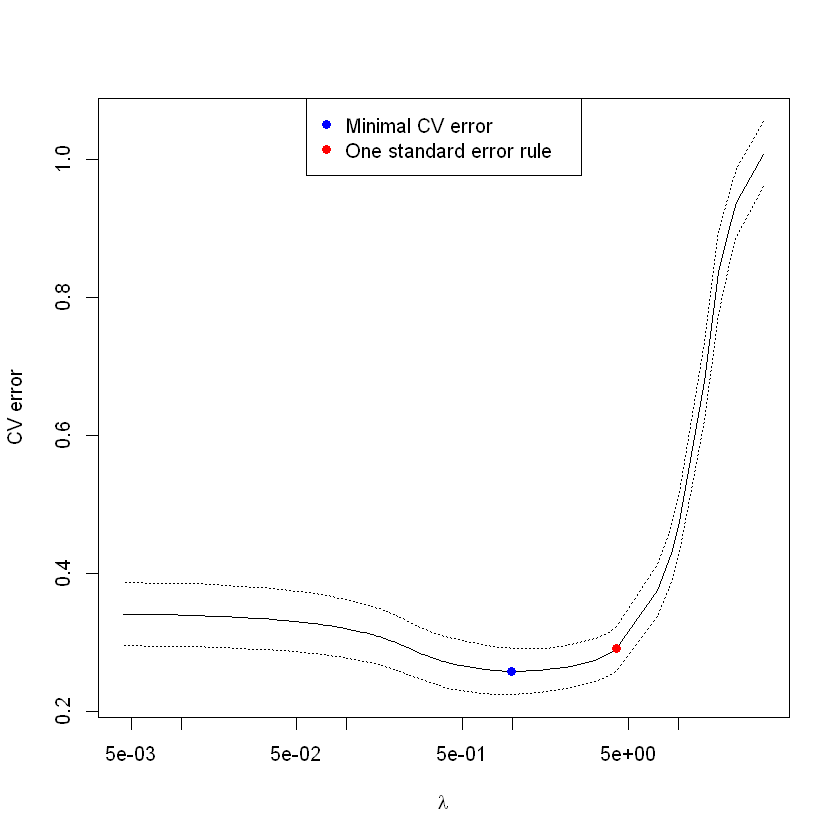

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


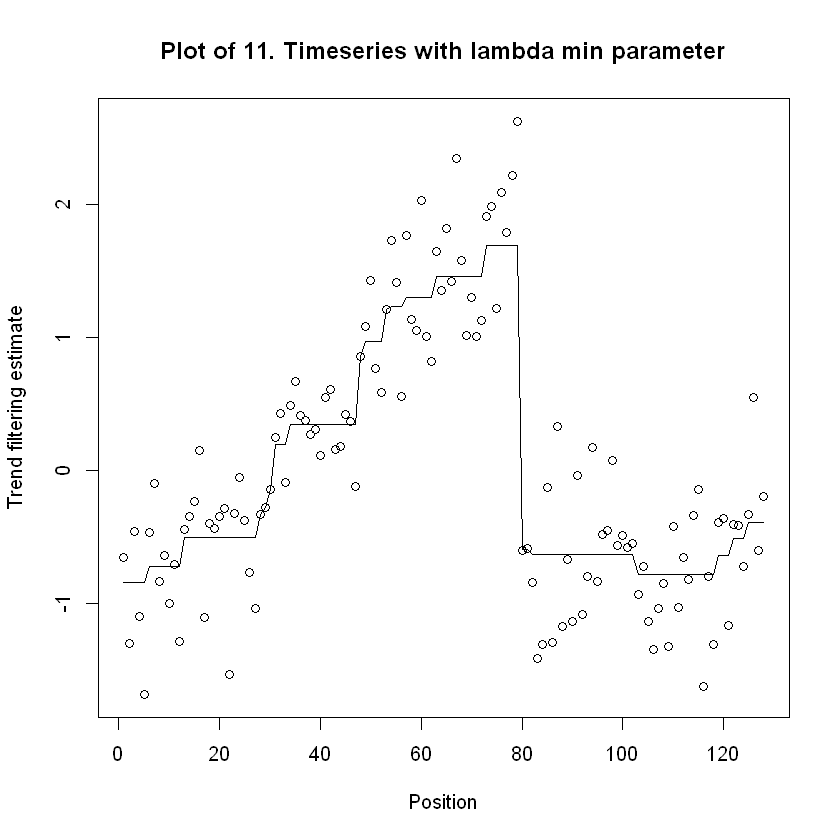

[1] "12. Timeseries"
[1] "Lambda Value of 12. dataset for min value: 0.836120653823529"
[1] "Lambda Value of 12. dataset for 1se value: 3.17205142211764"


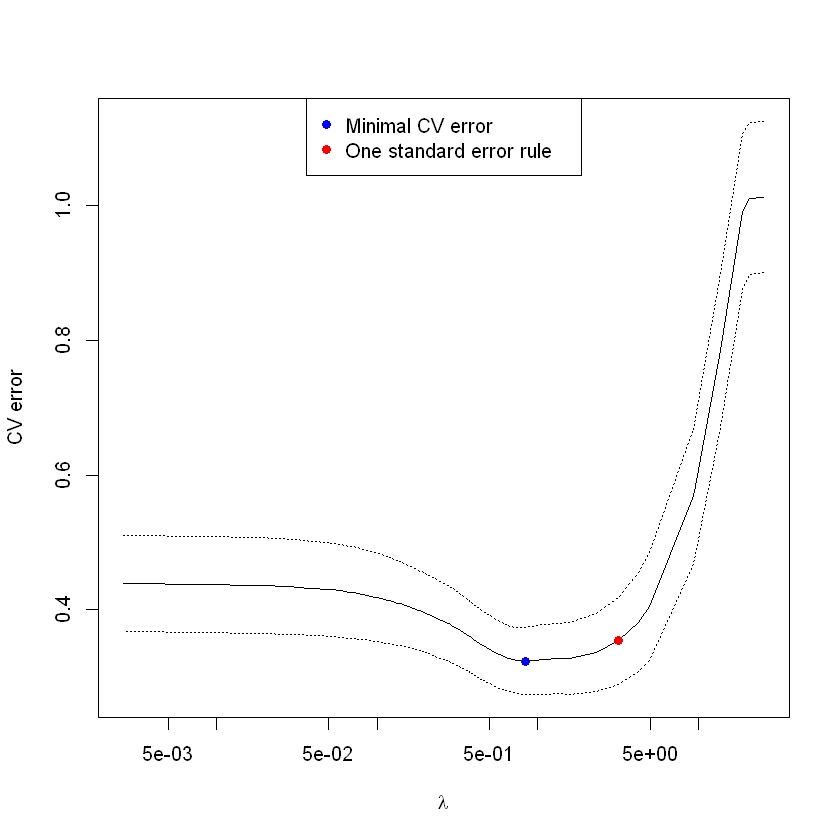

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


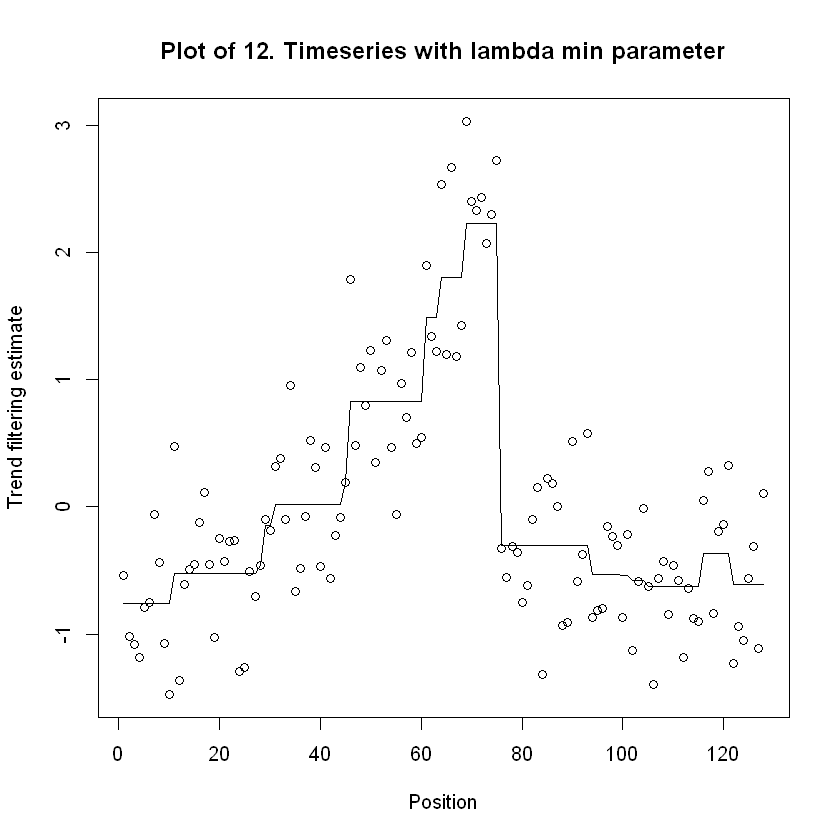

[1] "13. Timeseries"
[1] "Lambda Value of 13. dataset for min value: 1.2025240679"
[1] "Lambda Value of 13. dataset for 1se value: 1.28094162973215"


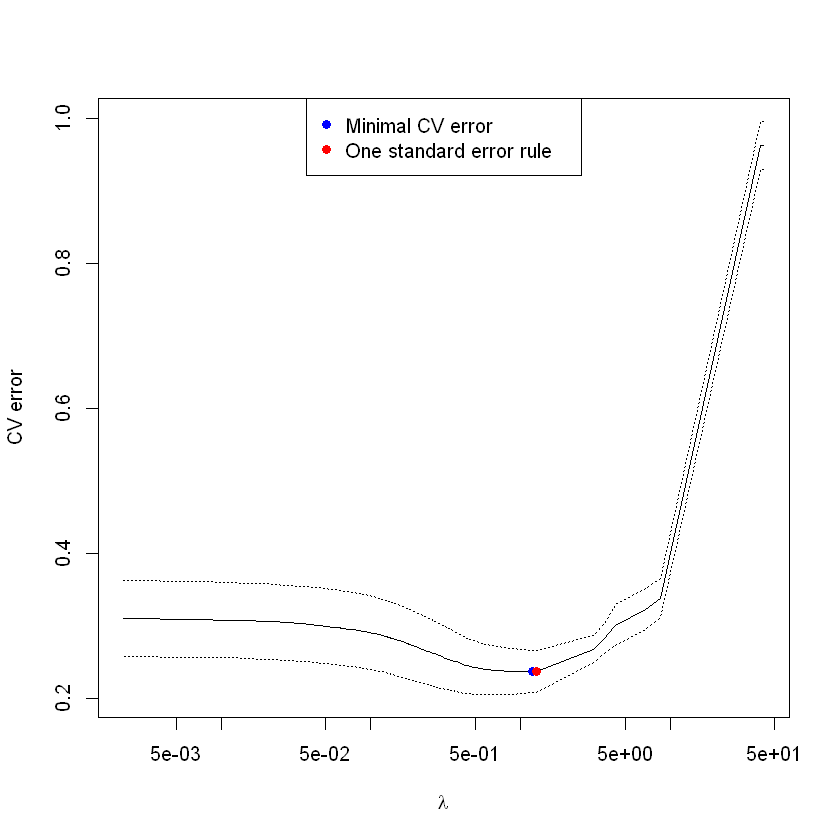

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


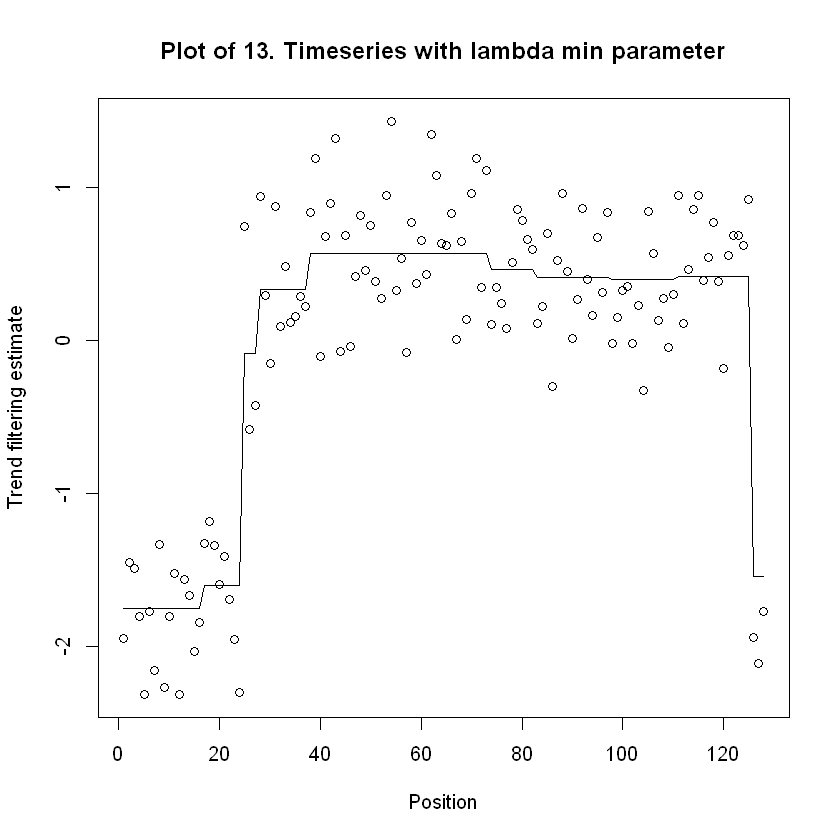

[1] "14. Timeseries"
[1] "Lambda Value of 14. dataset for min value: 0.947380811999998"
[1] "Lambda Value of 14. dataset for 1se value: 3.31463047399993"


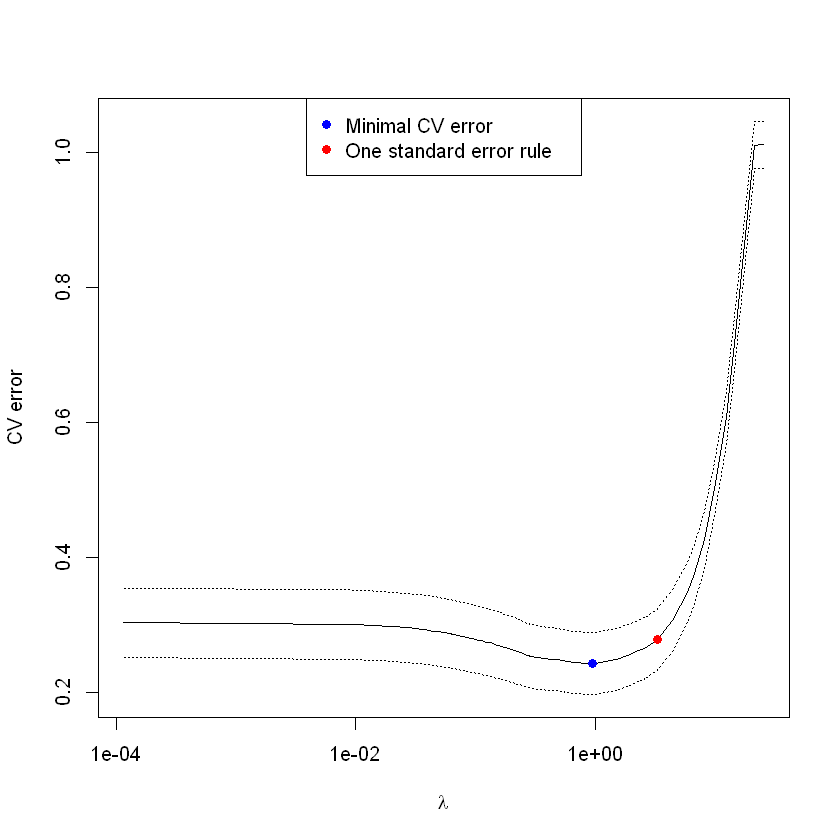

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


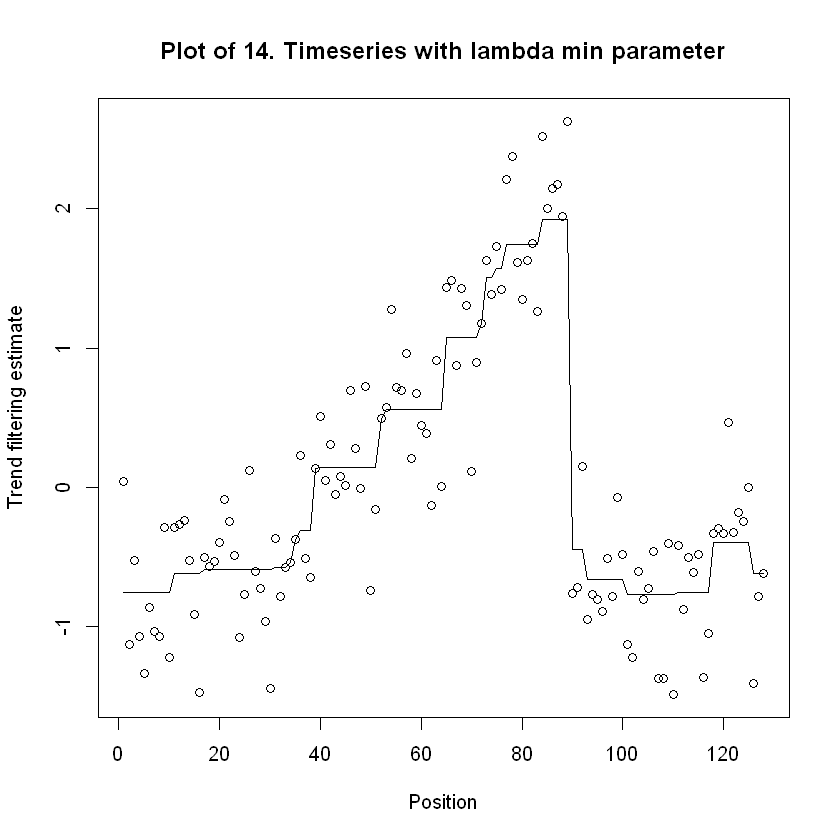

[1] "15. Timeseries"
[1] "Lambda Value of 15. dataset for min value: 1.04626645"
[1] "Lambda Value of 15. dataset for 1se value: 3.542481695"


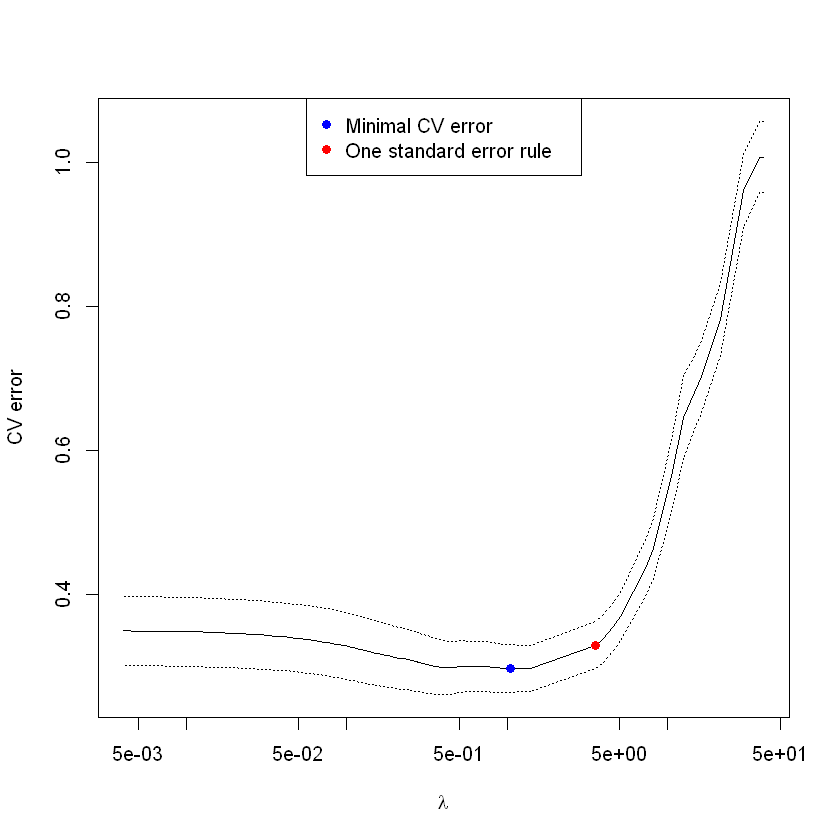

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


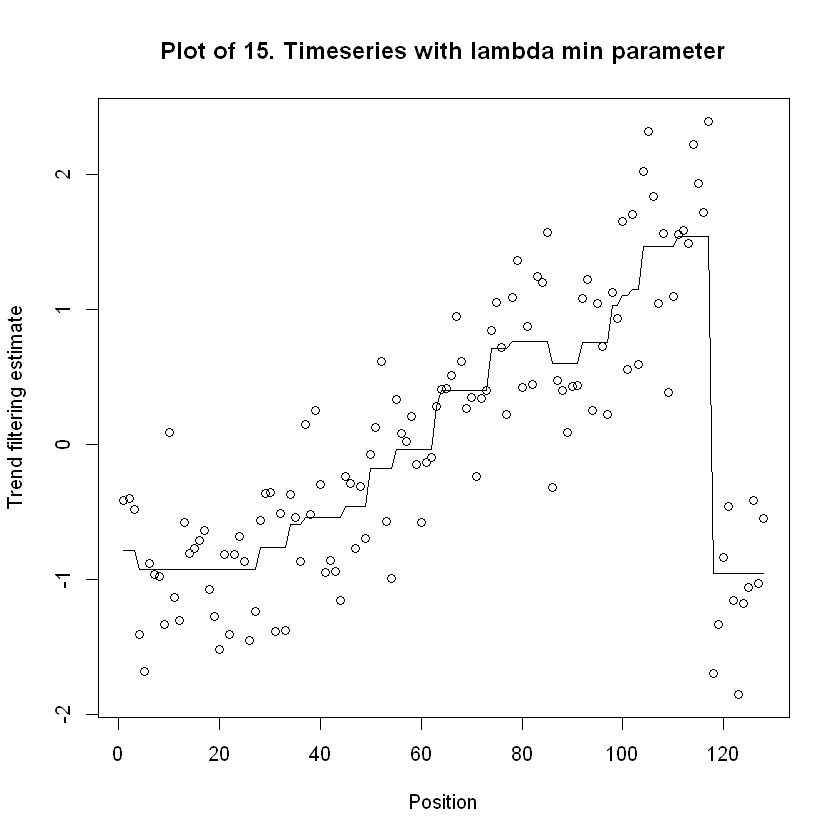

[1] "16. Timeseries"
[1] "Lambda Value of 16. dataset for min value: 0.976470802857144"
[1] "Lambda Value of 16. dataset for 1se value: 3.85010511666666"


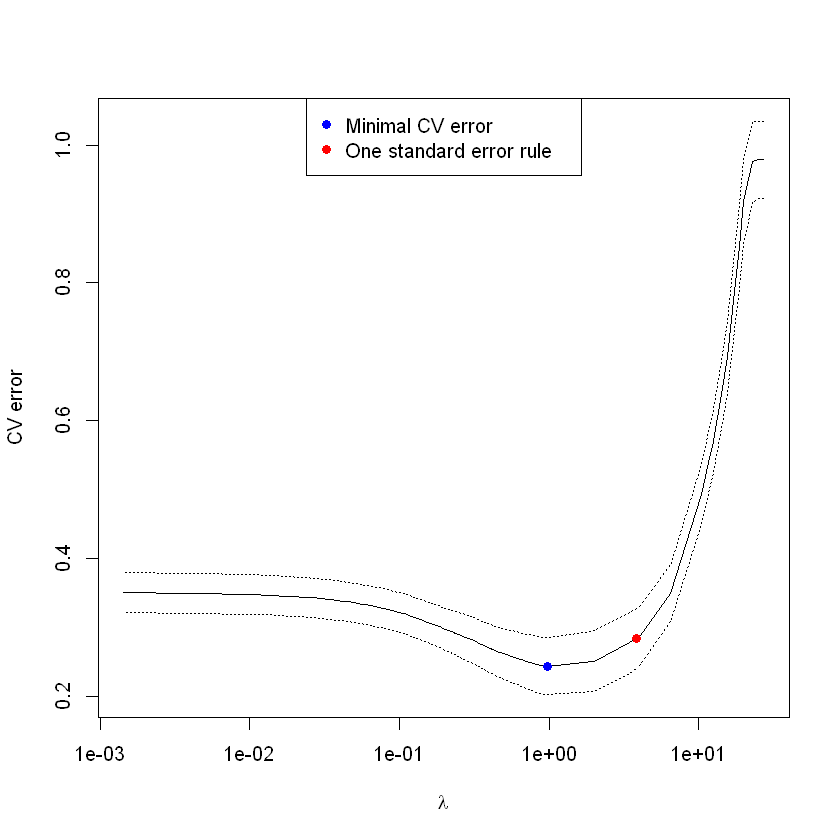

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


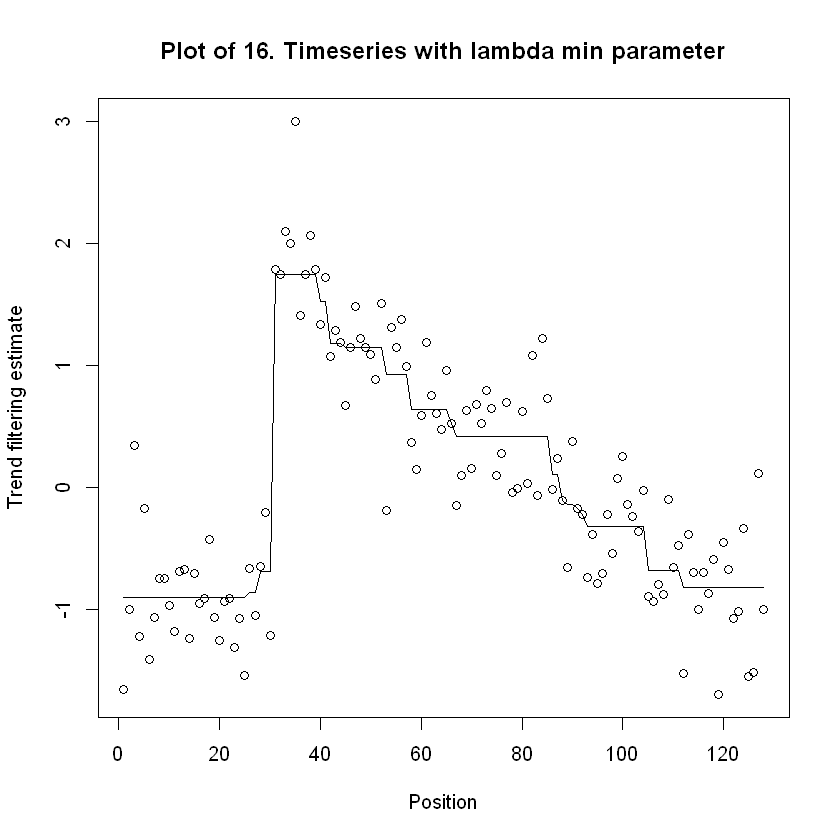

[1] "17. Timeseries"
[1] "Lambda Value of 17. dataset for min value: 0.599057512"
[1] "Lambda Value of 17. dataset for 1se value: 1.72319757369231"


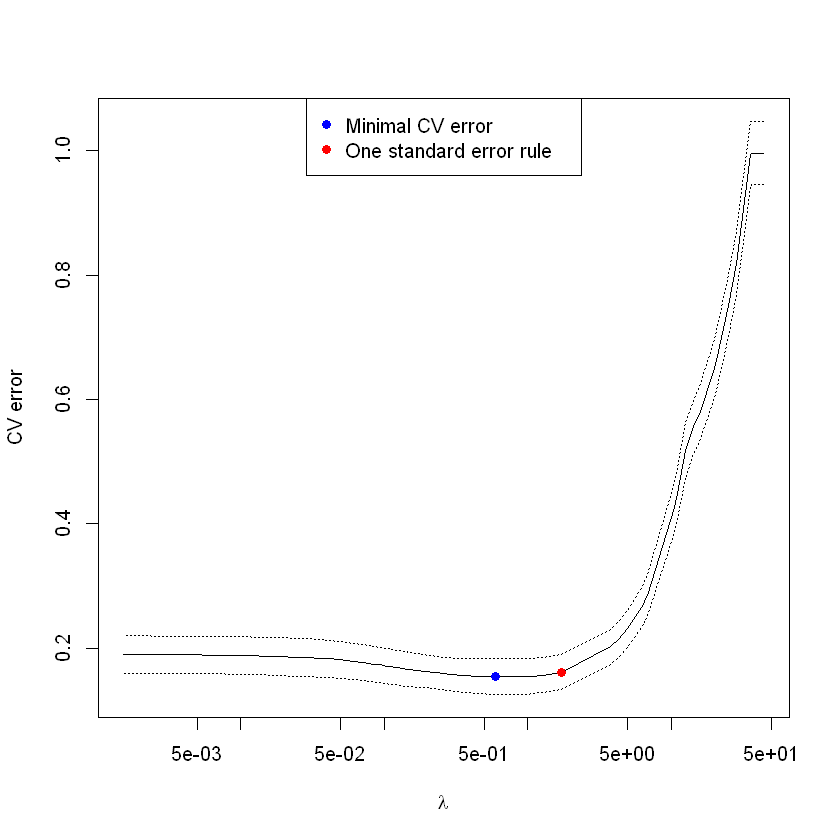

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


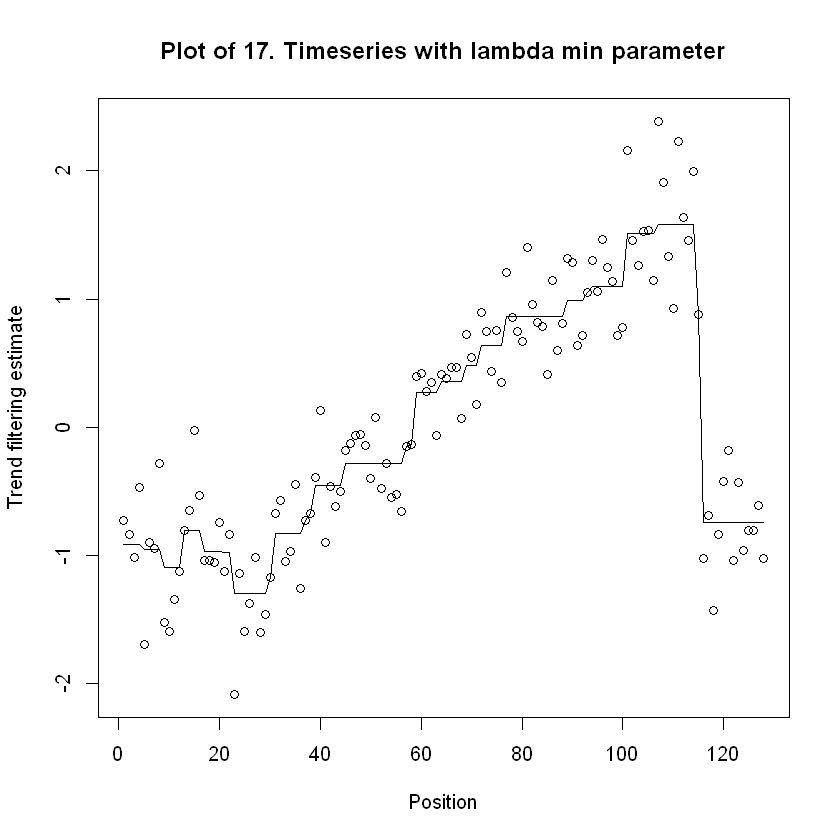

[1] "18. Timeseries"
[1] "Lambda Value of 18. dataset for min value: 1.019046925"
[1] "Lambda Value of 18. dataset for 1se value: 3.54746912999999"


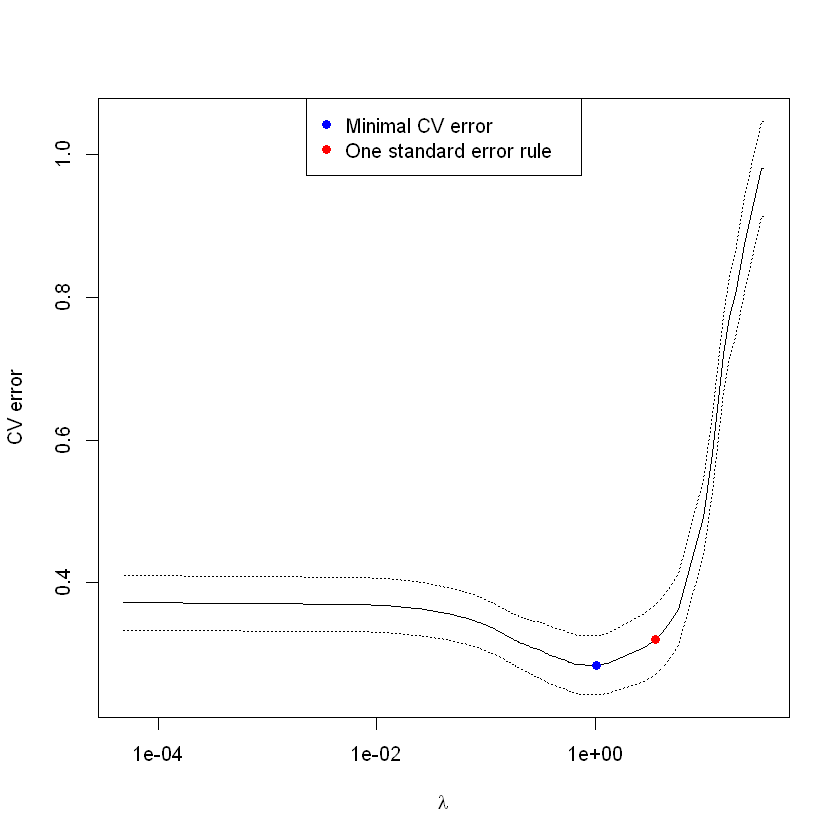

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


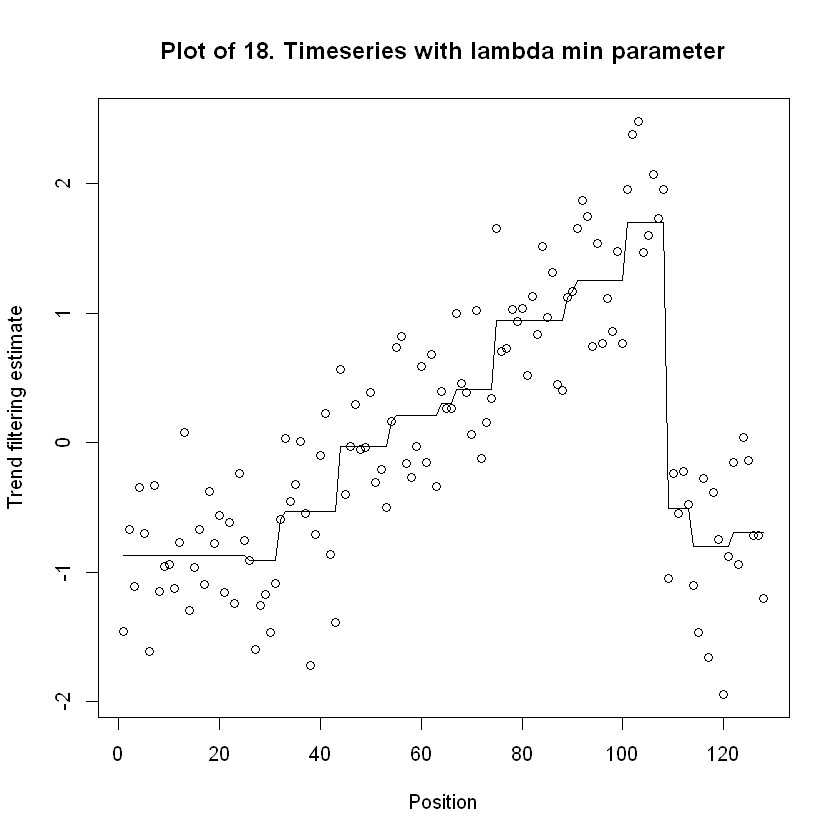

[1] "19. Timeseries"
[1] "Lambda Value of 19. dataset for min value: 0.970683237333312"
[1] "Lambda Value of 19. dataset for 1se value: 2.89434150000001"


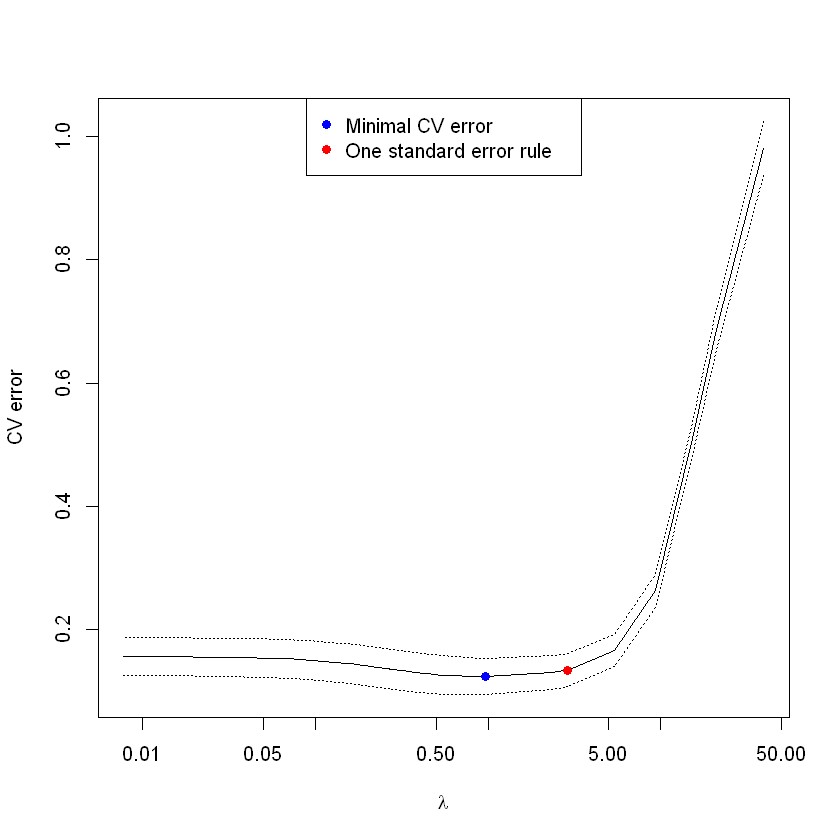

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


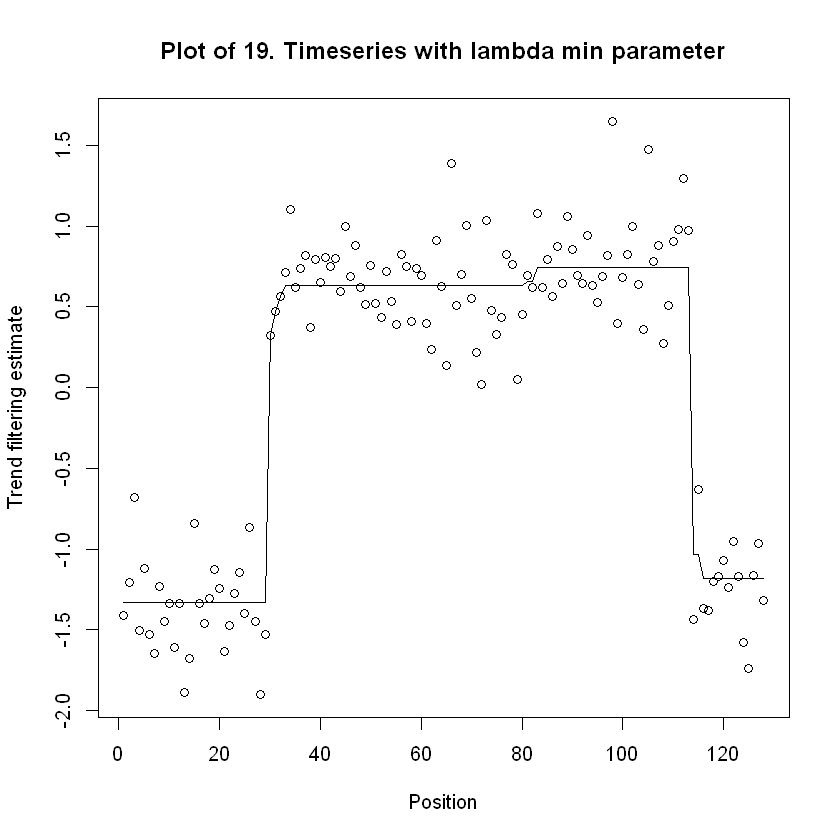

[1] "20. Timeseries"
[1] "Lambda Value of 20. dataset for min value: 0.3821081"
[1] "Lambda Value of 20. dataset for 1se value: 1.97882005255881"


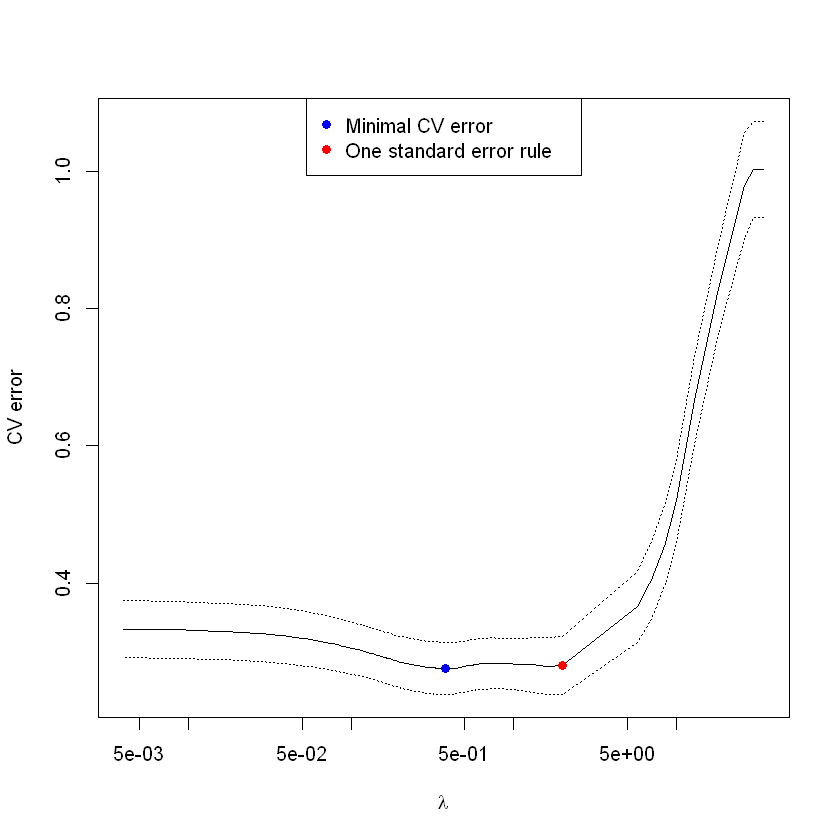

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


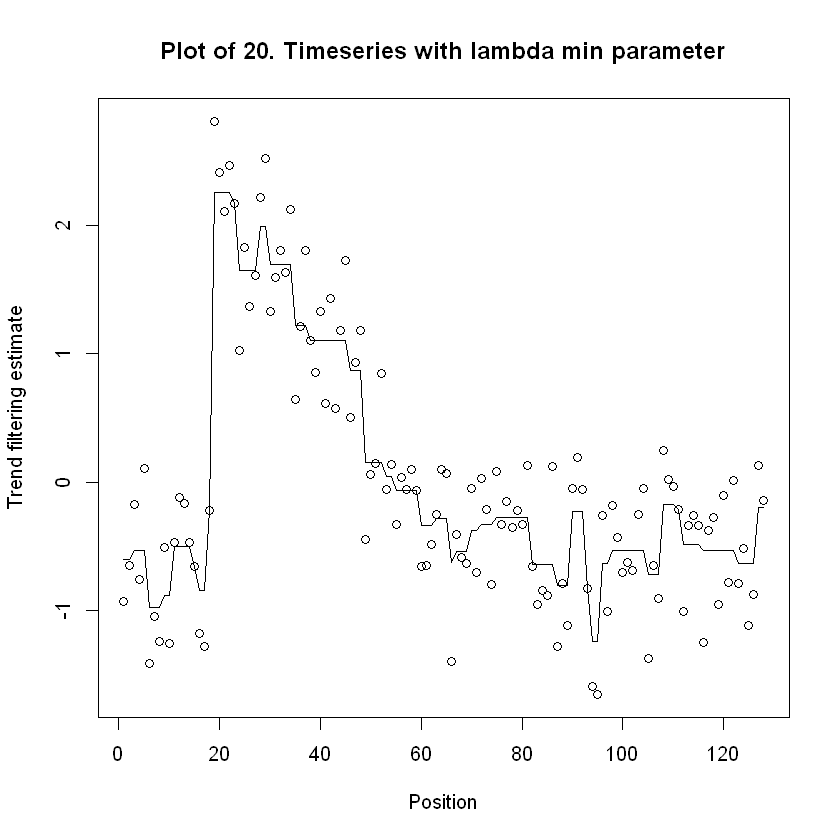

[1] "21. Timeseries"
[1] "Lambda Value of 21. dataset for min value: 0.95865362982353"
[1] "Lambda Value of 21. dataset for 1se value: 1.25555311"


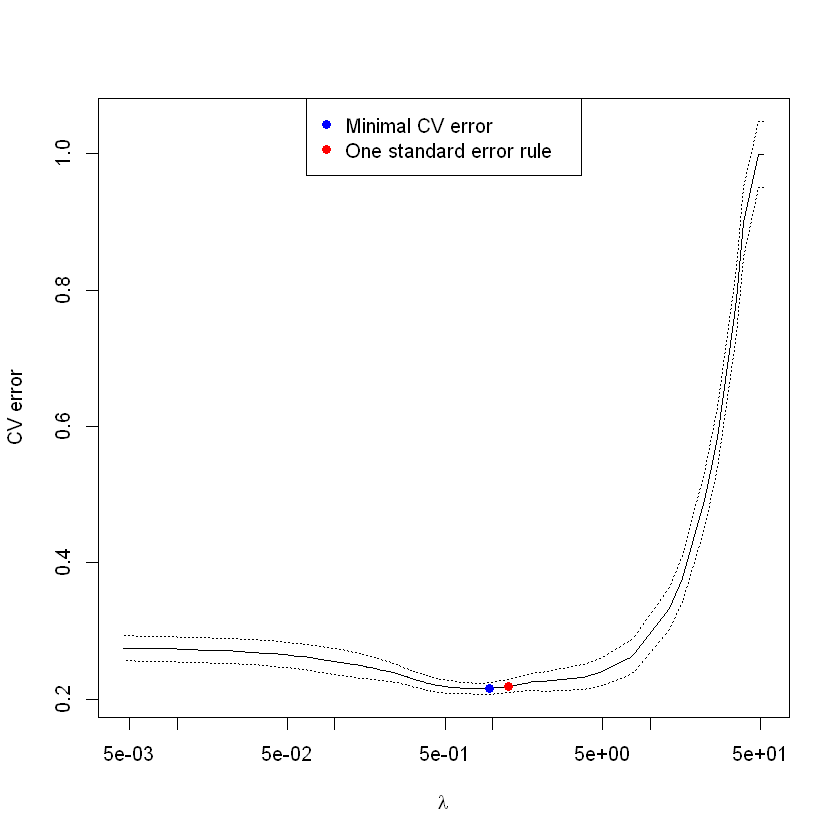

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


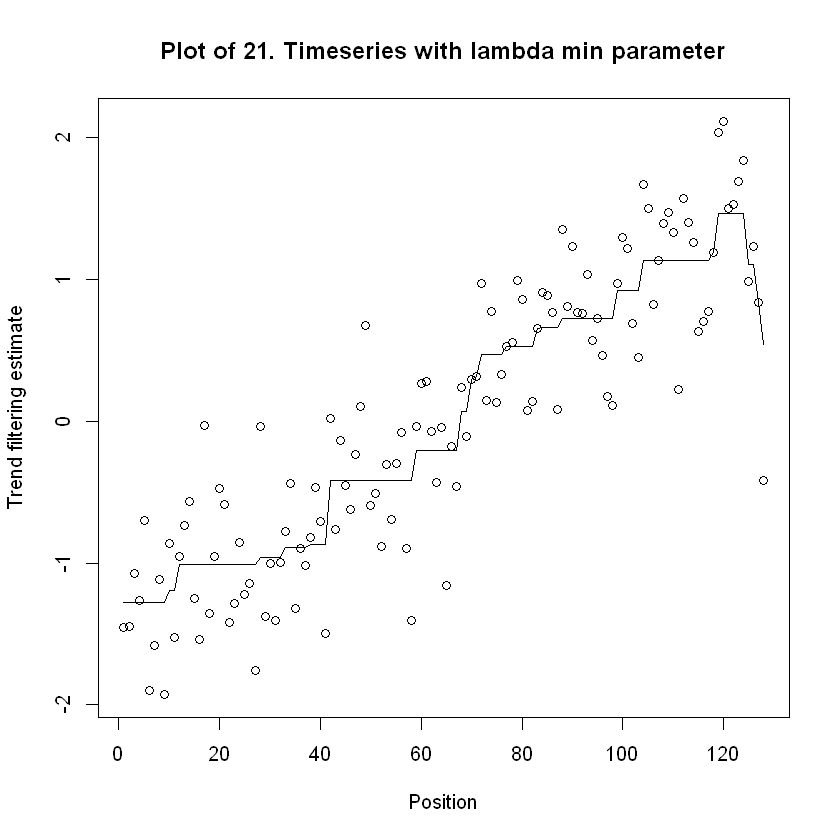

[1] "22. Timeseries"
[1] "Lambda Value of 22. dataset for min value: 0.588207126777778"
[1] "Lambda Value of 22. dataset for 1se value: 1.53021594555554"


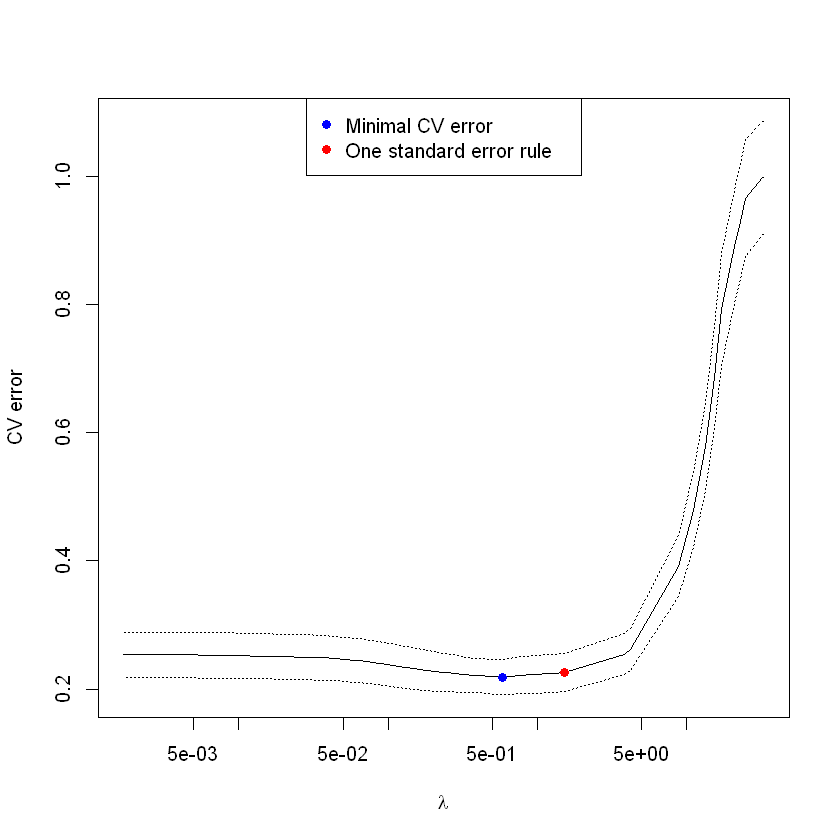

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


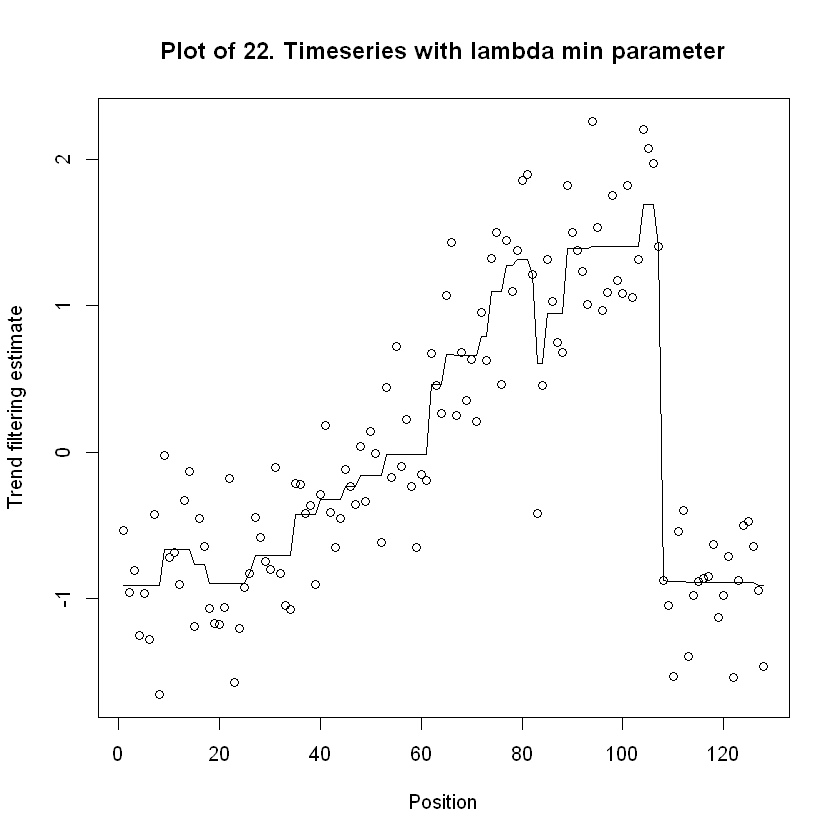

[1] "23. Timeseries"
[1] "Lambda Value of 23. dataset for min value: 0.774408884642857"
[1] "Lambda Value of 23. dataset for 1se value: 3.42123133371054"


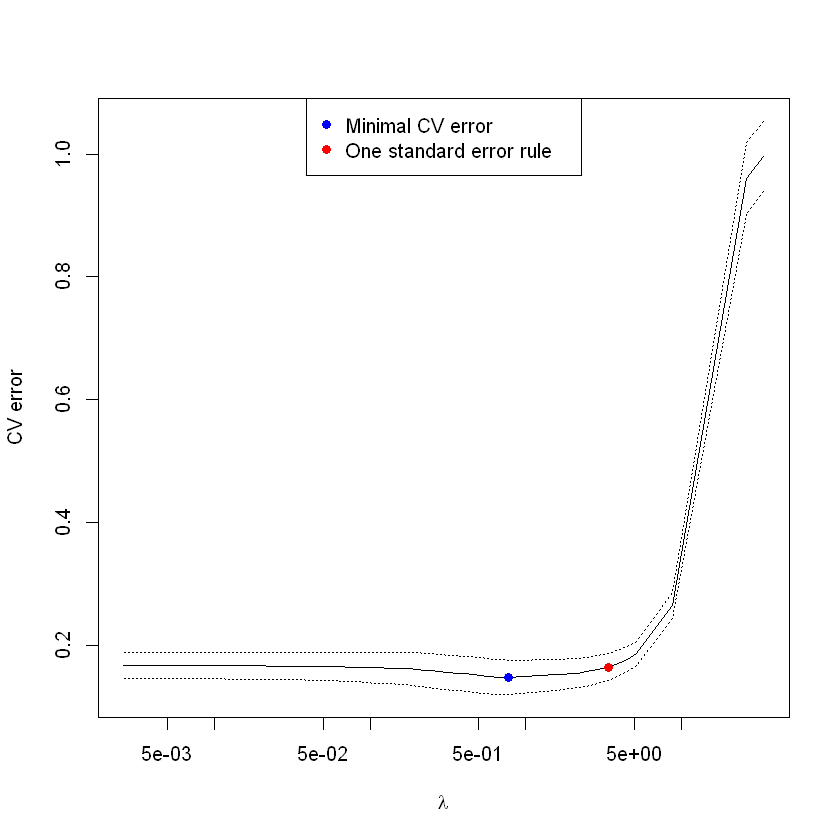

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


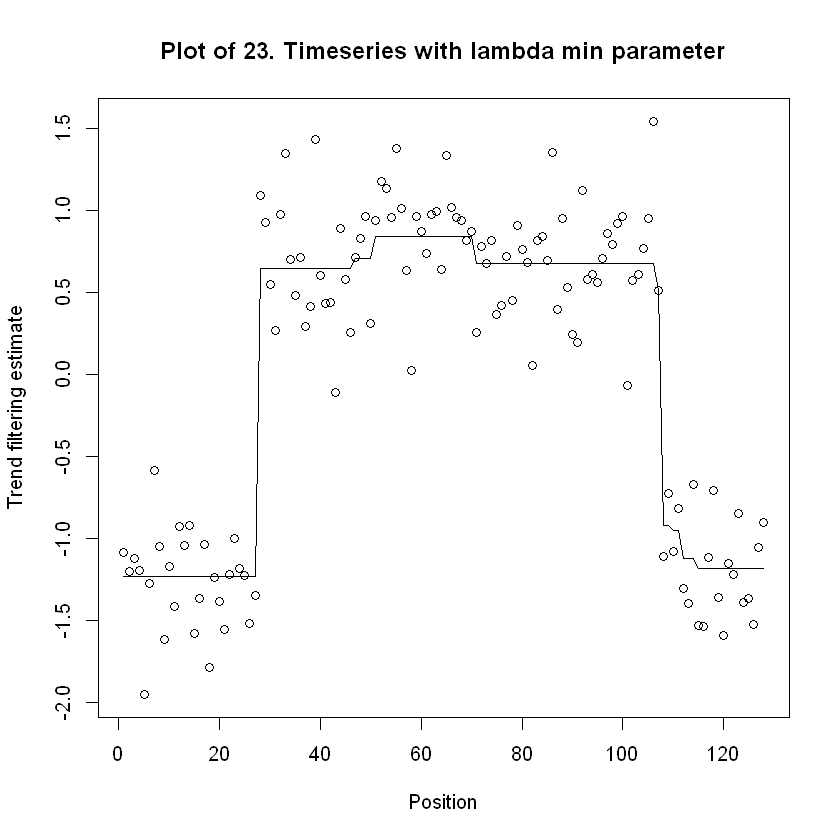

[1] "24. Timeseries"
[1] "Lambda Value of 24. dataset for min value: 2.2537324608108"
[1] "Lambda Value of 24. dataset for 1se value: 3.92683693600004"


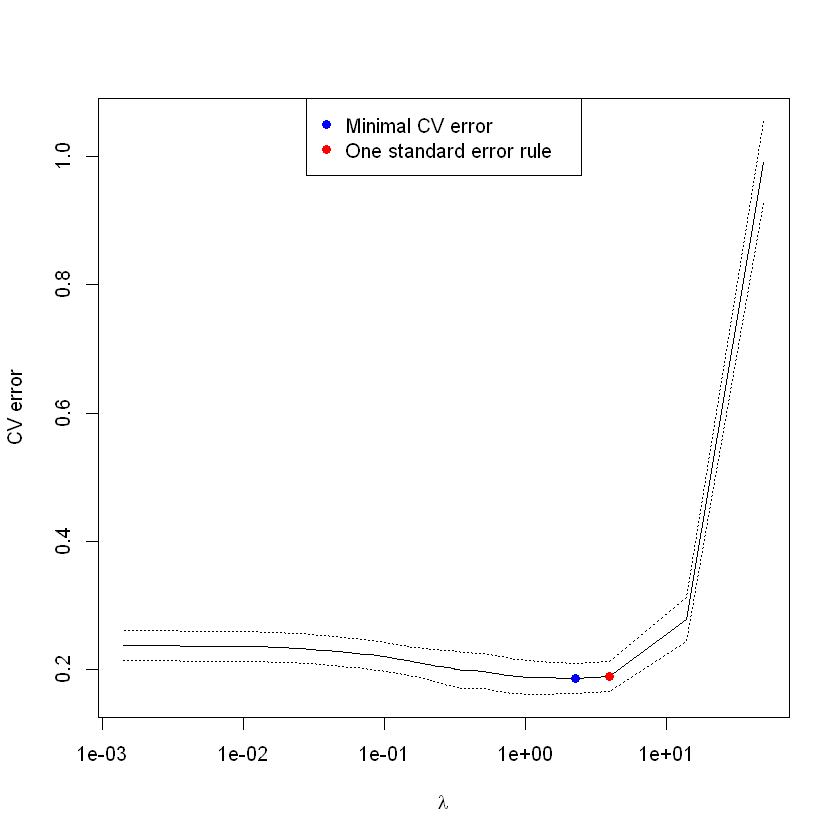

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


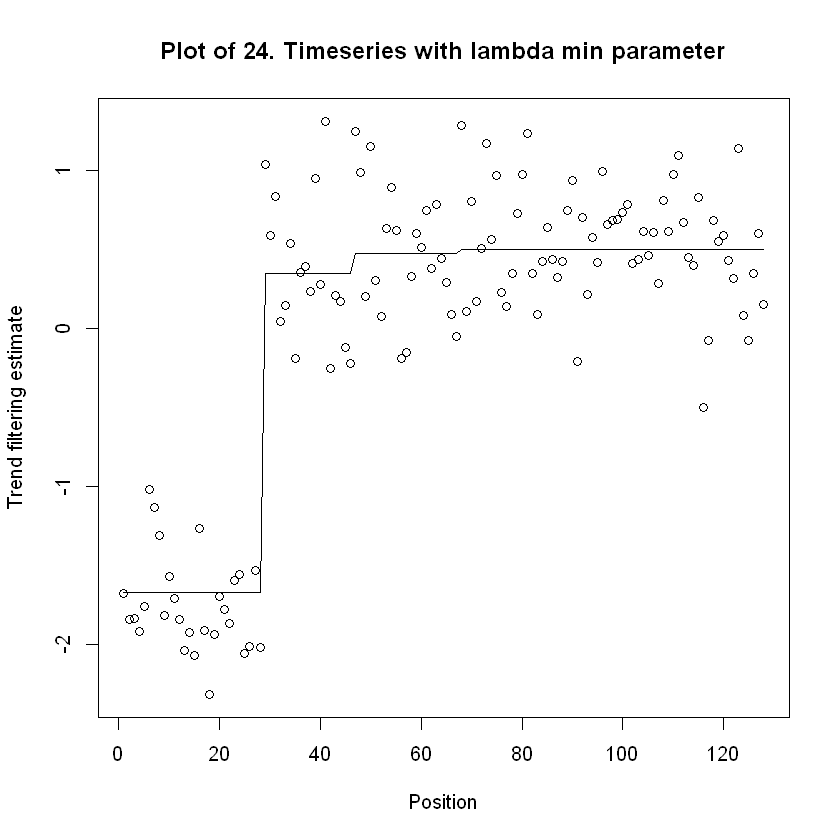

[1] "25. Timeseries"
[1] "Lambda Value of 25. dataset for min value: 0.99321292"
[1] "Lambda Value of 25. dataset for 1se value: 2.21244419999999"


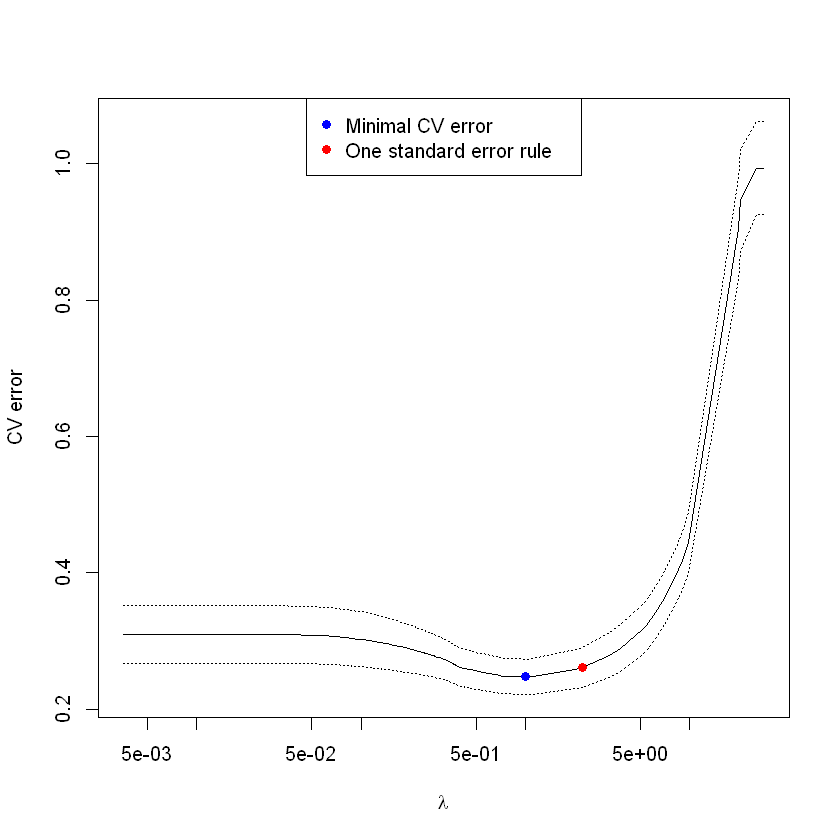

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


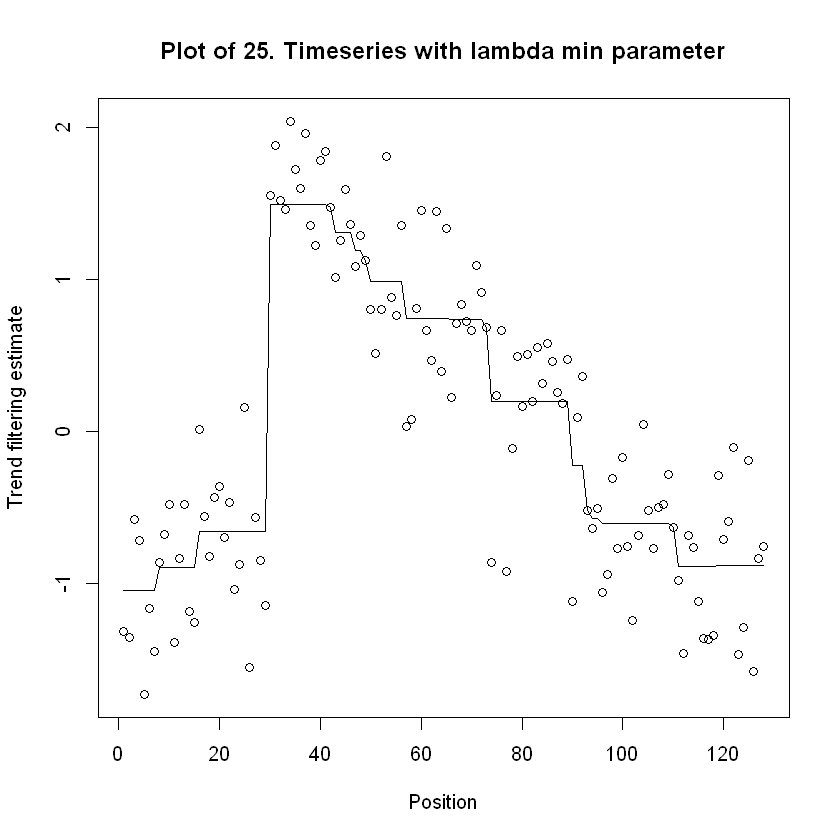

[1] "26. Timeseries"
[1] "Lambda Value of 26. dataset for min value: 0.708578827545454"
[1] "Lambda Value of 26. dataset for 1se value: 2.17342980275652"


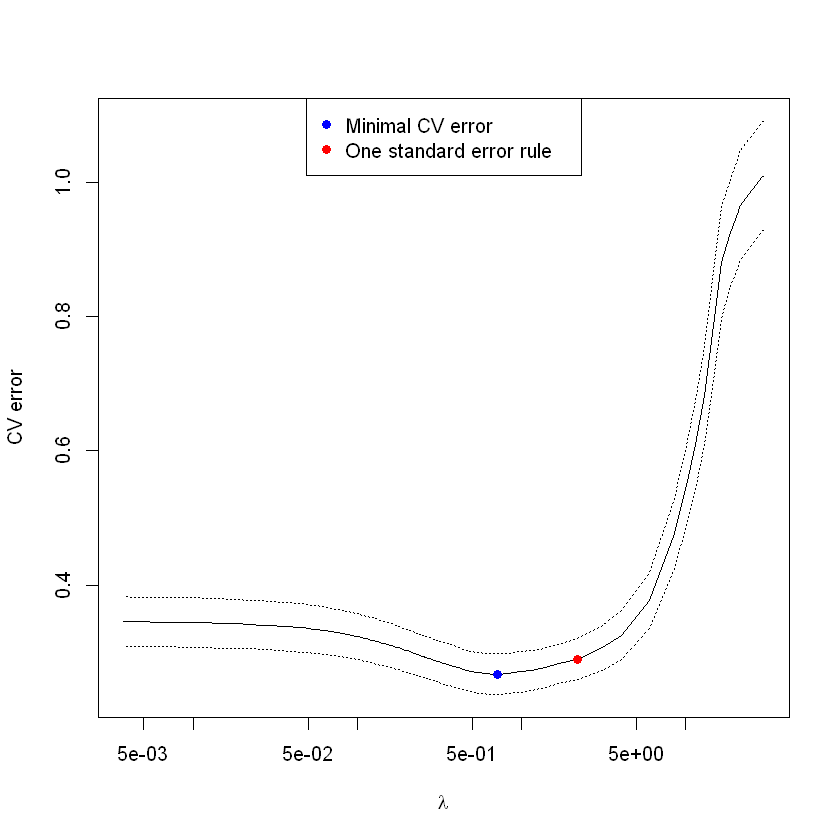

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


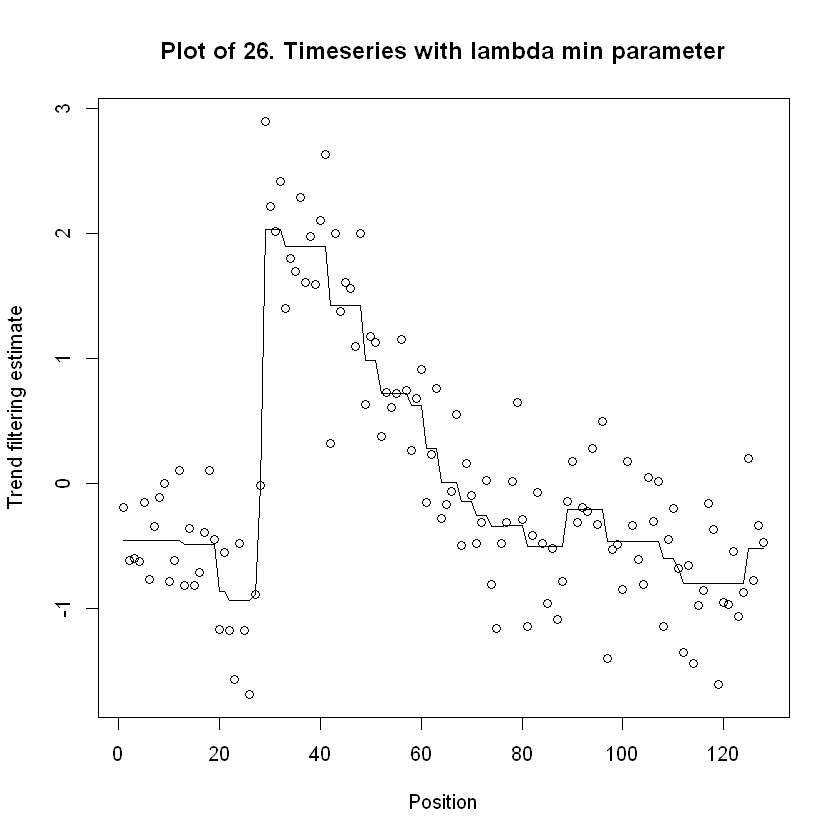

[1] "27. Timeseries"
[1] "Lambda Value of 27. dataset for min value: 0.978447472153846"
[1] "Lambda Value of 27. dataset for 1se value: 3.56322471733341"


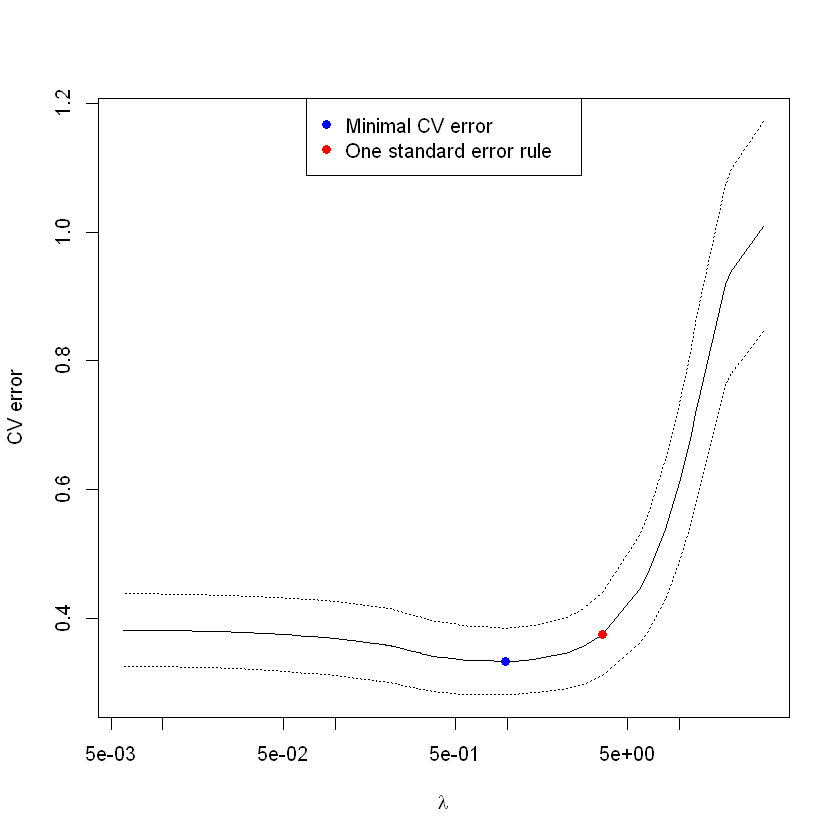

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


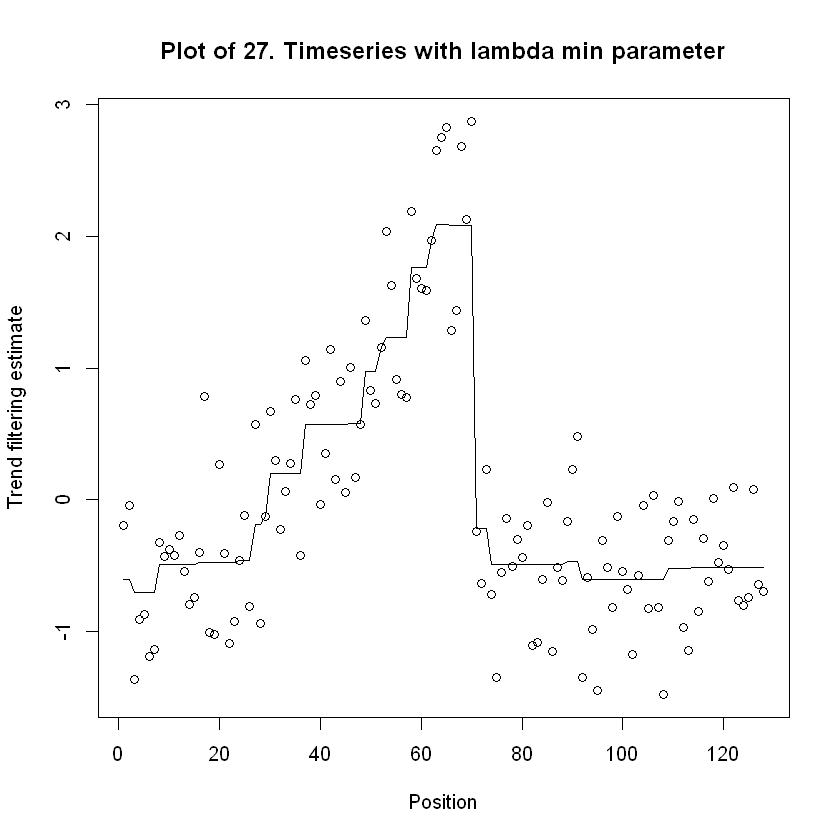

[1] "28. Timeseries"
[1] "Lambda Value of 28. dataset for min value: 1.371785149"
[1] "Lambda Value of 28. dataset for 1se value: 2.57305699563768"


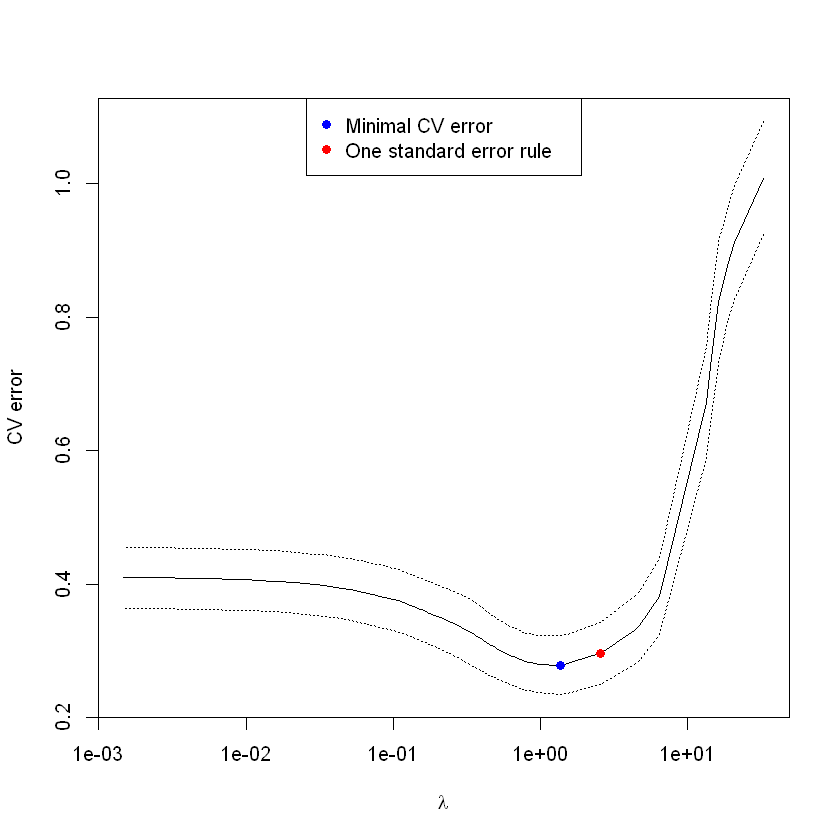

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


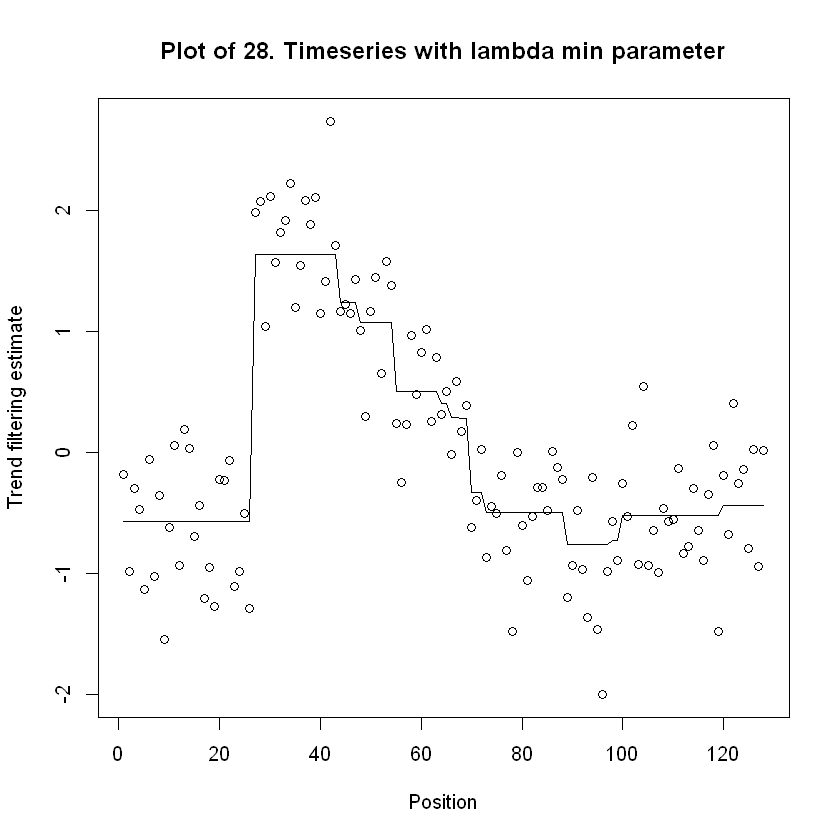

[1] "29. Timeseries"
[1] "Lambda Value of 29. dataset for min value: 0.549018224"
[1] "Lambda Value of 29. dataset for 1se value: 2.54716689060009"


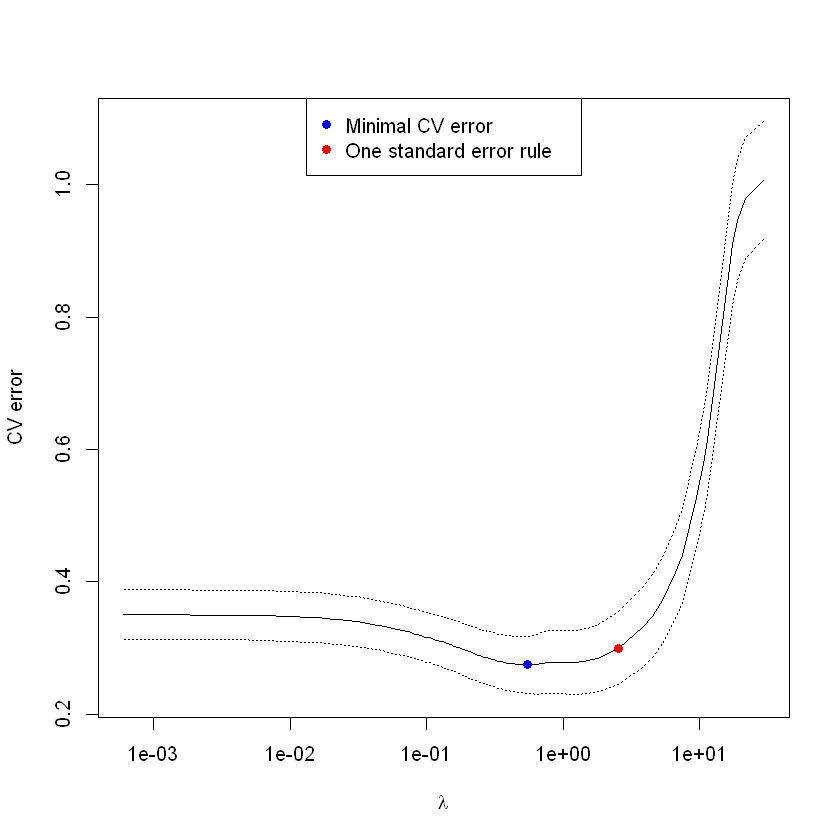

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 


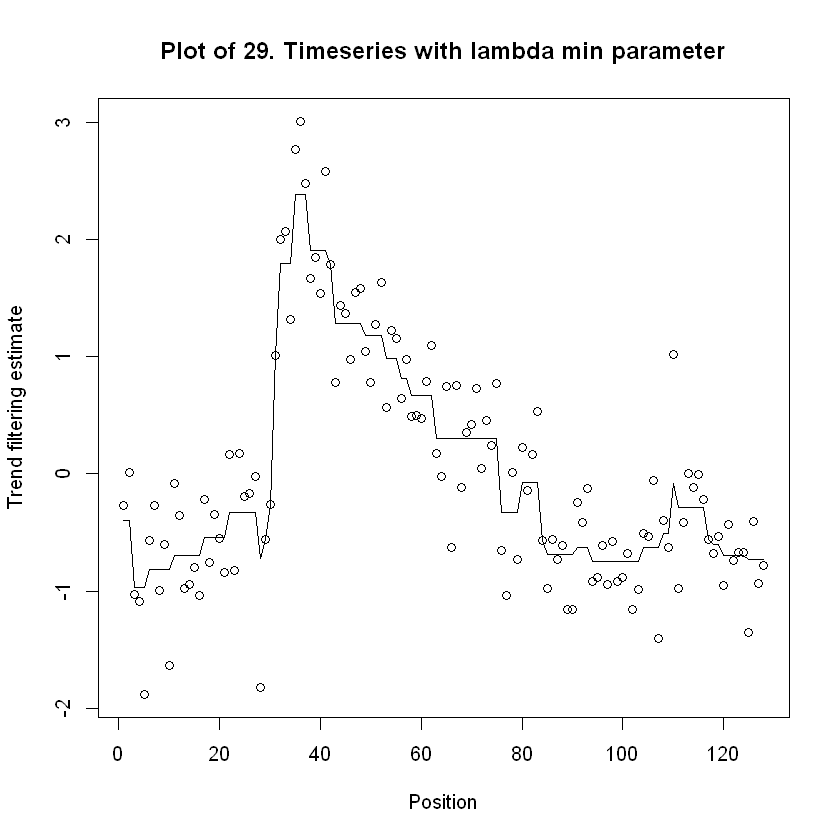

[1] "30. Timeseries"
[1] "Lambda Value of 30. dataset for min value: 0.293850541666667"
[1] "Lambda Value of 30. dataset for 1se value: 3.9982433249999"


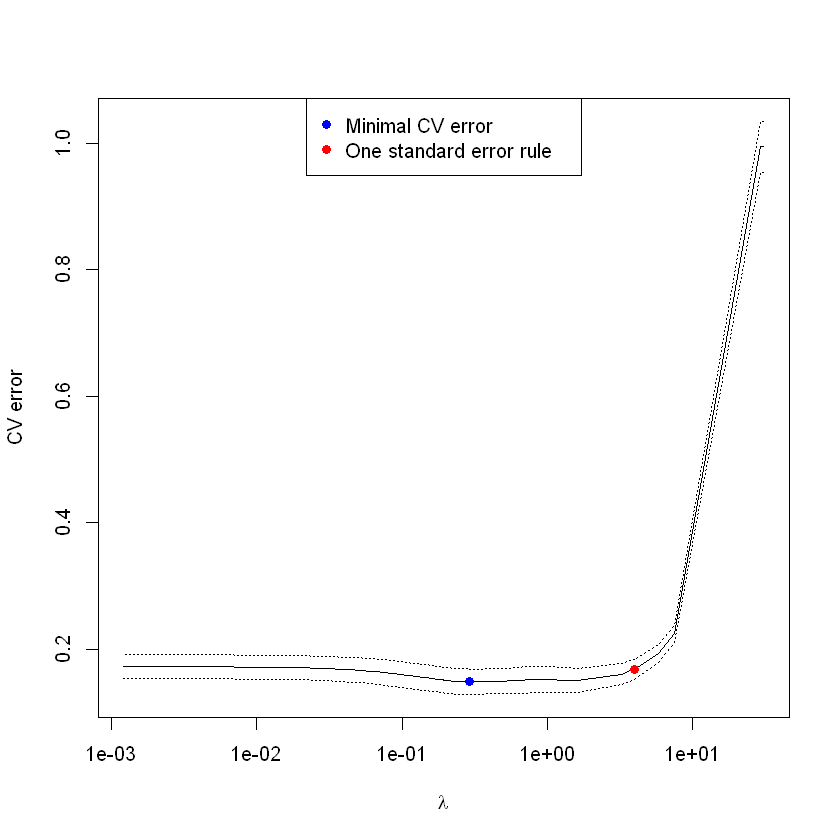

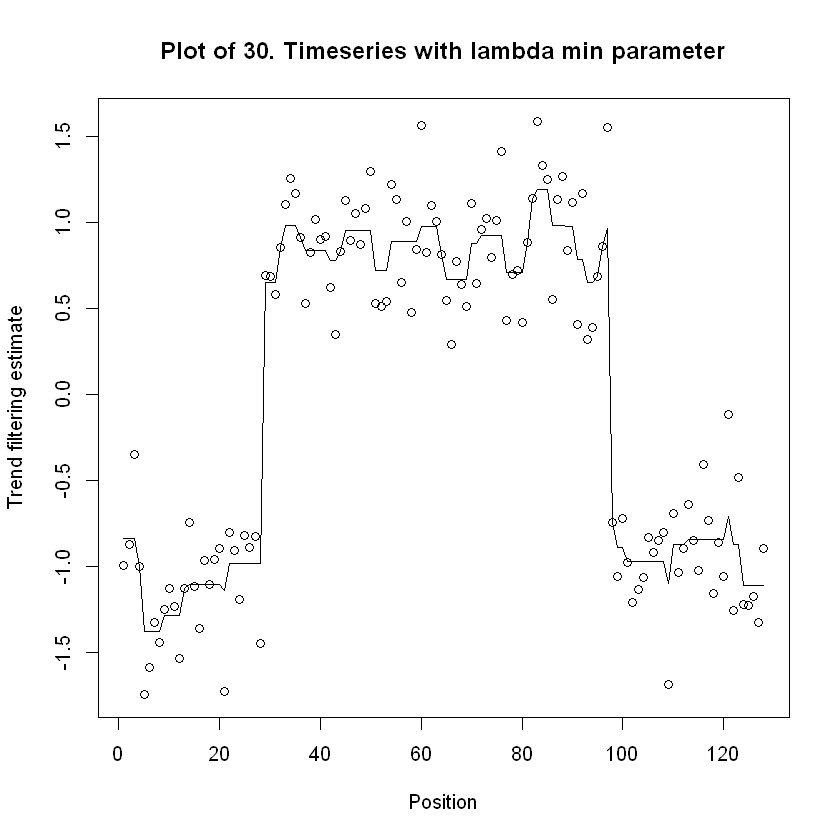

In [38]:
for(i in seq(1:30)){
    fused_results[[i]]=fused_lasso(train, i)
}

## Açıklama

# Task 2

## Caret

In [199]:
library(caret)
library(rpart)

### Value Obtainer as DataFrame

In [12]:
value_obtainer_2=function(dataset, index){
    a=data.table(time=seq(1,128), values=as.numeric(dataset[index,2:129]))
    return (a)
}

### Example Code for Regressor

In [13]:
regression_results=vector("list", 5)

In [14]:
current_dt=value_obtainer_2(train,1)

In [15]:
train_control= trainControl(method="cv", number=10)

In [16]:
for(i in 1:5){
    model = train(values ~., data = current_dt, 
          method = "rpart",
          tuneGrid = data.frame(cp = 0),
          control = rpart.control(minsplit = 20, minbucket = 10, maxdepth=i))
    regression_results[[i]]=model$results 
}

In [17]:
reg_res=rbindlist(regression_results)
reg_res[,max_depth:=seq(1,5)]
reg_res[,cp:=NULL]

In [18]:
reg_res

RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD,max_depth
0.8337007,0.3211522,0.6779477,0.05492306,0.09714944,0.05464318,1
0.4206782,0.8263271,0.2785523,0.10129297,0.08203973,0.04470151,2
0.4260431,0.8209144,0.2889485,0.08429196,0.06824576,0.03550499,3
0.3953468,0.8390357,0.2747394,0.09015450,0.07084402,0.03694275,4
0.4125026,0.8313145,0.2924267,0.09866461,0.07571225,0.04467951,5


In [19]:
which.min(reg_res$RMSE)

[1] 4

In [20]:
model_final = train(values ~., data = current_dt, 
          method = "rpart",
          tuneGrid = data.frame(cp = 0),
          control = rpart.control(minsplit = 20, minbucket = 10, maxdepth=which.min(reg_res$RMSE)))
    regression_results[[i]]=model$results 

## Example Result

In [21]:
predictions=predict(model_final,newdata=current_dt)

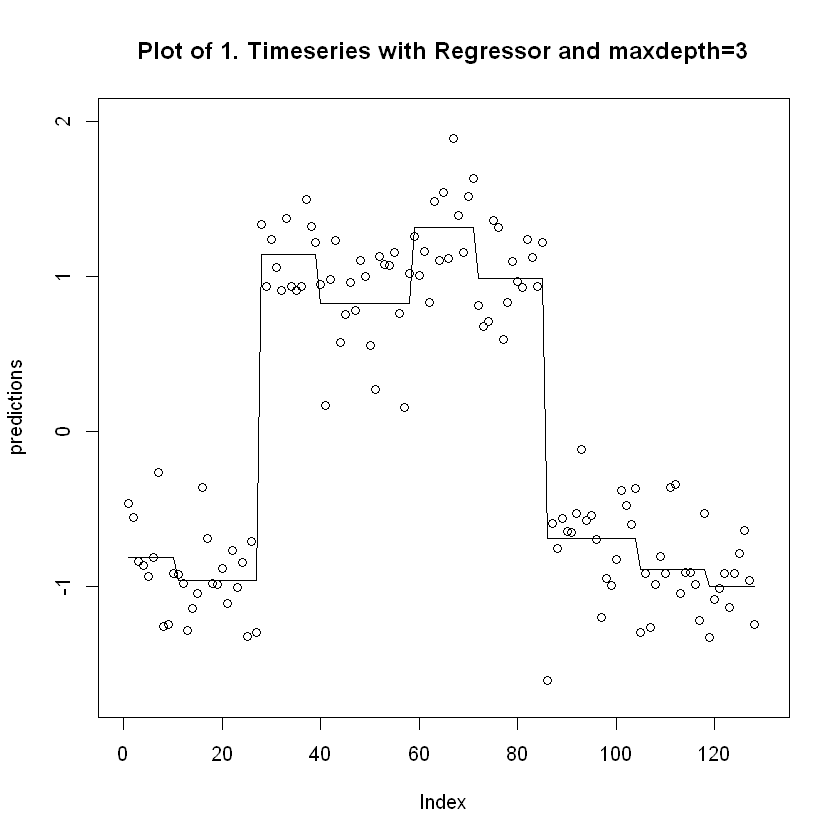

In [22]:
plot(predictions,type="l", xlim=c(0,130), ylim=c(-1.7,2), main="Plot of 1. Timeseries with Regressor and maxdepth=3")
points(current_dt[,.(values)])

## Regression Function

In [23]:
regression_results=vector("list", 30)

In [24]:
regression_function=function(dataset, index){
    regression_results=vector("list", 5)

    current_dt=value_obtainer_2(dataset,index)

    train_control= trainControl(method="cv", number=10)

    for(i in 1:5){
        model = train(values ~., data = current_dt, 
              method = "rpart",
              tuneGrid = data.frame(cp = 0),
              control = rpart.control(minsplit = 20, minbucket = 10, maxdepth=i))
        regression_results[[i]]=model$results 
    }
    

    reg_res=rbindlist(regression_results)
    reg_res[,max_depth:=seq(1,5)]
    reg_res[,cp:=NULL]
    
    
    best_parameter=which.min(reg_res$RMSE)

    model_final = train(values ~., data = current_dt, 
              method = "rpart",
              tuneGrid = data.frame(cp = 0),
              control = rpart.control(minsplit = 20, minbucket = 10, maxdepth=best_parameter))
        regression_results[[i]]=model$results 

    predictions=predict(model_final,newdata=current_dt)
    
    plot(predictions,type="l", xlim=c(0,130), ylim=c(-1.7,2), main=paste0("Plot of ", index,". Timeseries with Regressor and maxdepth=",best_parameter))
    points(current_dt[,.(values)])
    
    return(list(reg_res,predictions))
      
}

## Results of Task 1 for All Time Series

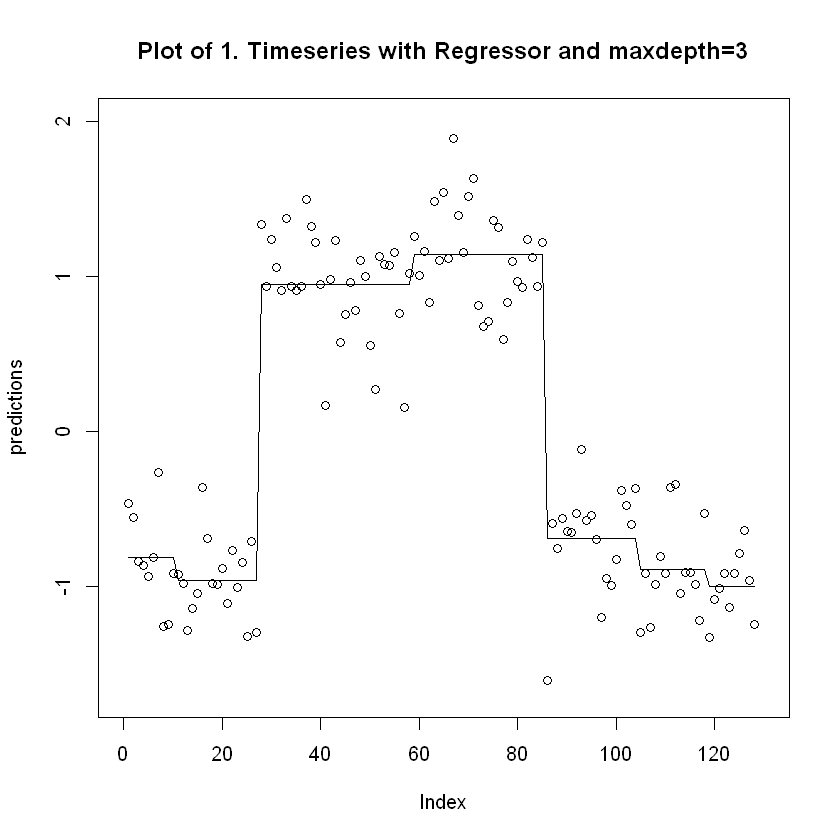

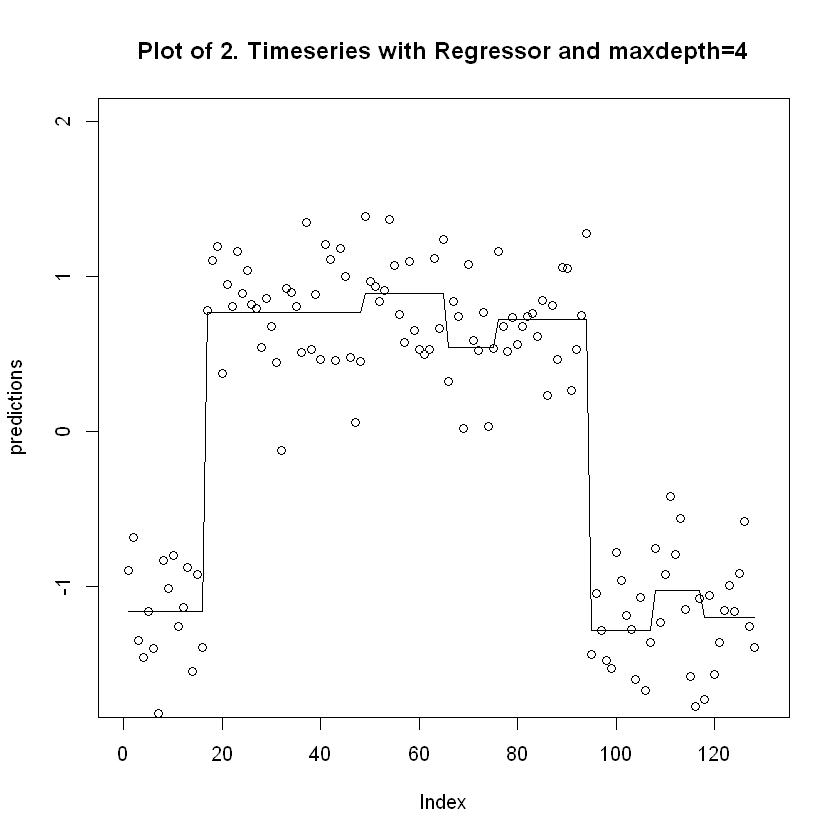

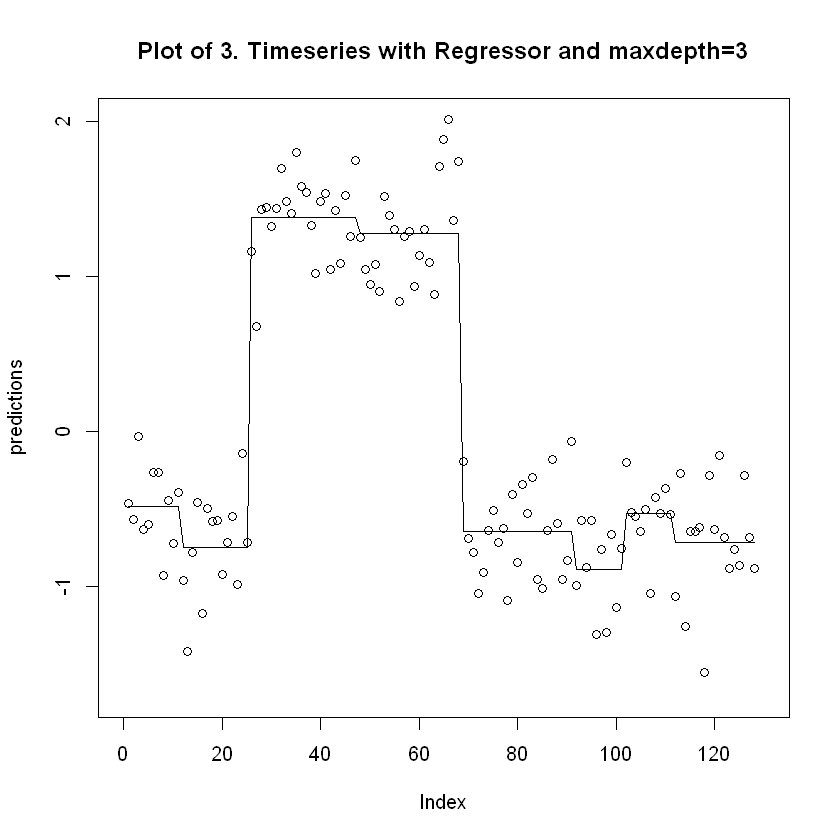

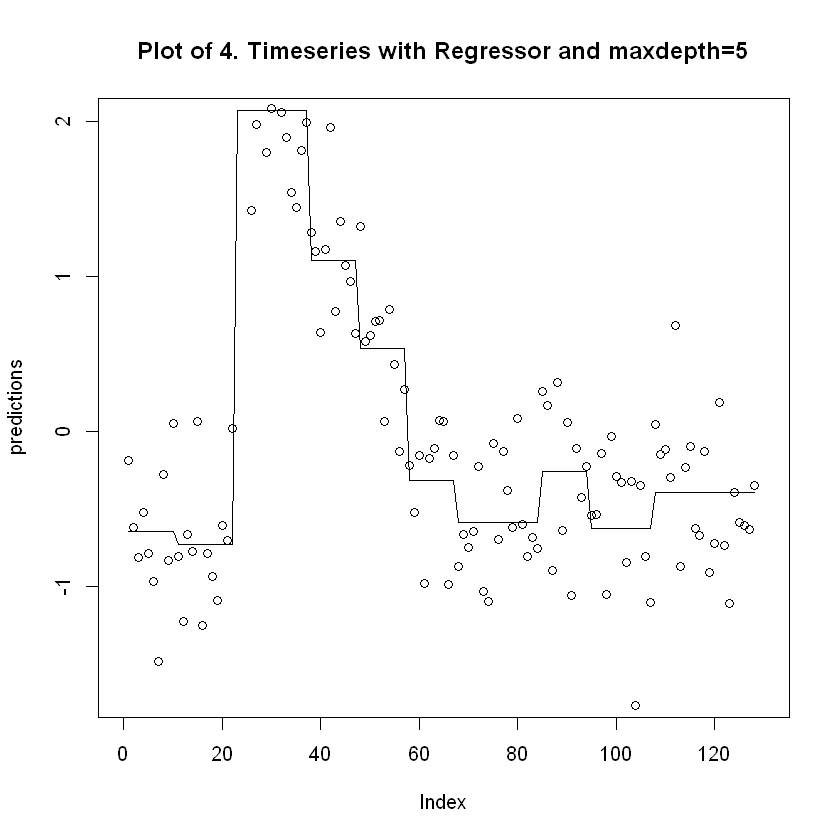

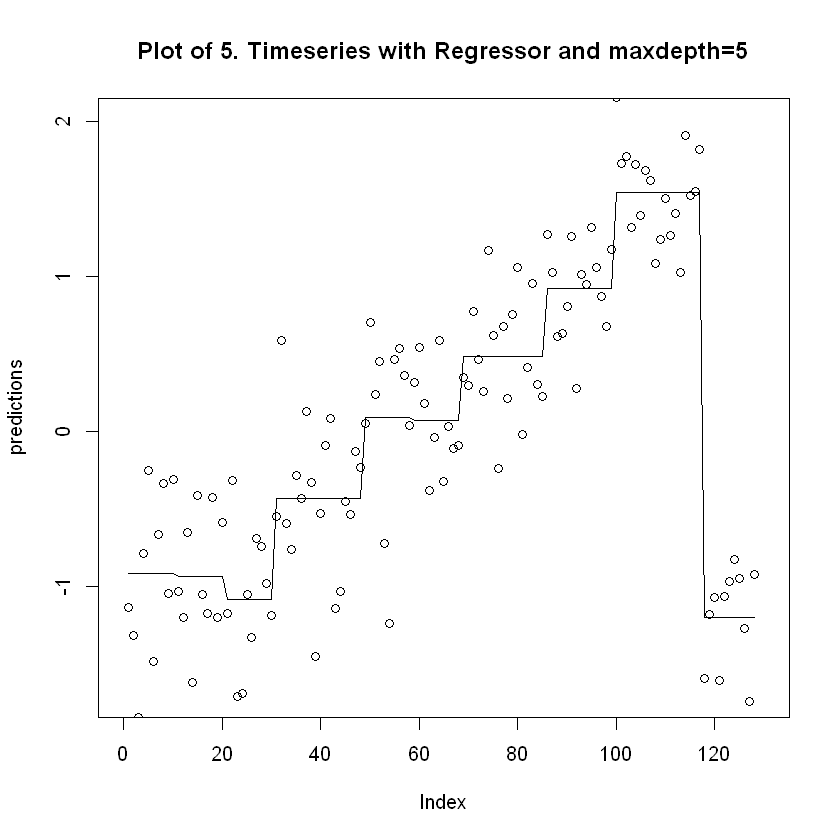

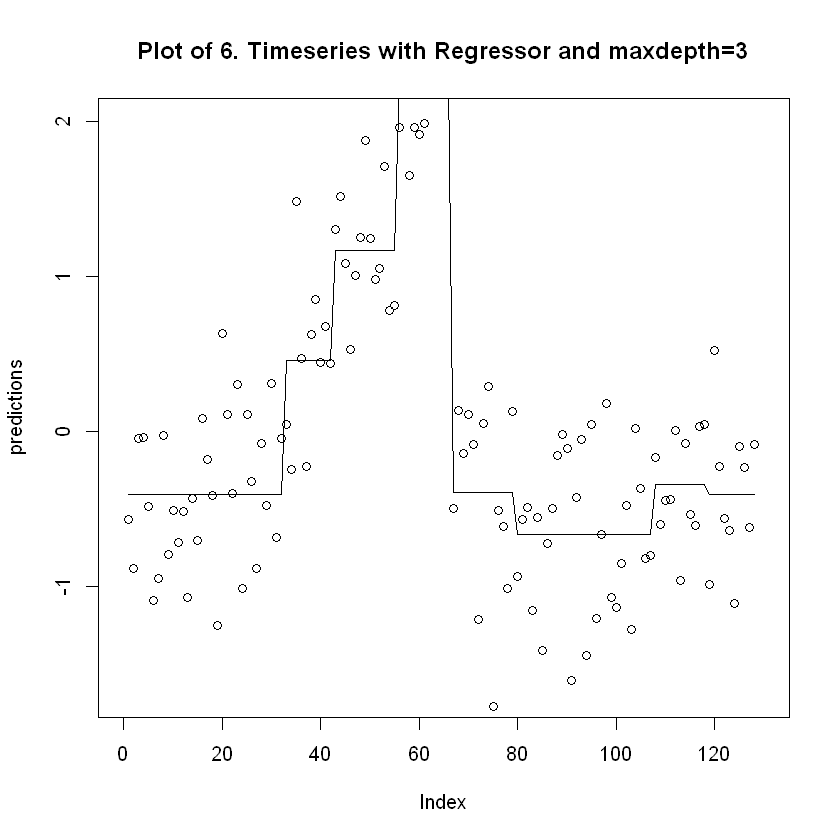

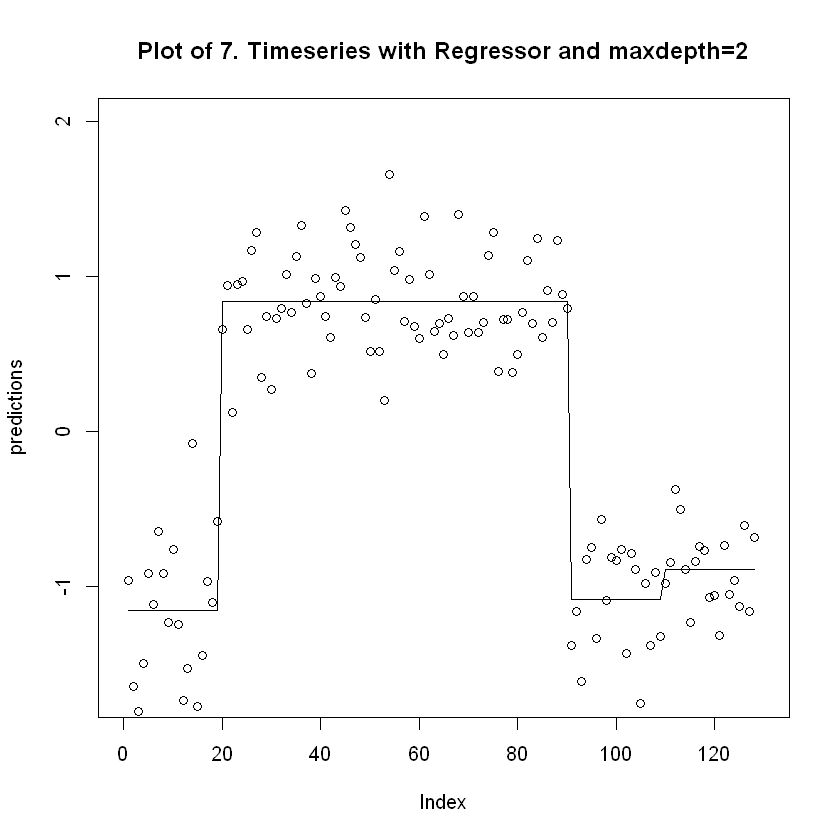

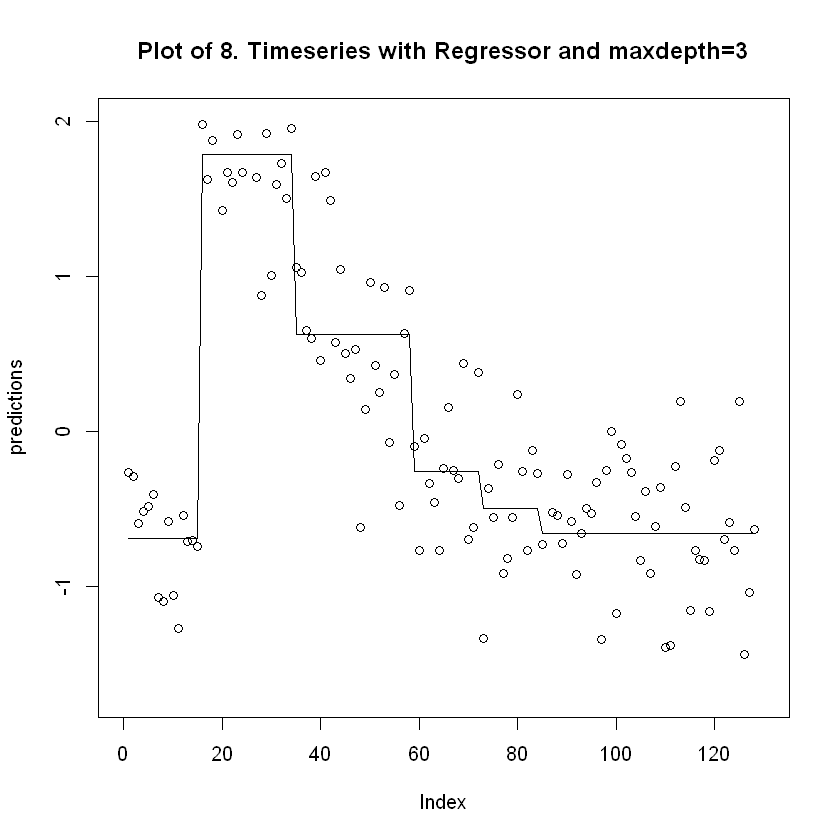

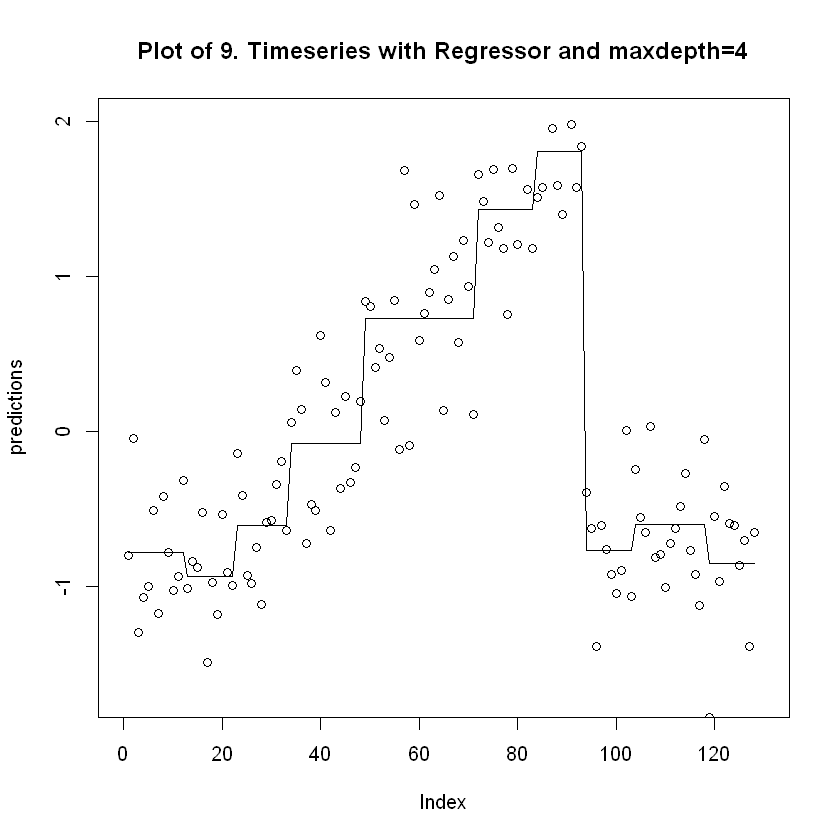

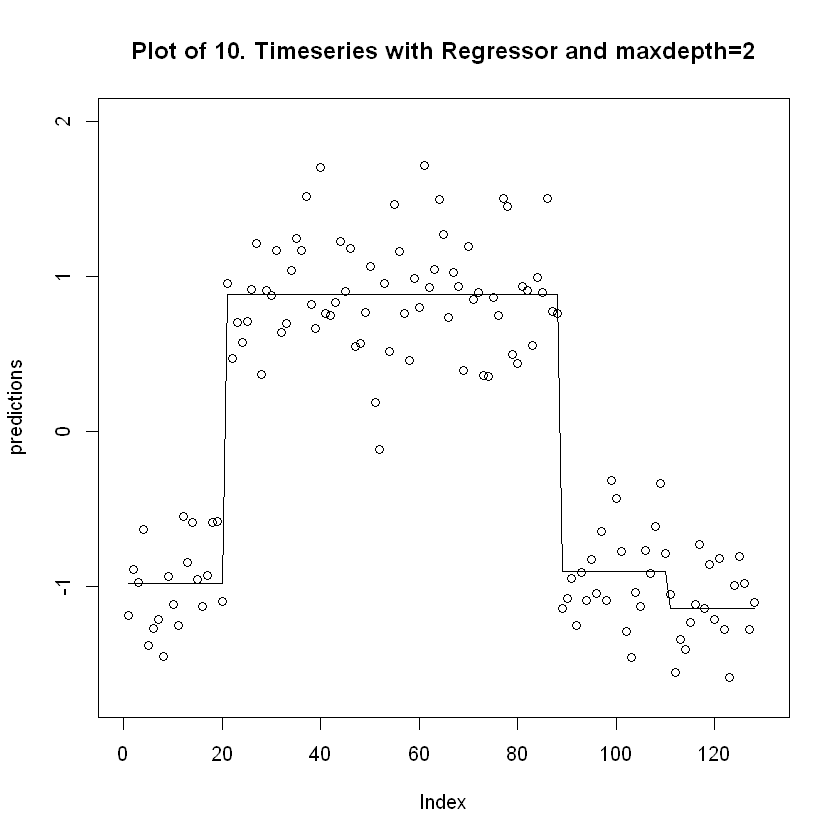

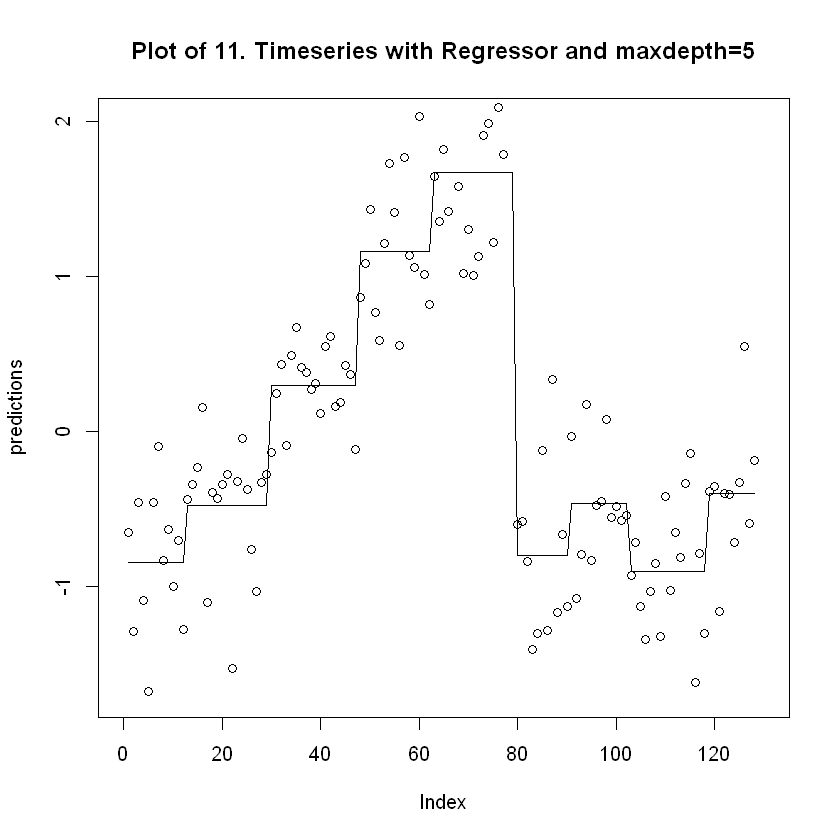

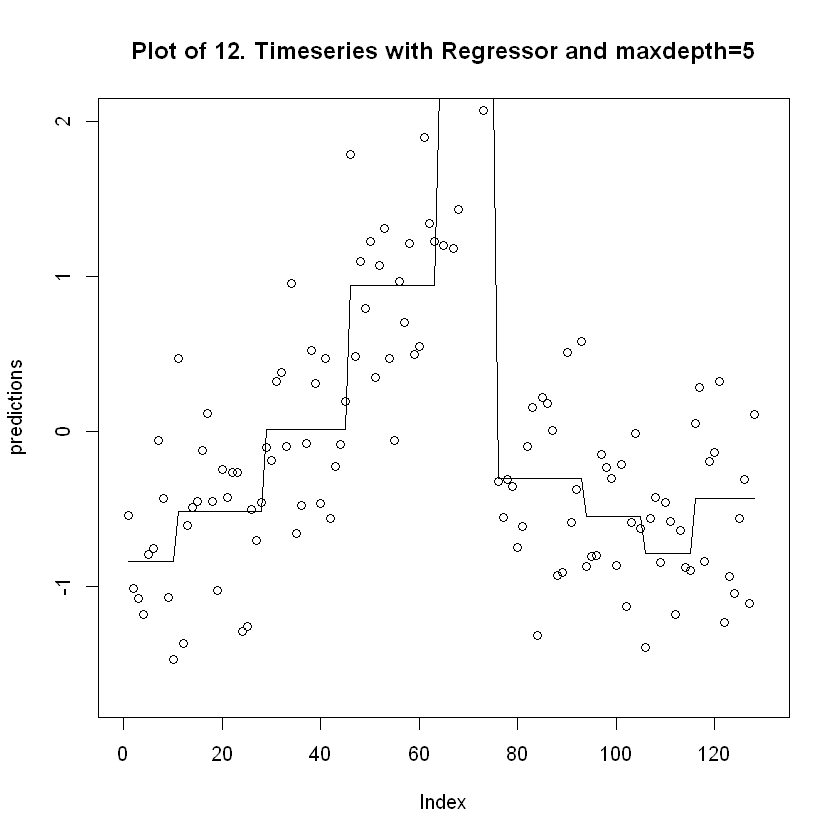

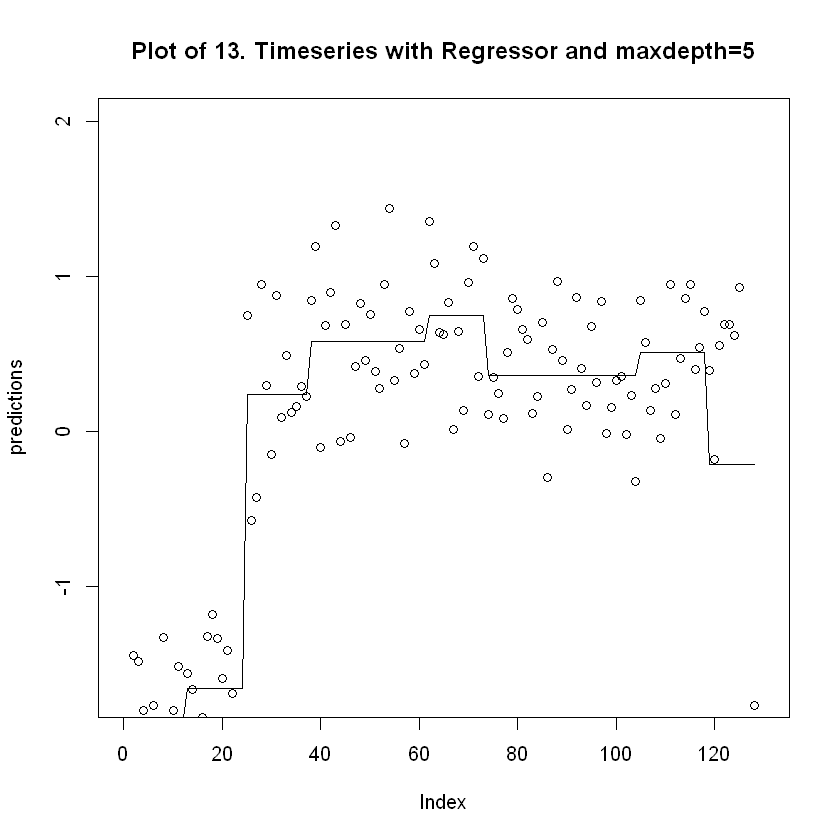

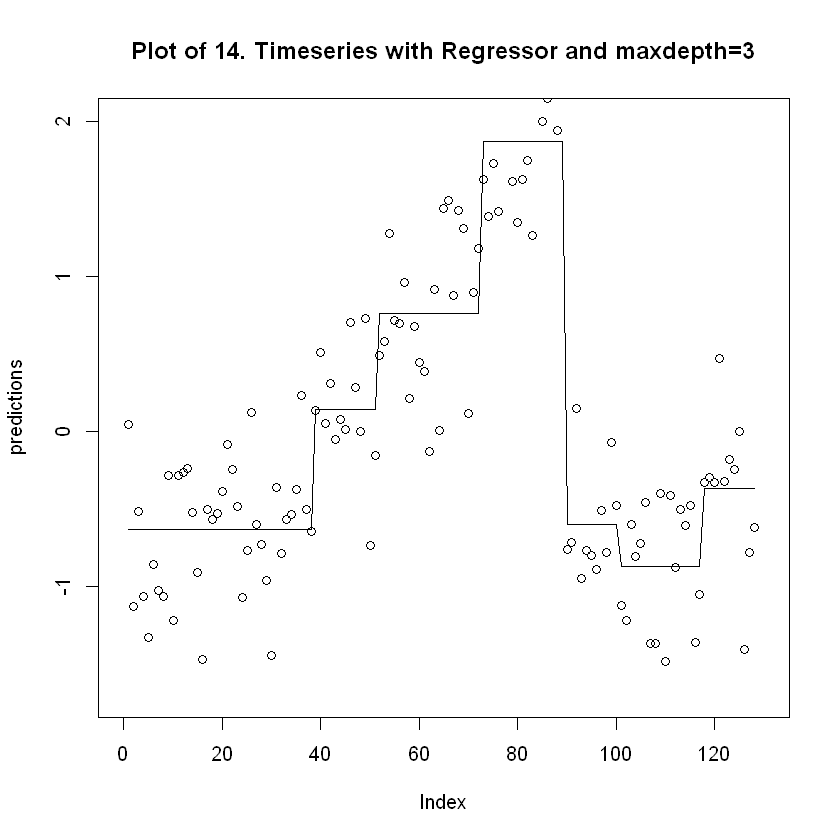

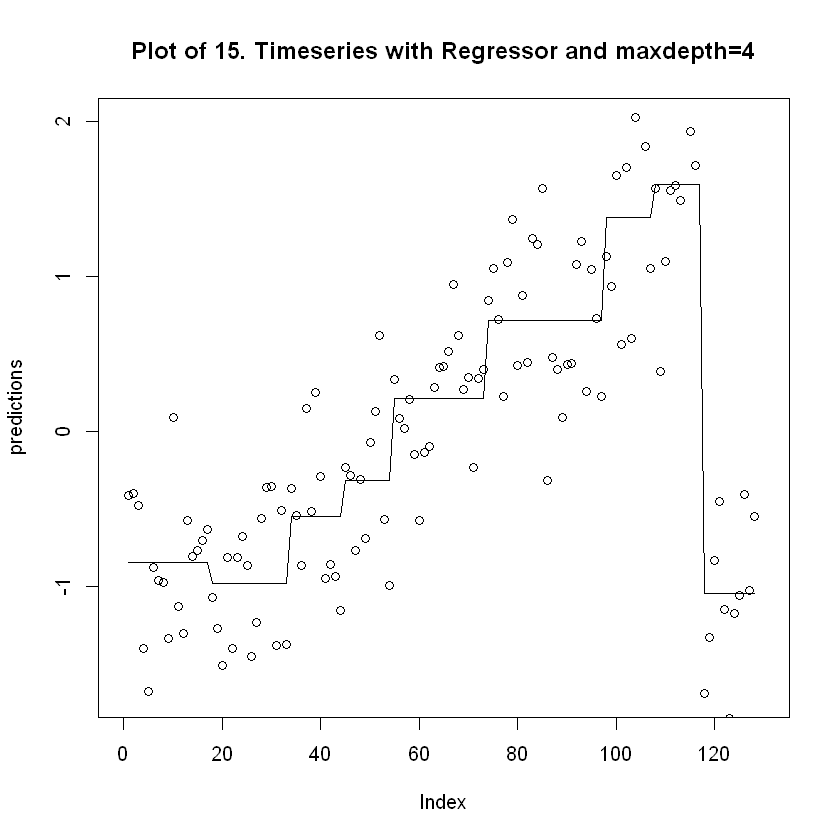

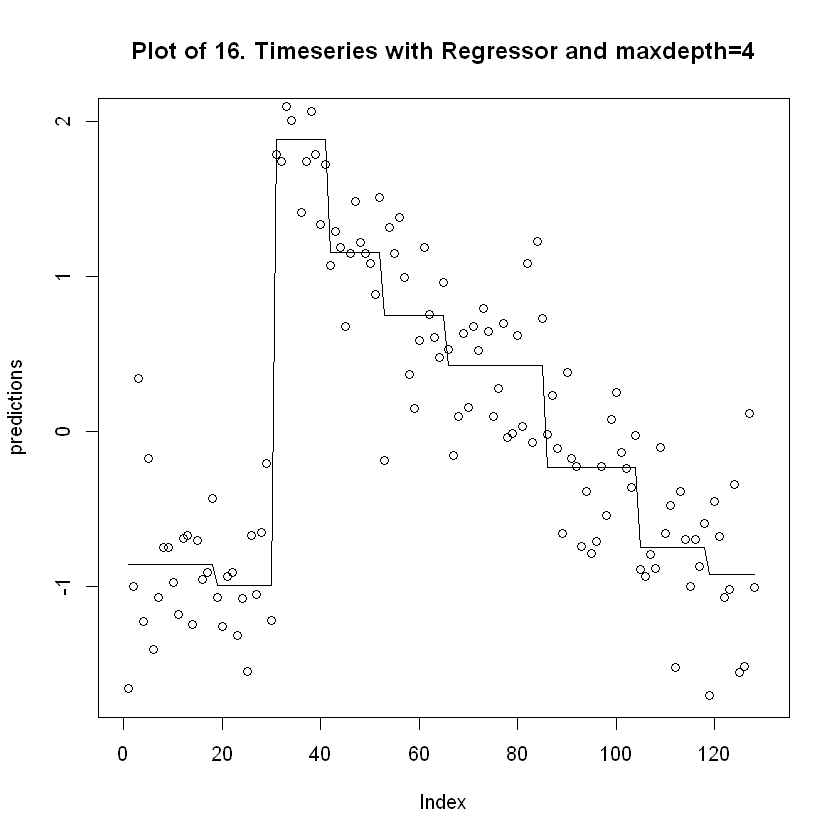

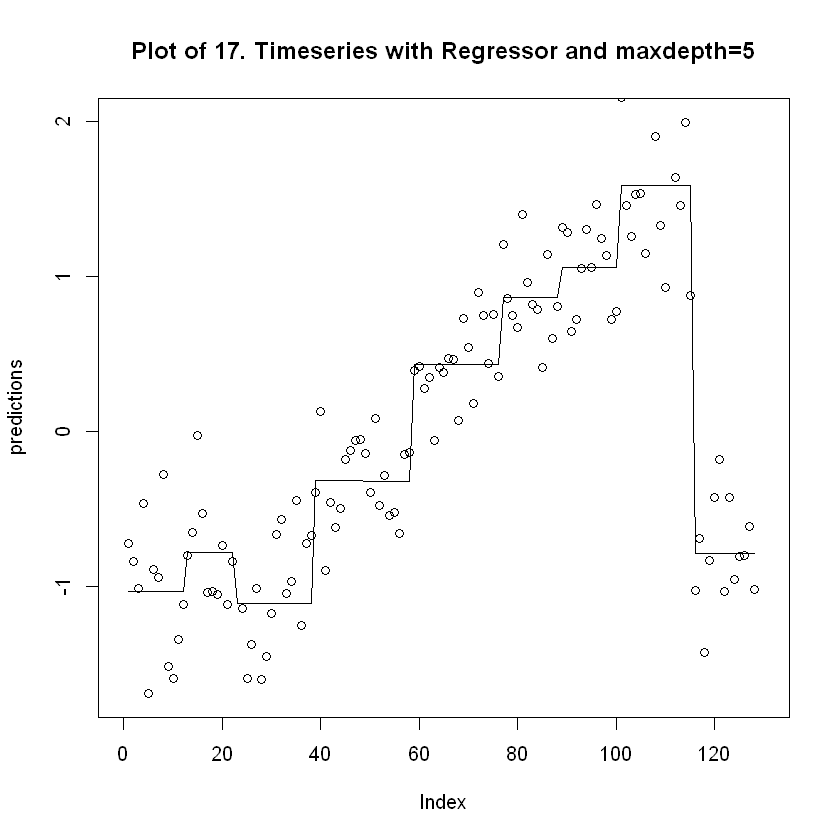

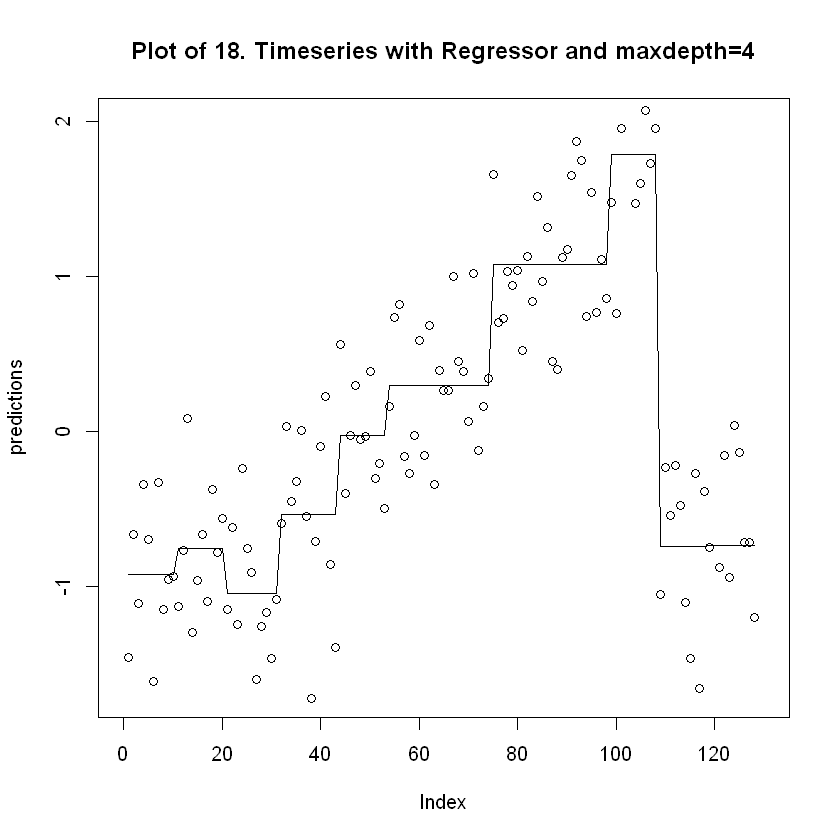

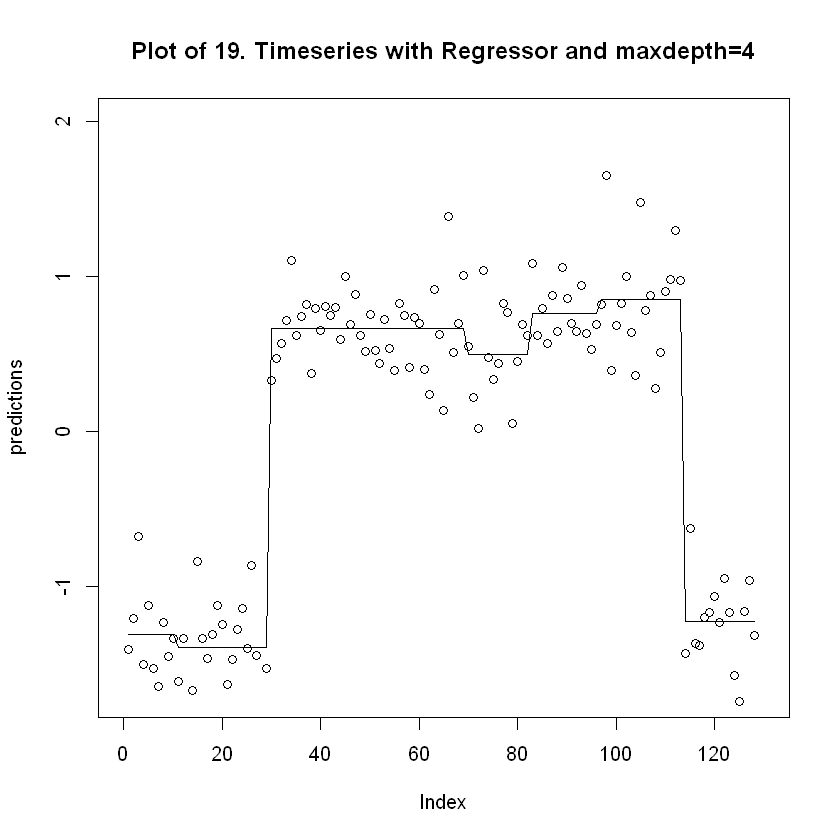

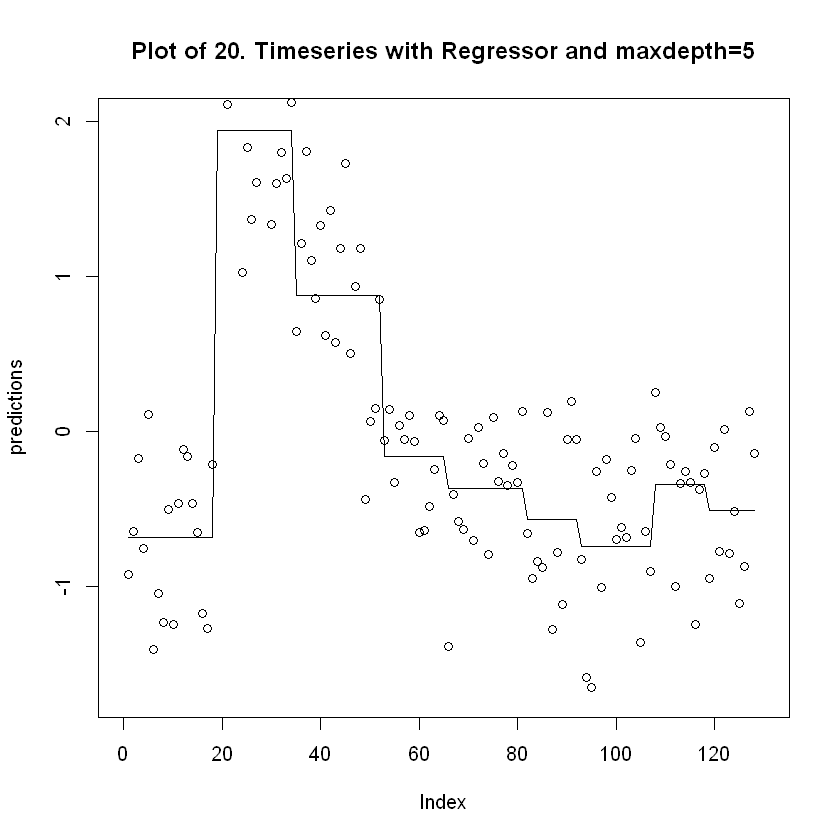

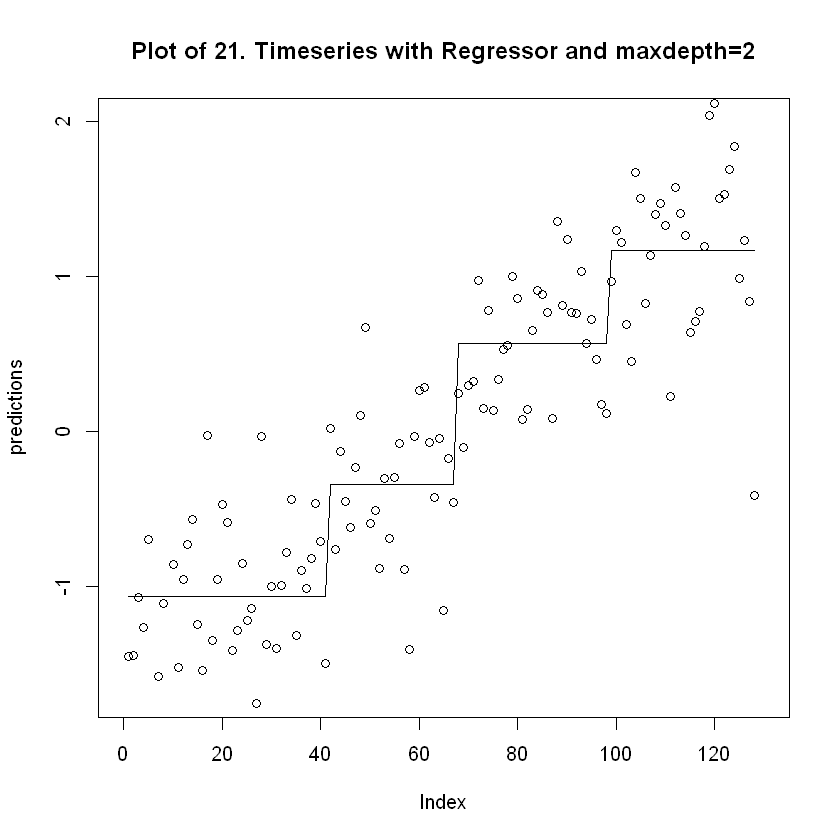

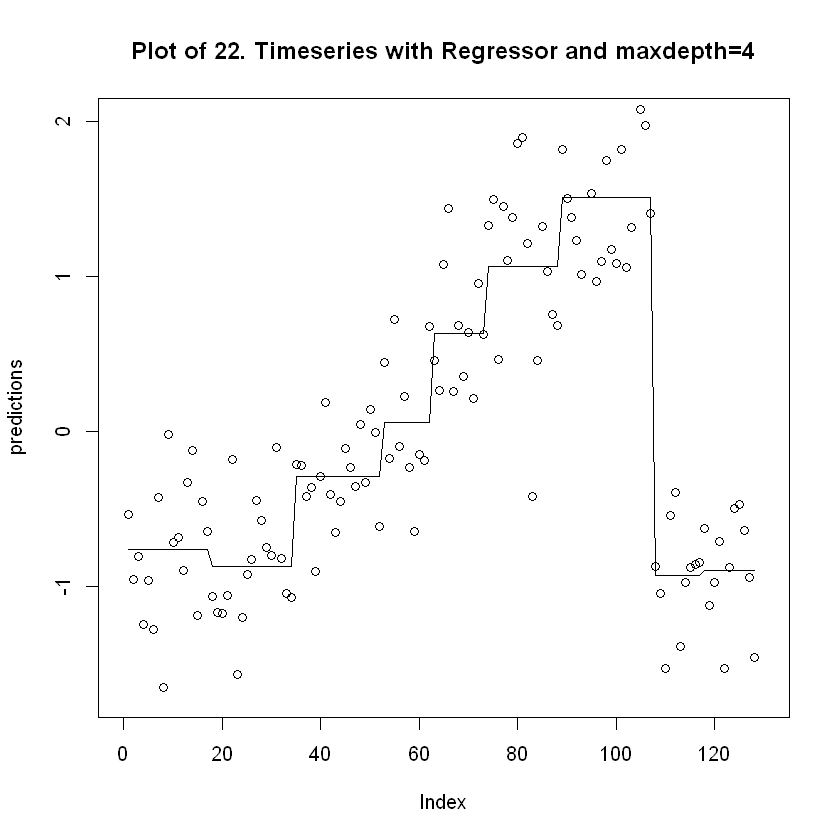

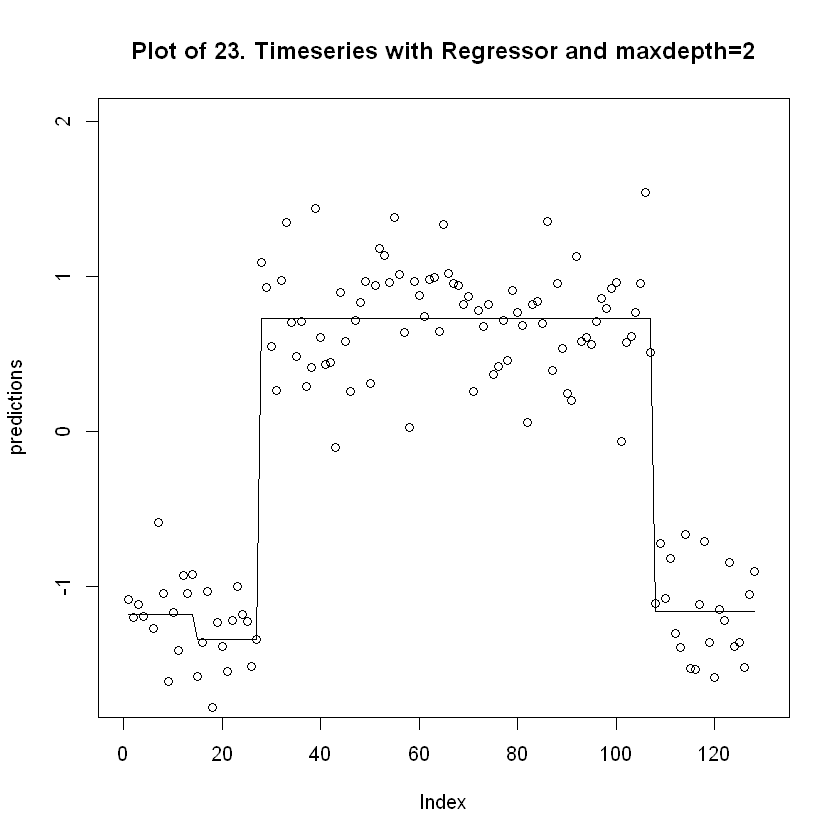

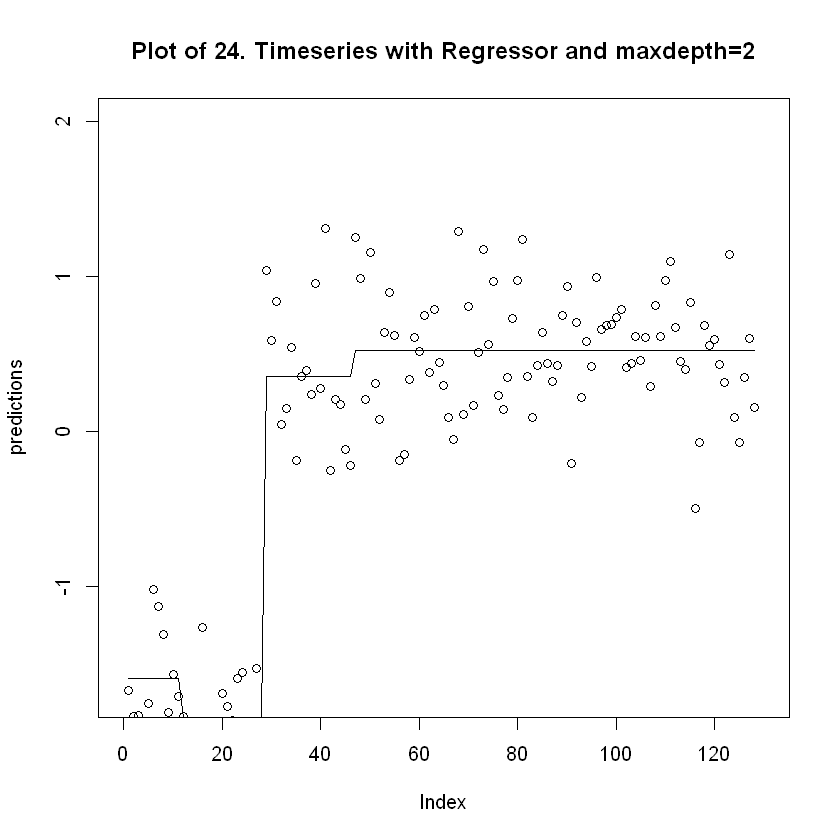

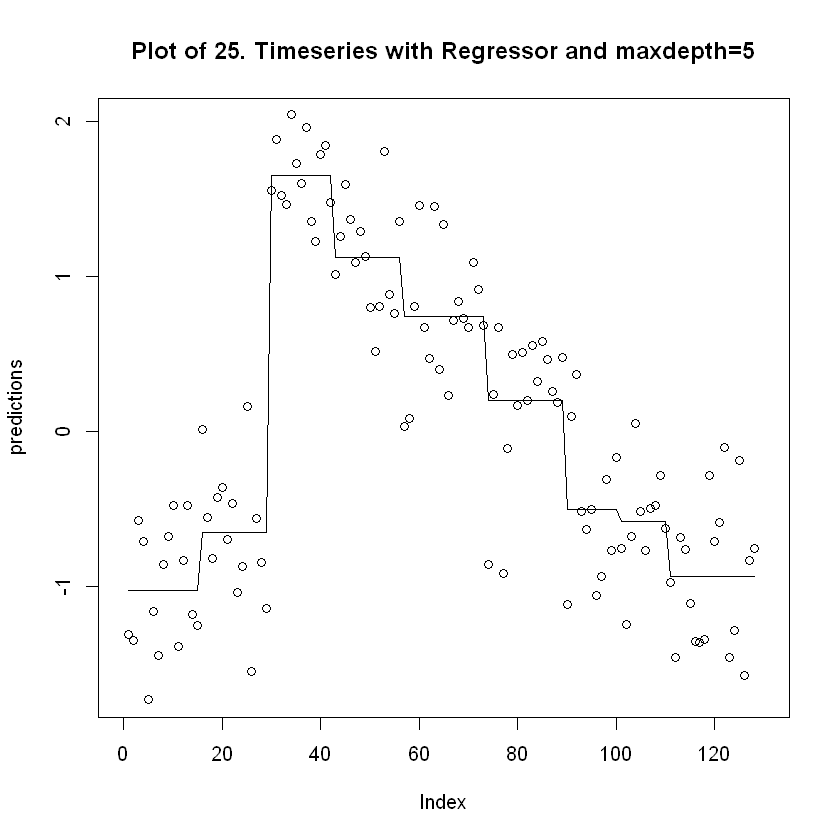

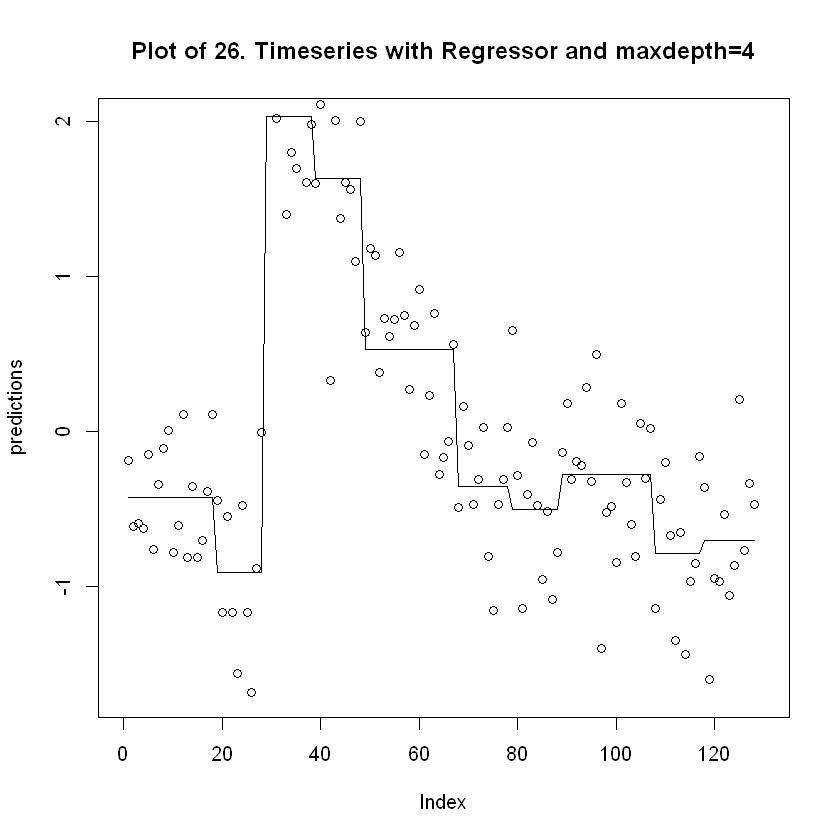

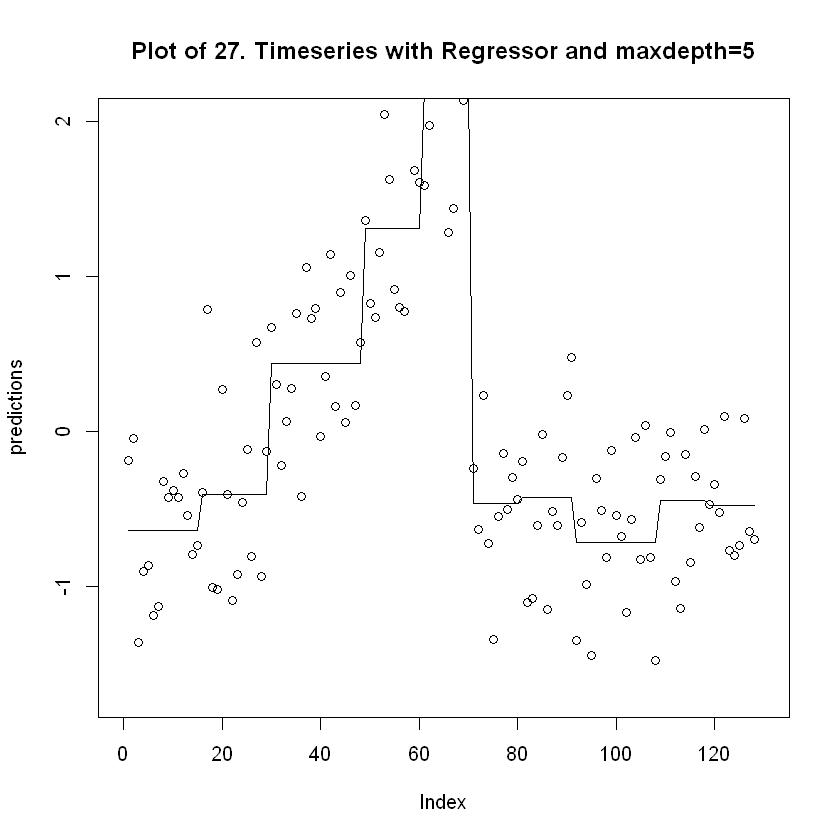

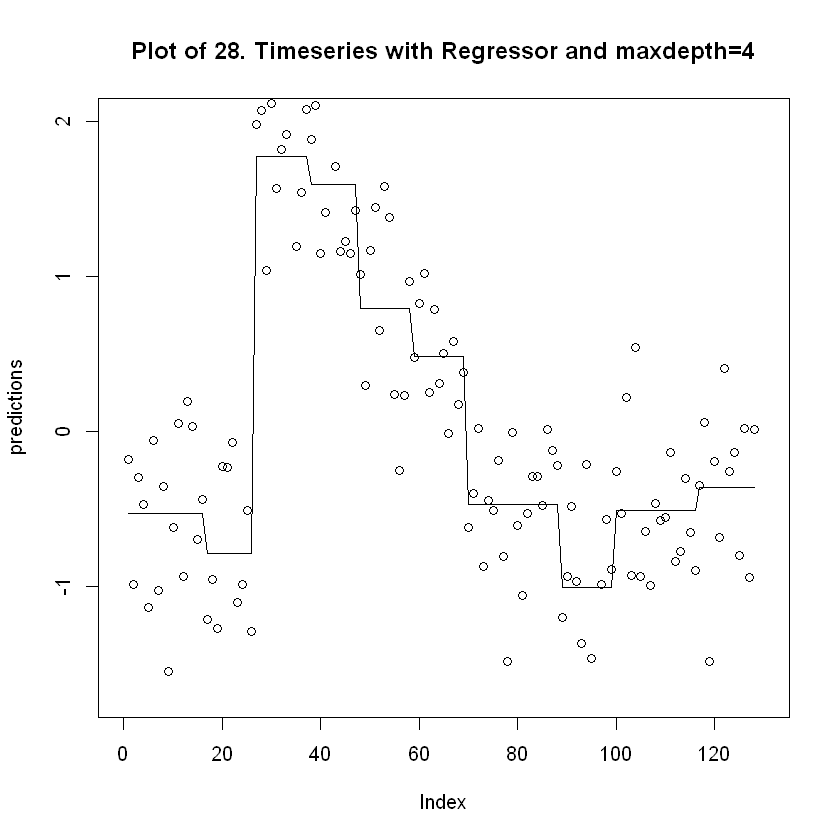

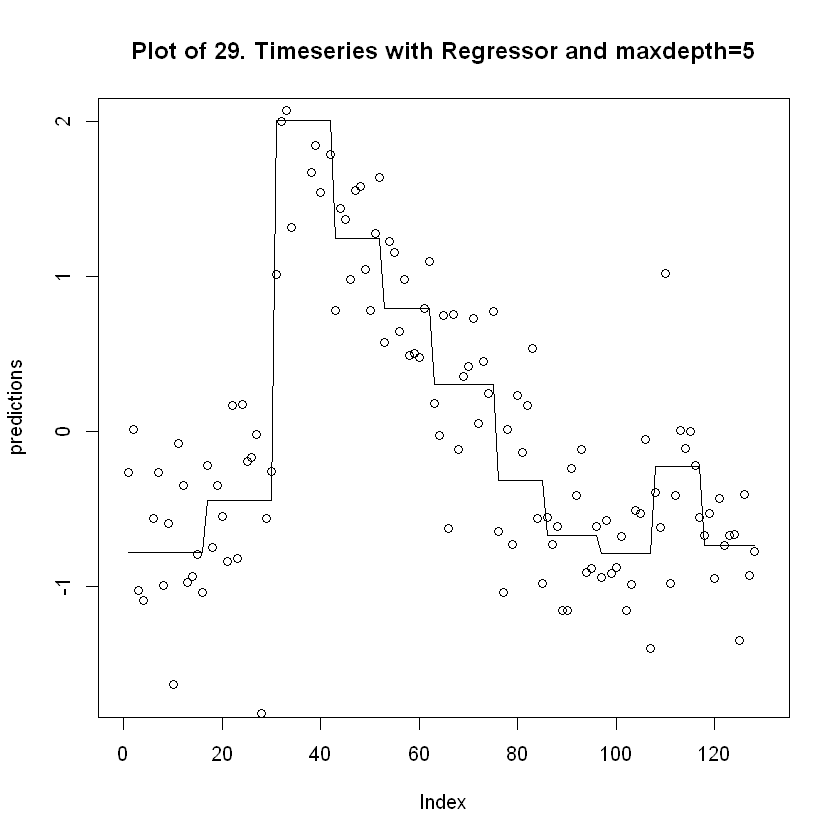

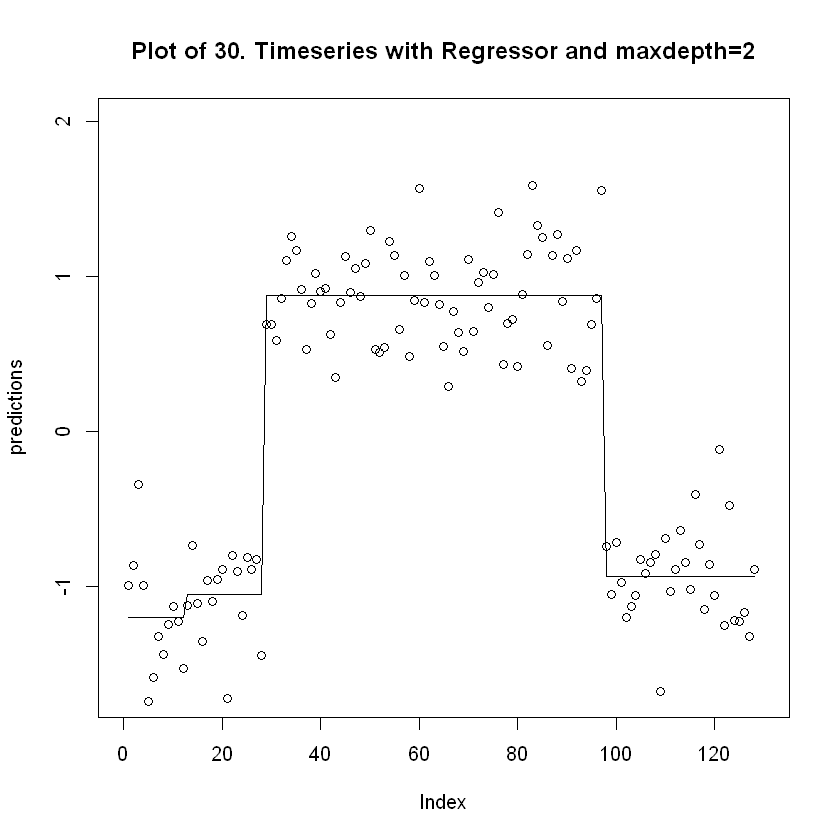

In [25]:
for(i in seq(1:30)){  
    regression_results[[i]]=regression_function(train, i)
}

In [26]:
for(i in seq(1:30)){
    print(paste0(i,". Timeseries"))
    print(regression_results[[i]][[1]])
    cat(paste0("By considering RMSE Value, the best Max Depth Parameter: ", which.min(regression_results[[i]]$RMSE),"for ",
          i, ".Timeseries \n\n"))
}

[1] "1. Timeseries"
        RMSE  Rsquared       MAE     RMSESD RsquaredSD      MAESD max_depth
1: 0.8703019 0.2746384 0.7176667 0.06504267 0.11221830 0.07363958         1
2: 0.4338889 0.8164682 0.2810118 0.08770847 0.06806608 0.03591607         2
3: 0.3956282 0.8473615 0.2758682 0.08511850 0.06429058 0.03501600         3
4: 0.4392403 0.8043110 0.2983563 0.10199362 0.08322519 0.04378798         4
5: 0.4309810 0.8240897 0.2928251 0.09201274 0.07296278 0.03829176         5
By considering RMSE Value, the best Max Depth Parameter: for 1.Timeseries 

[1] "2. Timeseries"
        RMSE  Rsquared       MAE     RMSESD RsquaredSD      MAESD max_depth
1: 0.7418000 0.4623813 0.5225708 0.12116199 0.13869486 0.07278513         1
2: 0.4899583 0.7633972 0.3378632 0.11038236 0.09640632 0.04781675         2
3: 0.4670255 0.7812393 0.3205642 0.09366516 0.08160653 0.03902544         3
4: 0.4510381 0.8095222 0.3284568 0.09047576 0.07383834 0.04643685         4
5: 0.4645980 0.7820589 0.3314931 0.12839702 0.11

# Task 3

In [86]:
head(train)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129
1,-0.4642765,-0.5550479,-0.84284310,-0.86589548,-0.9363963,-0.8172700,-0.2636122,-1.25804830,-1.2503934,...,-1.3310856,-1.0837000,-1.0179615,-0.9160287,-1.1342892,-0.9202237,-0.7893615,-0.6387058,-0.9636643,-1.24516910
1,-0.8969721,-0.6856855,-1.35138180,-1.45866680,-1.1653456,-1.4039293,-1.8217996,-0.83160109,-1.0163124,...,-1.0625534,-1.5686762,-1.3640403,-1.1551774,-0.9958611,-1.1637529,-0.9165233,-0.5820981,-1.2590094,-1.39252410
1,-0.4646960,-0.5677389,-0.03202276,-0.63504562,-0.6028255,-0.2668563,-0.2670613,-0.93104230,-0.4493819,...,-0.2867213,-0.6371576,-0.1552602,-0.6881293,-0.8856088,-0.7662393,-0.8653152,-0.2844857,-0.6878891,-0.88760835
3,-0.1871897,-0.6208077,-0.81566070,-0.52139796,-0.7904229,-0.9675174,-1.4870063,-0.27788714,-0.8350747,...,-0.9086154,-0.7262865,0.1837776,-0.7374441,-1.1139967,-0.3939866,-0.5878895,-0.6082319,-0.6364646,-0.34902865
2,-1.1360166,-1.3191953,-1.84462380,-0.78869178,-0.2517154,-1.4876032,-0.6687641,-0.34036037,-1.0463815,...,-1.1829110,-1.0735136,-1.6113624,-1.0643404,-0.9707364,-0.8272809,-0.9535377,-1.2701854,-1.7427579,-0.92594391
2,-0.5687087,-0.8881180,-0.04797658,-0.03803611,-0.4830683,-1.0946887,-0.9534529,-0.03000688,-0.7954546,...,-0.9907398,0.5183746,-0.2285628,-0.5652887,-0.6429980,-1.1094278,-0.1010932,-0.2339490,-0.6198269,-0.08306189


## Obtained Values from Fused Lasso

In [87]:
fused_list=vector("list", 30)

In [88]:
for(i in seq(1:30)){
    fused_list[[i]]=as.data.table(t(predict(fused_results[[i]][[1]], fused_results[[i]][[2]]$lambda.min)$fit))
}

In [89]:
fused_dt=rbindlist(fused_list)
fused_dt

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128
-0.7505869,-0.7505869,-0.7505869,-0.7505869,-0.7505869,-0.7505869,-0.7505869,-0.9745224,-0.9745224,-0.9745224,...,-0.9531423,-0.9531423,-0.9531423,-0.9531423,-0.9531423,-0.9531423,-0.9531423,-0.9531423,-0.9531423,-0.9531423
-1.0647598,-1.0647598,-1.0647598,-1.0647598,-1.0647598,-1.0647598,-1.0647598,-1.0647598,-1.0647598,-1.0647598,...,-1.1491790,-1.1491790,-1.1491790,-1.1491790,-1.1491790,-1.1491790,-1.1491790,-1.1491790,-1.1491790,-1.1491790
-0.5013410,-0.5013410,-0.5013410,-0.5013410,-0.5013410,-0.5013410,-0.5013410,-0.6247595,-0.6247595,-0.6247595,...,-0.6799623,-0.6799623,-0.6799623,-0.6799623,-0.6799623,-0.6799623,-0.6799623,-0.6799623,-0.6799623,-0.6799623
-0.6698067,-0.6698067,-0.6698067,-0.6698067,-0.6698067,-0.6698067,-0.6698067,-0.6698067,-0.6698067,-0.6698067,...,-0.4690187,-0.4690187,-0.4690187,-0.4690187,-0.4690187,-0.4690187,-0.4690187,-0.4690187,-0.4690187,-0.4690187
-1.0927387,-1.0927387,-1.0927387,-0.9361692,-0.9361692,-0.9361692,-0.9361692,-0.9361692,-0.9361692,-0.9361692,...,-1.1088608,-1.1088608,-1.1088608,-1.1088608,-1.1088608,-1.1088608,-1.1088608,-1.1088608,-1.1088608,-1.1088608
-0.5003466,-0.5003466,-0.5003466,-0.5003466,-0.5003466,-0.5003466,-0.5003466,-0.5003466,-0.5003466,-0.5003466,...,-0.4375492,-0.4375492,-0.4375492,-0.4375492,-0.4375492,-0.4375492,-0.4375492,-0.4375492,-0.4375492,-0.4375492
-1.1715456,-1.1715456,-1.1715456,-1.1715456,-1.1244566,-1.1244566,-1.1244566,-1.1244566,-1.1244566,-1.1244566,...,-0.9577410,-0.9577410,-0.9577410,-0.9577410,-0.9577410,-0.9577410,-0.9577410,-0.9577410,-0.9577410,-0.9577410
-0.6154343,-0.6154343,-0.6154343,-0.6154343,-0.6154343,-0.6154343,-0.6154343,-0.6154343,-0.6154343,-0.6154343,...,-0.6402687,-0.6402687,-0.6402687,-0.6402687,-0.6402687,-0.6402687,-0.6402687,-0.6631938,-0.6631938,-0.6631938
-0.8066349,-0.8066349,-0.8066349,-0.8066349,-0.8066349,-0.8066349,-0.8066349,-0.8066349,-0.8066349,-0.8066349,...,-0.7520592,-0.7520592,-0.7520592,-0.7520592,-0.7520592,-0.7520592,-0.7520592,-0.7520592,-0.7520592,-0.7520592
-1.0313383,-0.9384036,-0.9384036,-0.9384036,-1.2528852,-1.2528852,-1.2528852,-1.2528852,-1.1027905,-1.1027905,...,-1.0123148,-1.0206394,-1.0206394,-1.2798399,-1.2798399,-1.0336173,-1.0336173,-1.0336173,-1.1155947,-1.1155947


## Obtained Values from Regressors

In [90]:
regressor_list=vector("list", 30)

In [91]:
for(i in seq(1:30)){
    regressor_list[[i]]=as.data.table(t(regression_results[[i]][[2]]))
}

In [93]:
regressor_dt=rbindlist(regressor_list)
regressor_dt

1,2,3,4,5,6,7,8,9,10,...,119,120,121,122,123,124,125,126,127,128
-0.8172091,-0.8172091,-0.8172091,-0.8172091,-0.8172091,-0.8172091,-0.8172091,-0.8172091,-0.8172091,-0.8172091,...,-1.0040189,-1.0040189,-1.0040189,-1.0040189,-1.0040189,-1.0040189,-1.0040189,-1.0040189,-1.0040189,-1.0040189
-1.1613113,-1.1613113,-1.1613113,-1.1613113,-1.1613113,-1.1613113,-1.1613113,-1.1613113,-1.1613113,-1.1613113,...,-1.1993928,-1.1993928,-1.1993928,-1.1993928,-1.1993928,-1.1993928,-1.1993928,-1.1993928,-1.1993928,-1.1993928
-0.4850259,-0.4850259,-0.4850259,-0.4850259,-0.4850259,-0.4850259,-0.4850259,-0.4850259,-0.4850259,-0.4850259,...,-0.7185281,-0.7185281,-0.7185281,-0.7185281,-0.7185281,-0.7185281,-0.7185281,-0.7185281,-0.7185281,-0.7185281
-0.6452374,-0.6452374,-0.6452374,-0.6452374,-0.6452374,-0.6452374,-0.6452374,-0.6452374,-0.6452374,-0.6452374,...,-0.3977768,-0.3977768,-0.3977768,-0.3977768,-0.3977768,-0.3977768,-0.3977768,-0.3977768,-0.3977768,-0.3977768
-0.9195566,-0.9195566,-0.9195566,-0.9195566,-0.9195566,-0.9195566,-0.9195566,-0.9195566,-0.9195566,-0.9195566,...,-1.2017353,-1.2017353,-1.2017353,-1.2017353,-1.2017353,-1.2017353,-1.2017353,-1.2017353,-1.2017353,-1.2017353
-0.4091363,-0.4091363,-0.4091363,-0.4091363,-0.4091363,-0.4091363,-0.4091363,-0.4091363,-0.4091363,-0.4091363,...,-0.4056573,-0.4056573,-0.4056573,-0.4056573,-0.4056573,-0.4056573,-0.4056573,-0.4056573,-0.4056573,-0.4056573
-1.1580920,-1.1580920,-1.1580920,-1.1580920,-1.1580920,-1.1580920,-1.1580920,-1.1580920,-1.1580920,-1.1580920,...,-0.8944038,-0.8944038,-0.8944038,-0.8944038,-0.8944038,-0.8944038,-0.8944038,-0.8944038,-0.8944038,-0.8944038
-0.6903852,-0.6903852,-0.6903852,-0.6903852,-0.6903852,-0.6903852,-0.6903852,-0.6903852,-0.6903852,-0.6903852,...,-0.6580574,-0.6580574,-0.6580574,-0.6580574,-0.6580574,-0.6580574,-0.6580574,-0.6580574,-0.6580574,-0.6580574
-0.7833499,-0.7833499,-0.7833499,-0.7833499,-0.7833499,-0.7833499,-0.7833499,-0.7833499,-0.7833499,-0.7833499,...,-0.8532600,-0.8532600,-0.8532600,-0.8532600,-0.8532600,-0.8532600,-0.8532600,-0.8532600,-0.8532600,-0.8532600
-0.9804494,-0.9804494,-0.9804494,-0.9804494,-0.9804494,-0.9804494,-0.9804494,-0.9804494,-0.9804494,-0.9804494,...,-1.1408676,-1.1408676,-1.1408676,-1.1408676,-1.1408676,-1.1408676,-1.1408676,-1.1408676,-1.1408676,-1.1408676


## Performance Calculation

In [96]:
library(hydroGOF)

In [102]:
train_perf=train[,c(-1)]

### Datasets

In [107]:
performance_list=vector("list", 30)

In [130]:
mse_calculator=function(index, train, fused, regressor){
    fused_lasso_performance=sum(mse(train[1], fused[1]))
    regressor_performance=sum(mse(train[1], regressor[1]))
    perf_dt=data.frame(index, fused_lasso_performance, regressor_performance)
    return(perf_dt)
}

In [131]:
for(i in seq(1:30)){
    performance_list[[i]]=mse_calculator(i, train_perf[i], fused_dt[i], regressor_dt[i])   
}

In [132]:
performance_dt=rbindlist(performance_list)
performance_dt

index,fused_lasso_performance,regressor_performance
1,9.091071,11.183485
2,13.570281,12.453091
3,9.492097,10.848110
4,19.936882,21.074259
5,19.593402,20.004904
6,25.315251,27.605219
7,13.515668,13.840897
8,23.704445,27.018635
9,18.069711,18.710575
10,3.551884,13.236769


## Boxplot

In [133]:
box_plot_dt <- melt(performance_dt[,c(2,3)], id.vars=NULL)

Warning message in melt.data.table(performance_dt[, c(2, 3)], id.vars = NULL):
"id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns []. Consider providing at least one of 'id' or 'measure' vars in future."

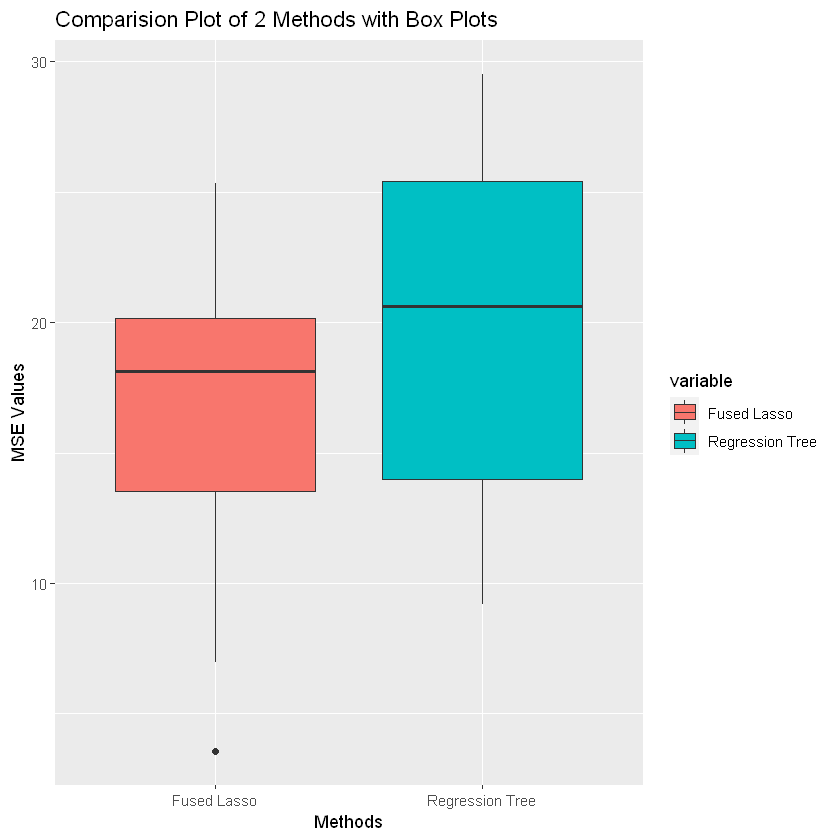

In [210]:
box_plot_dt %>%
  ggplot( aes(x=variable, y=value, fill=variable)) +
    geom_boxplot() +
    ggtitle("Comparision Plot of 2 Methods with Box Plots") +
    xlab("Methods")+ylab("MSE Values")+
    scale_fill_discrete(labels = c("Fused Lasso", "Regression Tree"))+
    scale_x_discrete(labels= c("fused_lasso_performance"="Fused Lasso","regressor_performance"="Regression Tree"))


# Task 4

In [173]:
timeseries_class=as.matrix(train[,1])

## Fused Lasso Accuracy

In [195]:
euc_dist_fused=as.matrix(dist(fused_dt))

neighborhood_fused=apply(euc_dist_fused,1,order)

predicted_fused=timeseries_class[neighborhood_fused[1,]]

table(timeseries_class,predicted_fused)

acc=sum(timeseries_class==predicted_fused)/length(predicted_fused)
print(acc)

                predicted_fused
timeseries_class  1  2  3
               1 10  0  0
               2  0 12  0
               3  0  0  8

[1] 1


## Regressor Accuracy

In [196]:
euc_dist_regressor=as.matrix(dist(regressor_dt))

neighborhood_regressor=apply(euc_dist_regressor,1,order)

predicted_regressor=timeseries_class[neighborhood_regressor[1,]]

table(timeseries_class,predicted_regressor)

acc=sum(timeseries_class==predicted_regressor)/length(predicted_regressor)
print(acc)

                predicted_regressor
timeseries_class  1  2  3
               1 10  0  0
               2  0 12  0
               3  0  0  8

[1] 1
